In [1]:
from pandas import to_numeric
from pandas import melt
from pandas import read_csv
from pandas import DataFrame
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import string as st
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

In [2]:
df = read_csv("pd_speech_features.csv")

In [3]:
df.head()

Unnamed: 0 Unnamed: 1 Baseline Features Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0         id     gender               PPE        DFA       RPDE  numPulses   
1          0          1           0.85247    0.71826    0.57227        240   
2          0          1           0.76686    0.69481    0.53966        234   
3          0          1           0.85083    0.67604    0.58982        232   
4          1          0           0.41121    0.79672    0.59257        178   

         Unnamed: 6        Unnamed: 7          Unnamed: 8    Unnamed: 9  ...  \
0  numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...   
1               239        0.00806353            8.68E-05       0.00218  ...   
2               233       0.008258256            7.31E-05       0.00195  ...   
3               231        0.00833959            6.04E-05       0.00176  ...   
4               177       0.010857733         0.000182739       0.00419  ...   

                Unnamed: 745               Unnamed: 746  \
0  tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29   
1                      1.562                     2.6445   
2                     1.5589                     3.6107   
3                     1.5643                     2.3308   
4                     3.7805                     3.5664   

                Unnamed: 747               Unnamed: 748  \
0  tqwt_kurtosisValue_dec_30  tqwt_kurtosisValue_dec_31   
1                     3.8686                     4.2105   
2                    23.5155                    14.1962   
3                     9.4959                    10.7458   
4                     5.2558                    14.0403   

                Unnamed: 749               Unnamed: 750  \
0  tqwt_kurtosisValue_dec_32  tqwt_kurtosisValue_dec_33   
1                     5.1221                     4.4625   
2                    11.0261                     9.5082   
3                    11.0177                     4.8066   
4                     4.2235                     4.6857   

                Unnamed: 751               Unnamed: 752  \
0  tqwt_kurtosisValue_dec_34  tqwt_kurtosisValue_dec_35   
1                     2.6202                     3.0004   
2                     6.5245                     6.3431   
3                     2.9199                     3.1495   
4                      4.846                      6.265   

                Unnamed: 753 Unnamed: 754  
0  tqwt_kurtosisValue_dec_36        class  
1                    18.9405            1  
2                     45.178            1  
3                     4.7666            1  
4                     4.0603            1  

[5 rows x 755 columns]

In [4]:
df.columns = df.iloc[0]
df = df[1:]

In [5]:
df.head()

0 id gender      PPE      DFA     RPDE numPulses numPeriodsPulses  \
1  0      1  0.85247  0.71826  0.57227       240              239   
2  0      1  0.76686  0.69481  0.53966       234              233   
3  0      1  0.85083  0.67604  0.58982       232              231   
4  1      0  0.41121  0.79672  0.59257       178              177   
5  1      0   0.3279  0.79782  0.53028       236              235   

0 meanPeriodPulses stdDevPeriodPulses locPctJitter  ...  \
1       0.00806353           8.68E-05      0.00218  ...   
2      0.008258256           7.31E-05      0.00195  ...   
3       0.00833959           6.04E-05      0.00176  ...   
4      0.010857733        0.000182739      0.00419  ...   
5      0.008161574        0.002668863      0.00535  ...   

0 tqwt_kurtosisValue_dec_28 tqwt_kurtosisValue_dec_29  \
1                     1.562                    2.6445   
2                    1.5589                    3.6107   
3                    1.5643                    2.3308   
4                    3.7805                    3.5664   
5                    6.1727                    5.8416   

0 tqwt_kurtosisValue_dec_30 tqwt_kurtosisValue_dec_31  \
1                    3.8686                    4.2105   
2                   23.5155                   14.1962   
3                    9.4959                   10.7458   
4                    5.2558                   14.0403   
5                    6.0805                    5.7621   

0 tqwt_kurtosisValue_dec_32 tqwt_kurtosisValue_dec_33  \
1                    5.1221                    4.4625   
2                   11.0261                    9.5082   
3                   11.0177                    4.8066   
4                    4.2235                    4.6857   
5                    7.7817                   11.6891   

0 tqwt_kurtosisValue_dec_34 tqwt_kurtosisValue_dec_35  \
1                    2.6202                    3.0004   
2                    6.5245                    6.3431   
3                    2.9199                    3.1495   
4                     4.846                     6.265   
5                    8.2103                    5.0559   

0 tqwt_kurtosisValue_dec_36 class  
1                   18.9405     1  
2                    45.178     1  
3                    4.7666     1  
4                    4.0603     1  
5                    6.1164     1  

[5 rows x 755 columns]

In [6]:
columns = list(df.columns)
df[columns] = df[columns].apply(to_numeric)
print(df.dtypes)

0
id                             int64
gender                         int64
PPE                          float64
DFA                          float64
RPDE                         float64
                              ...   
tqwt_kurtosisValue_dec_33    float64
tqwt_kurtosisValue_dec_34    float64
tqwt_kurtosisValue_dec_35    float64
tqwt_kurtosisValue_dec_36    float64
class                          int64
Length: 755, dtype: object


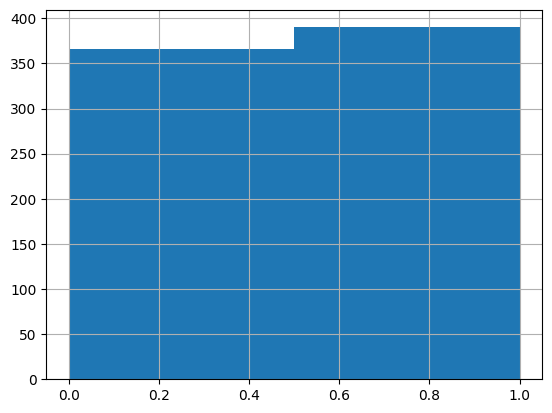

In [7]:
hist_plot = df['gender'].hist(bins=2)

In [ ]:
df['gender'].nunique()

2

##### There are 754 attributes/features and 756 objects in the dataset. The last feature "Class" is the target variable. Gender feature has binary data( '1' = Male, '0' = Female ). Rest of the features have numerical value (type = int or float)

# Finding mean median mode std,etc of FEATURES

In [8]:
l= [['column_name','mean','std','median','range','first_quantile','third_quantile']]
for att in columns:
    arr = np.array(df[att].astype(float))
    mean = np.mean(arr)
    std = np.std(arr)
    median = np.median(arr)
    ra = max(arr) - min(arr)
    Q1 = np.quantile(arr,.25)
    Q3 = np.quantile(arr,.75)
    l.append([att,mean,std,median,ra,Q1,Q3])
    
df_ct = DataFrame(l)
df_ct.columns = df_ct.iloc[0]
df_ct = df_ct[1:]

In [9]:
df_ct

0                  column_name       mean        std    median     range  \
1                           id      125.5  72.745561     125.5     251.0   
2                       gender   0.515873   0.499748       1.0       1.0   
3                          PPE   0.746284   0.169182  0.809655  0.866109   
4                          DFA   0.700414   0.069672  0.700525   0.30914   
5                         RPDE   0.489058   0.137352  0.484355   0.71693   
..                         ...        ...        ...       ...       ...   
751  tqwt_kurtosisValue_dec_33  12.375335  16.330854   4.74145   71.9035   
752  tqwt_kurtosisValue_dec_34   14.79923    15.7121    6.7257   60.1456   
753  tqwt_kurtosisValue_dec_35  14.751559   14.42343   7.33425   55.5884   
754  tqwt_kurtosisValue_dec_36   31.48111  34.208344  10.63725  154.0597   
755                      class   0.746032    0.43528       1.0       1.0   

0   first_quantile third_quantile  
1            62.75         188.25  
2              0.0            1.0  
3         0.762833       0.834315  
4         0.647053       0.754985  
5         0.386537       0.586515  
..             ...            ...  
751       3.114375      12.201325  
752       3.665925       21.92205  
753       3.741275      22.495175  
754        3.94875      61.125325  
755            0.0            1.0  

[755 rows x 7 columns]

# The distribution of the FEATURES

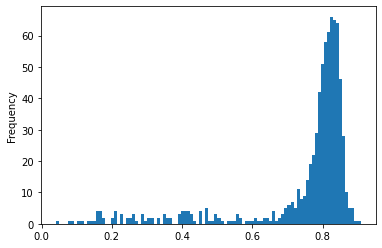

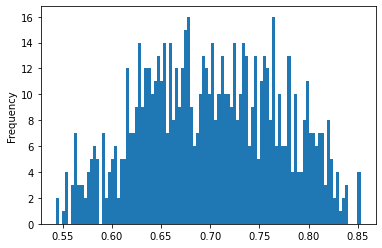

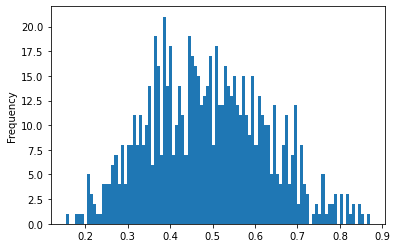

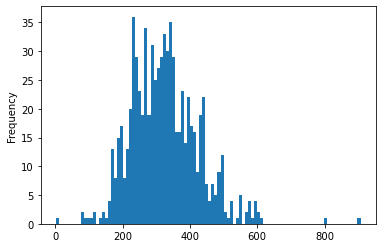

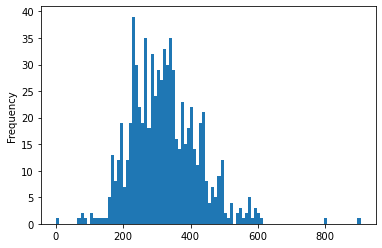

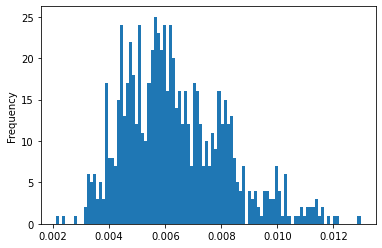

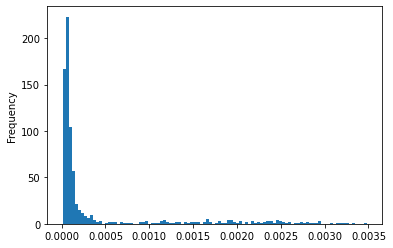

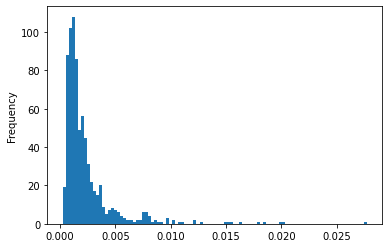

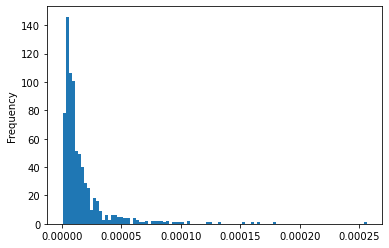

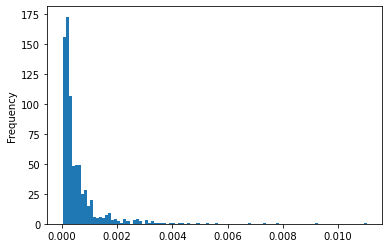

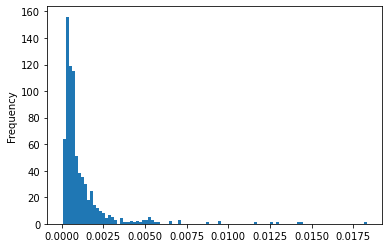

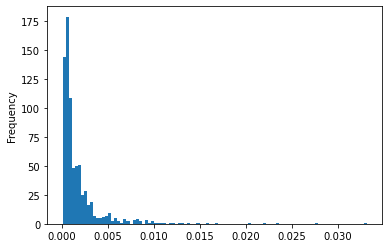

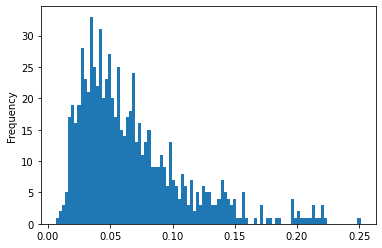

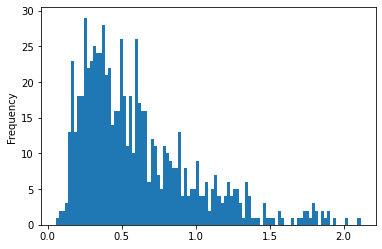

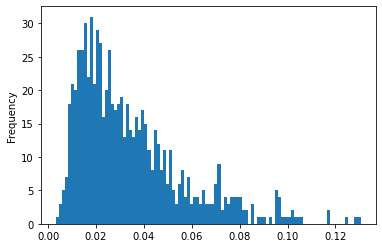

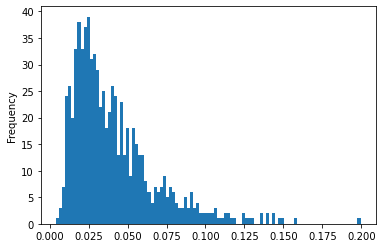

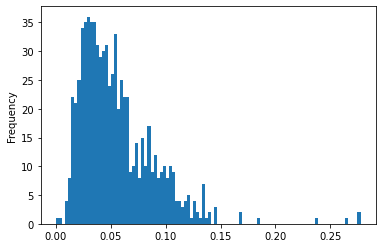

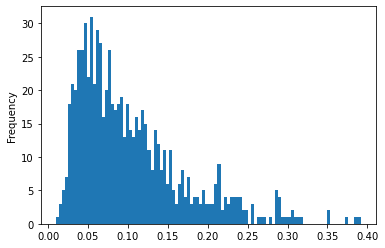

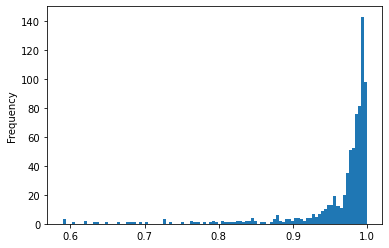

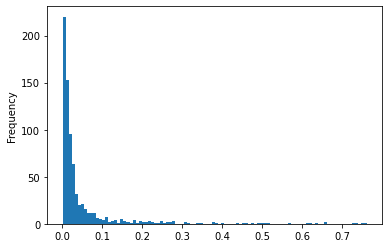

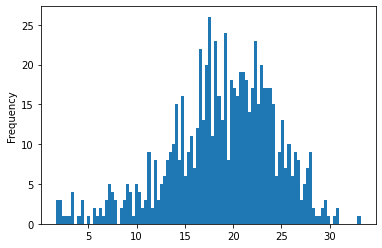

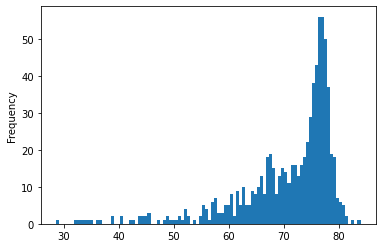

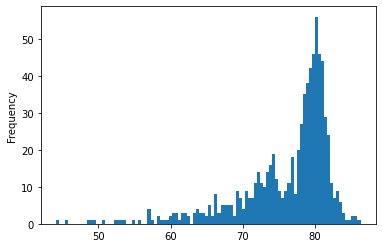

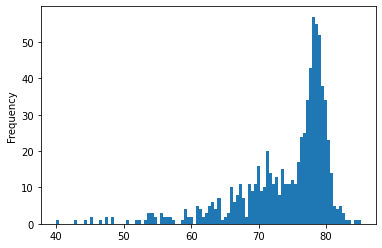

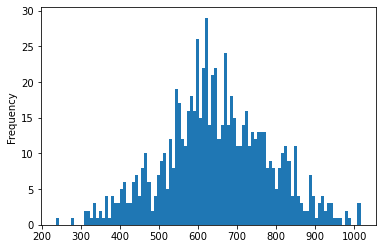

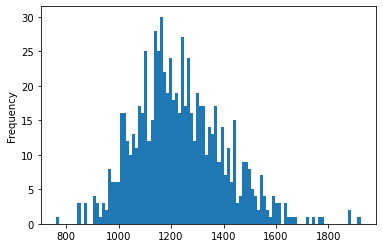

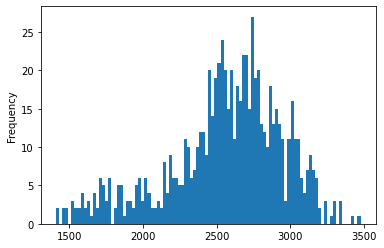

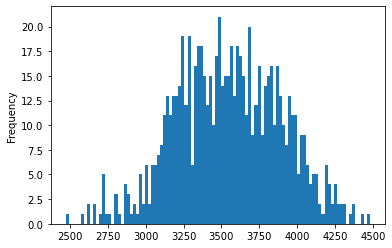

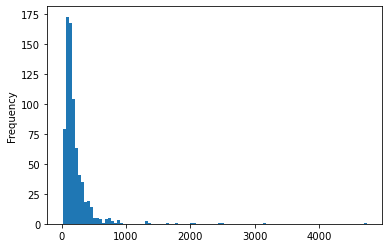

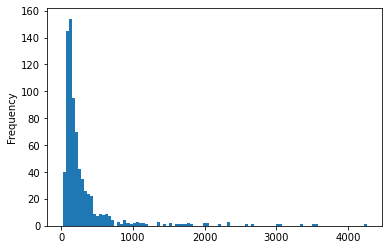

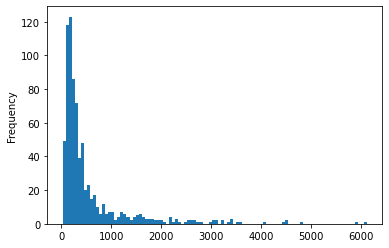

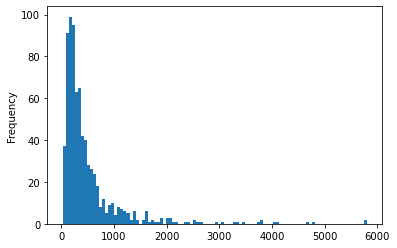

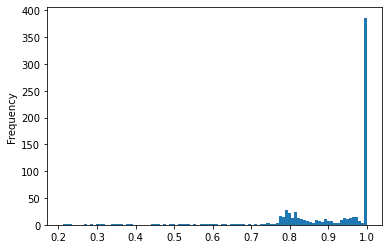

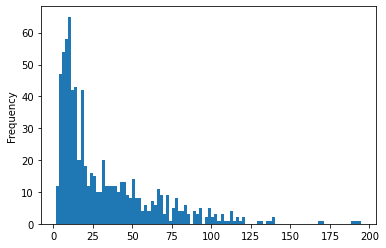

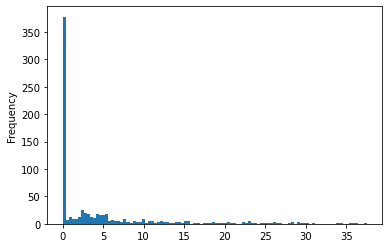

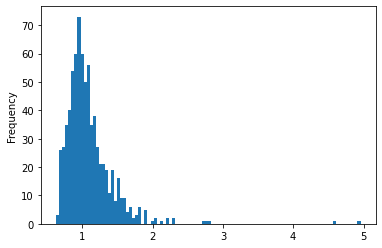

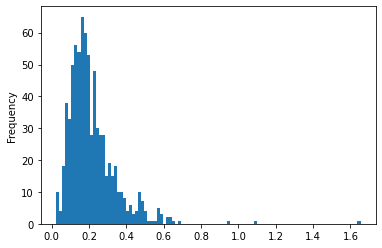

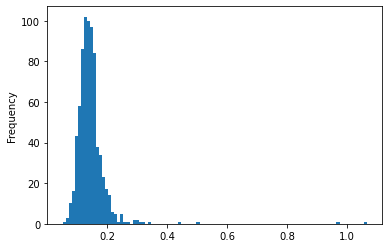

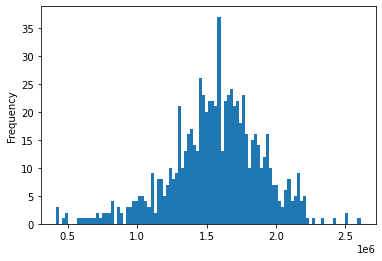

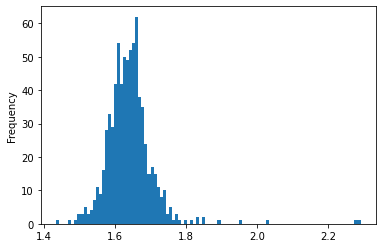

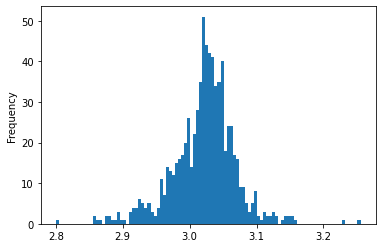

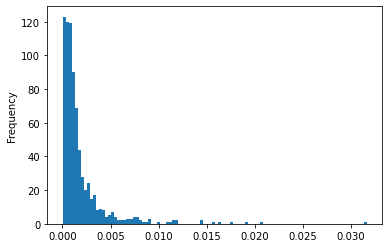

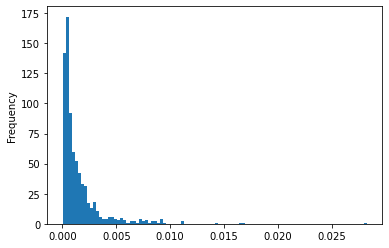

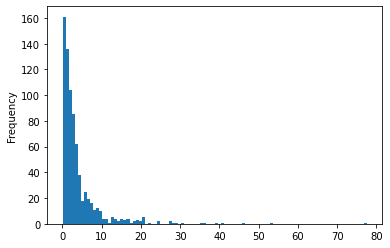

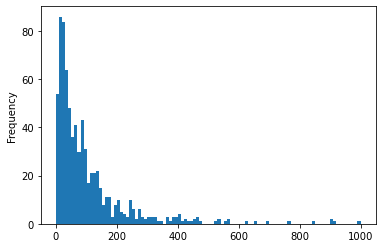

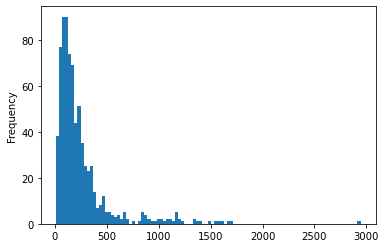

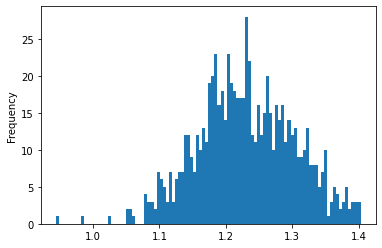

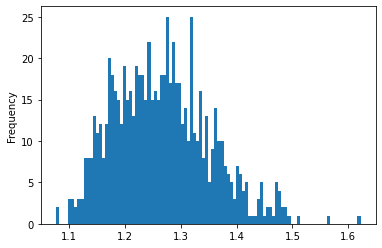

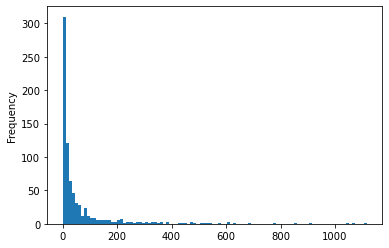

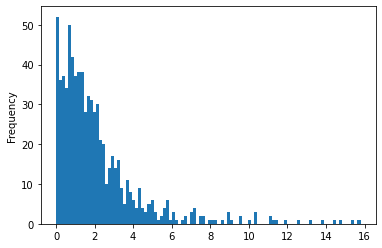

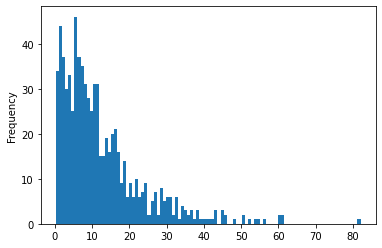

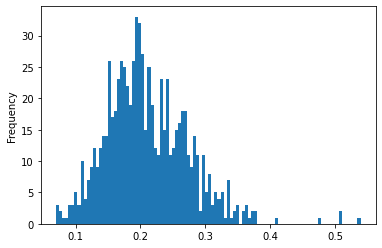

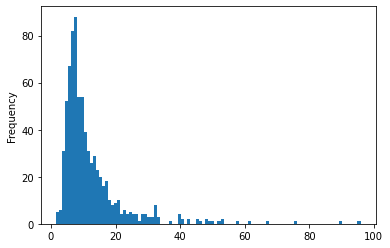

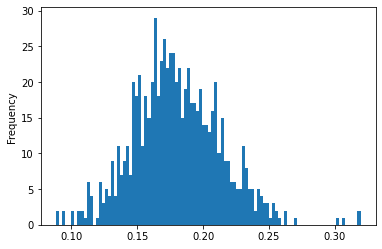

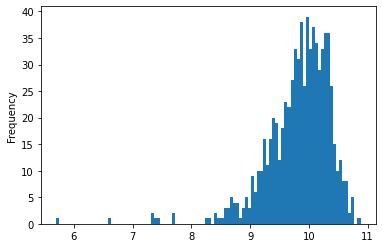

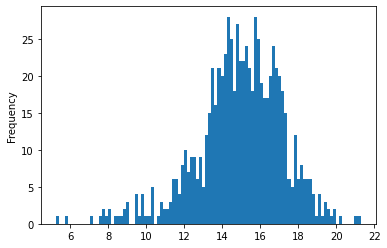

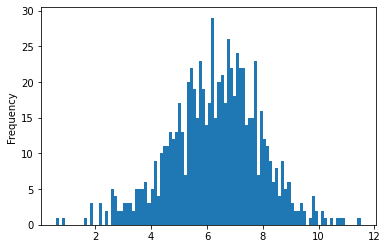

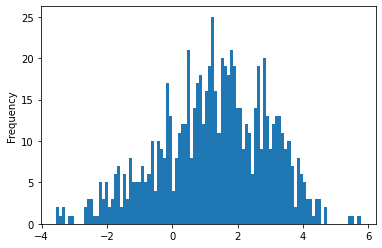

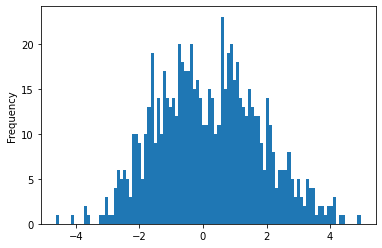

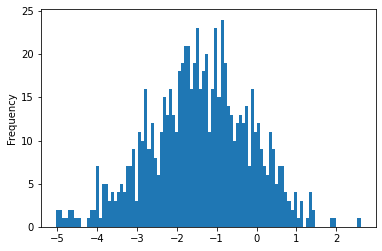

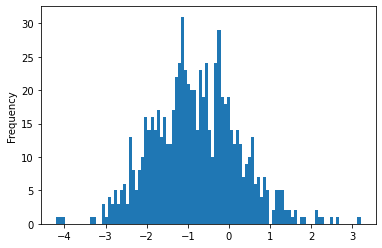

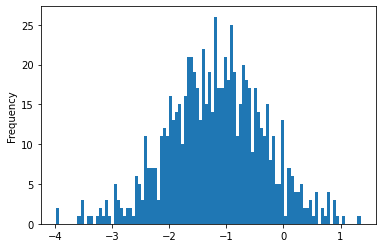

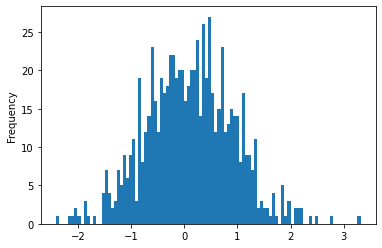

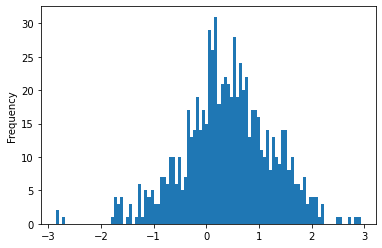

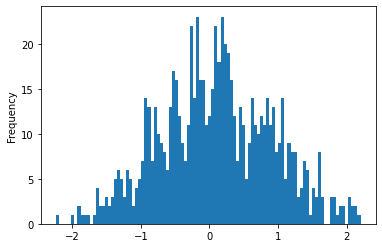

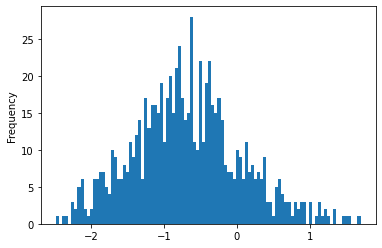

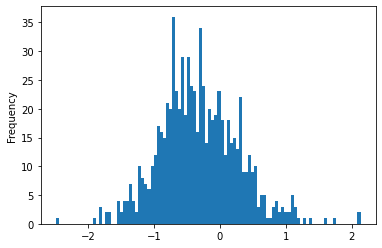

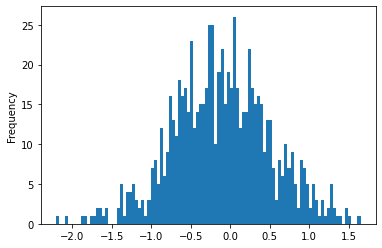

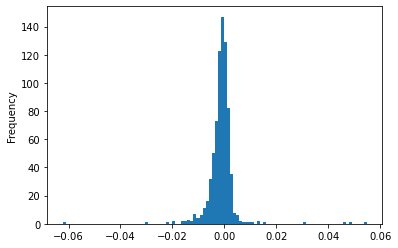

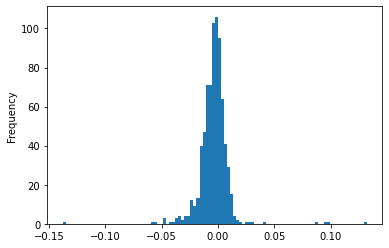

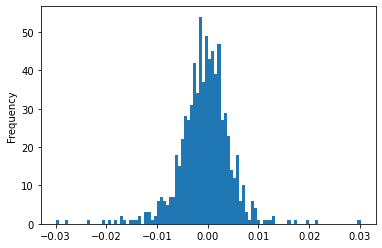

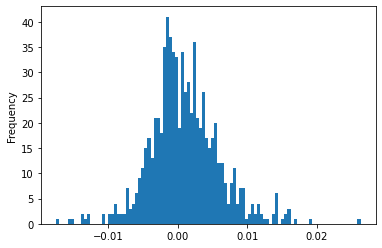

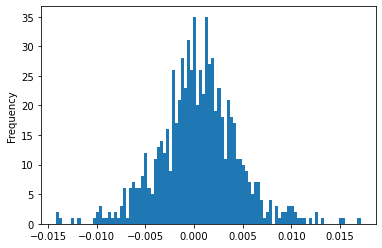

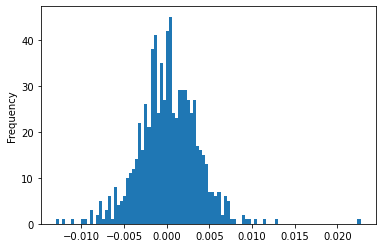

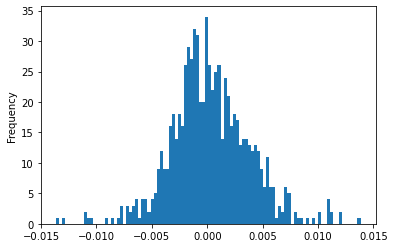

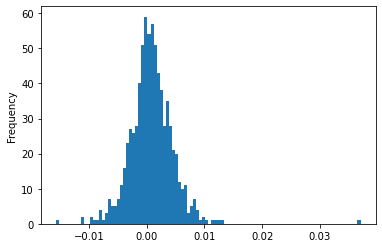

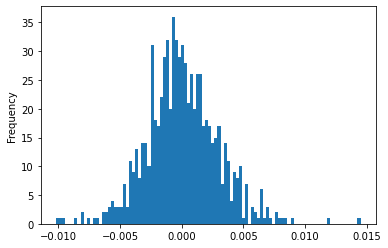

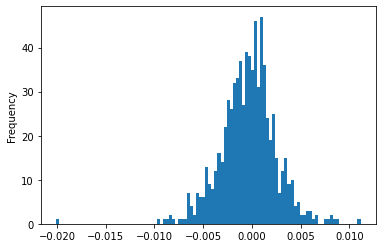

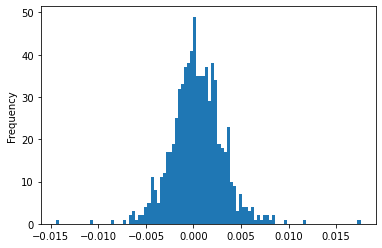

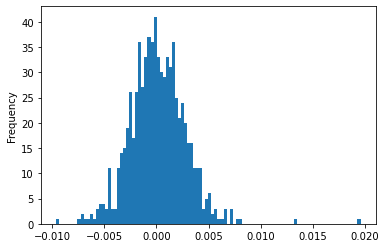

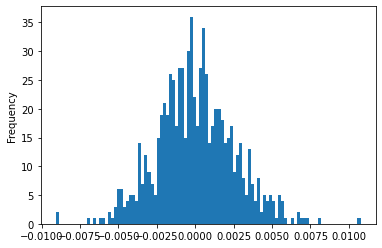

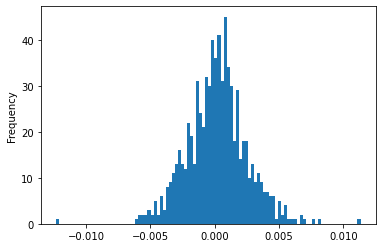

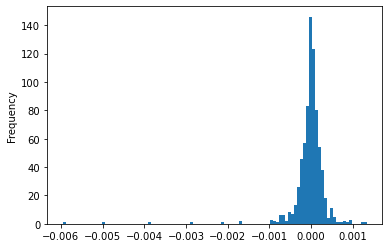

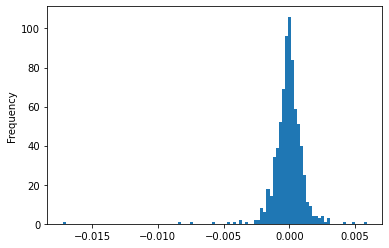

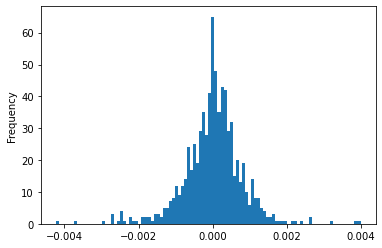

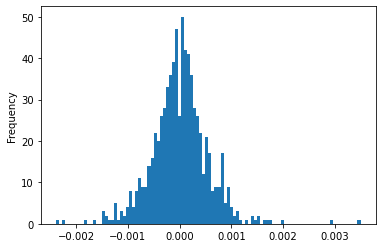

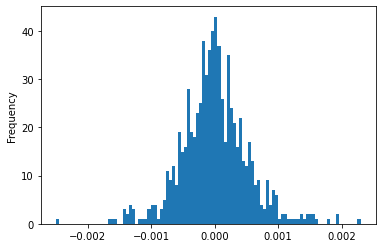

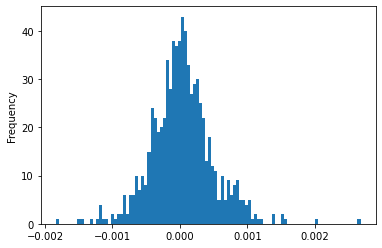

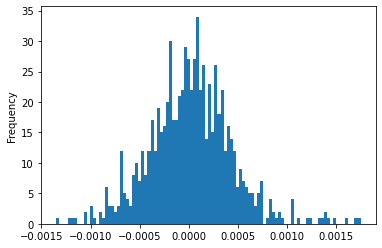

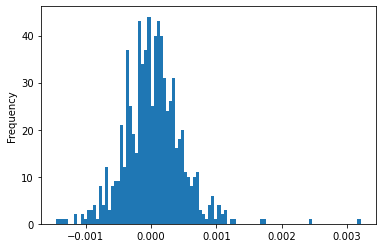

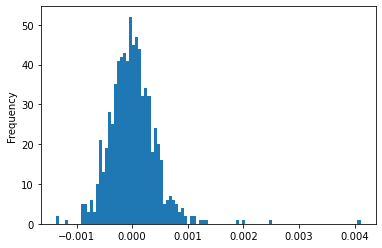

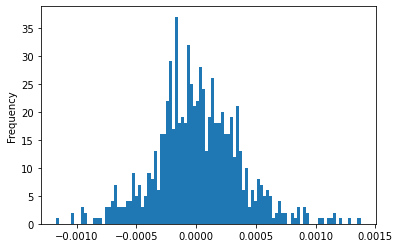

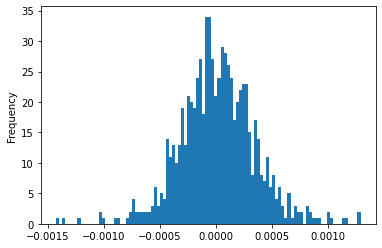

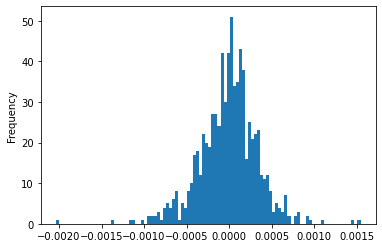

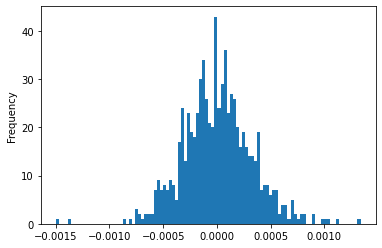

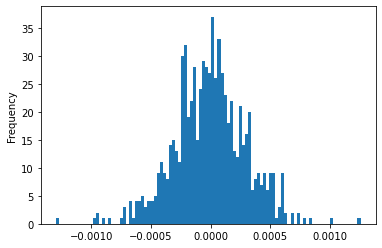

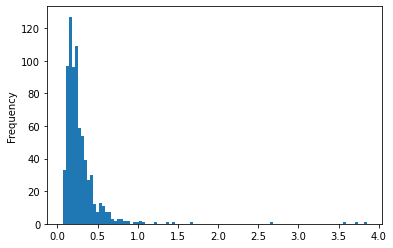

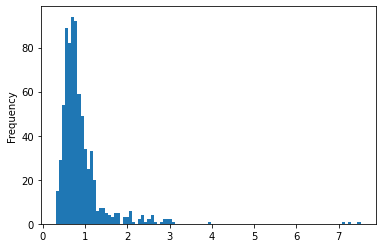

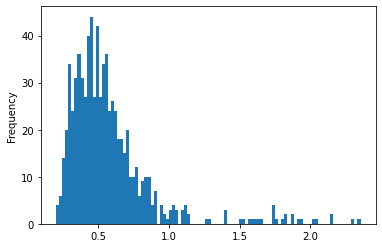

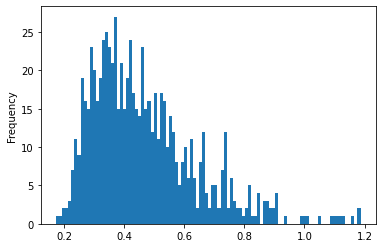

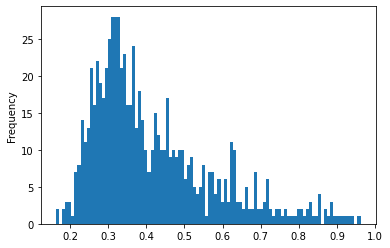

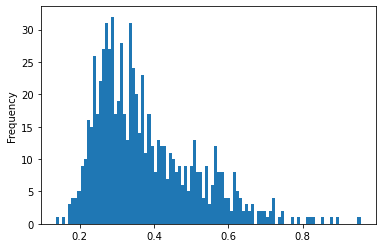

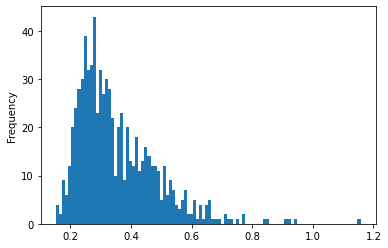

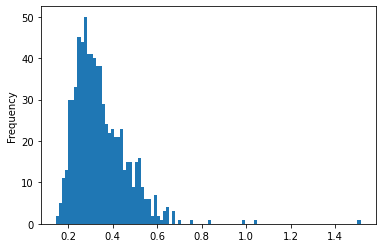

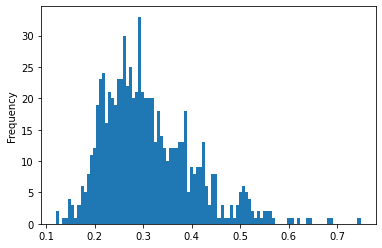

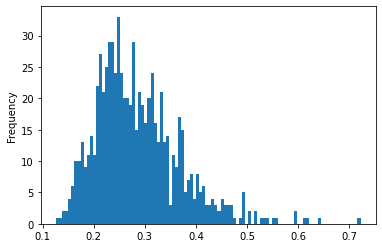

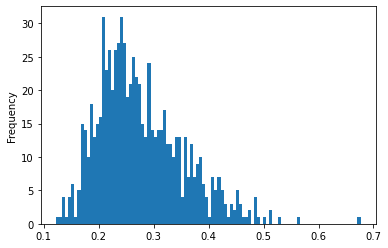

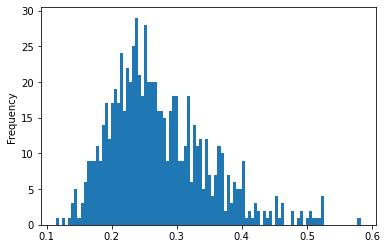

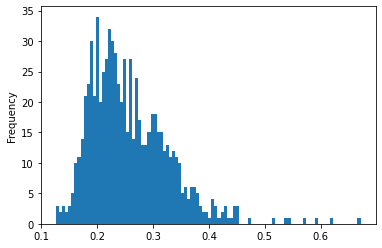

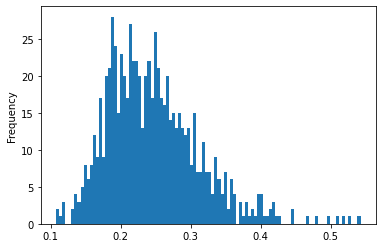

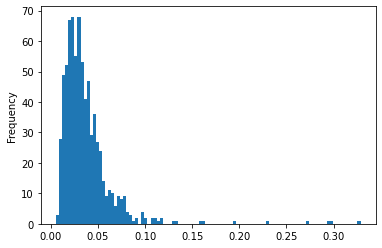

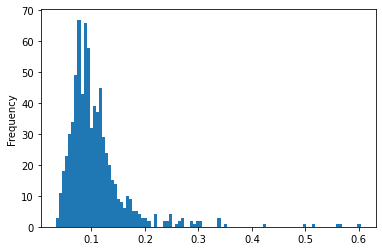

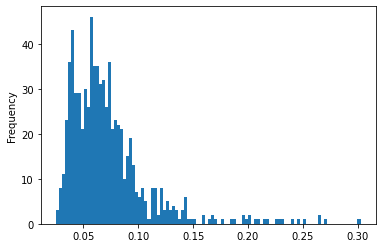

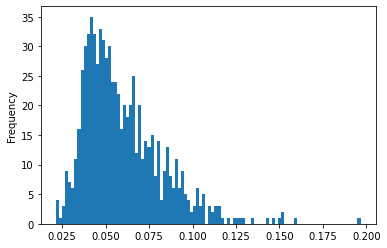

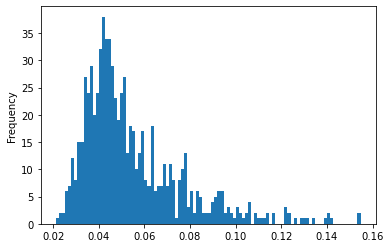

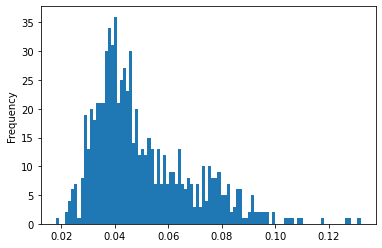

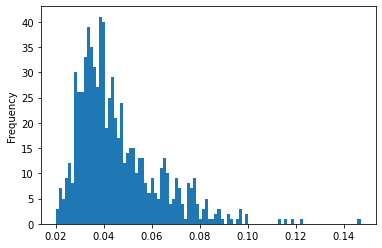

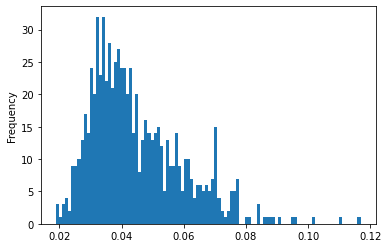

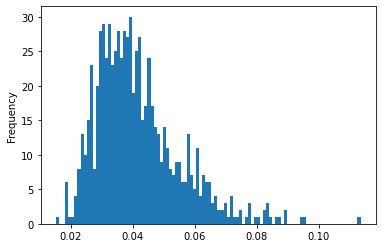

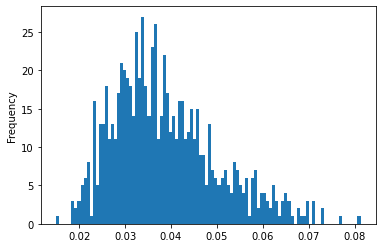

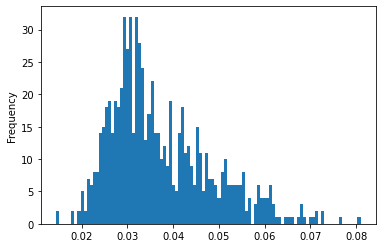

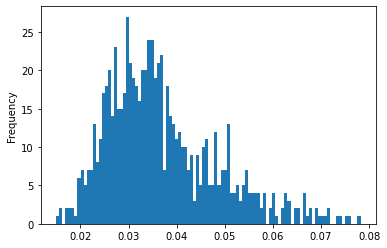

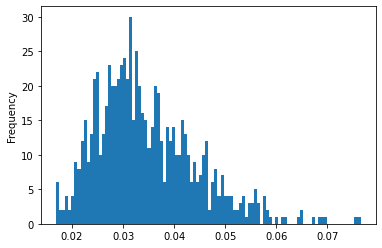

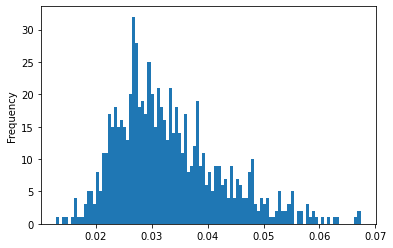

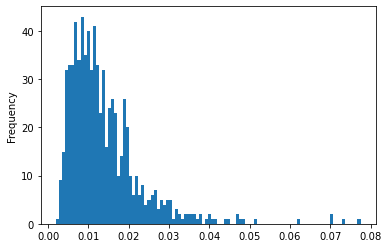

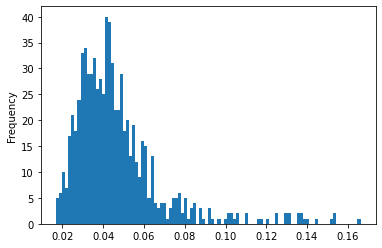

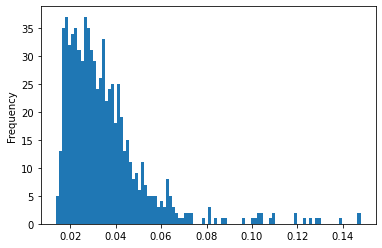

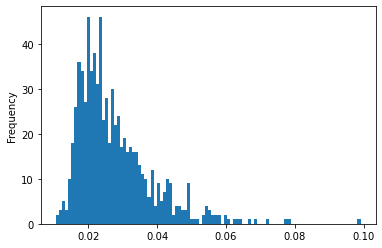

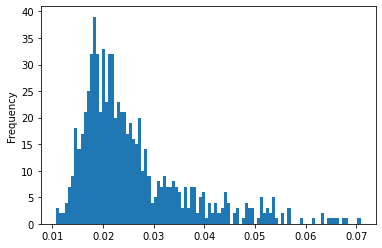

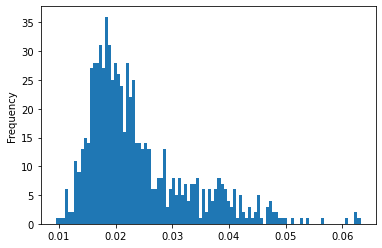

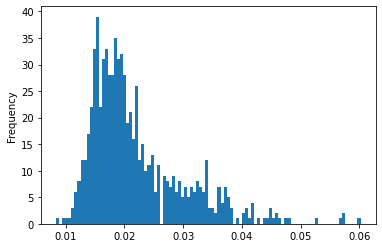

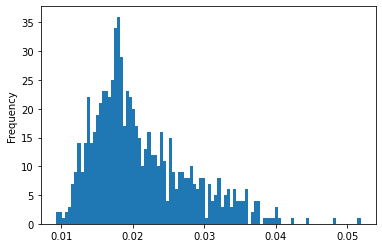

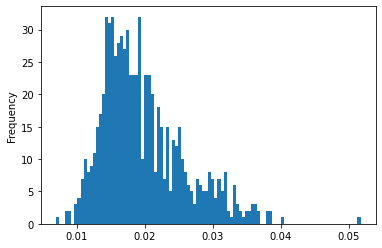

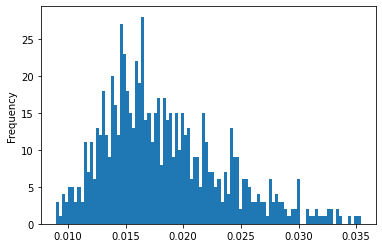

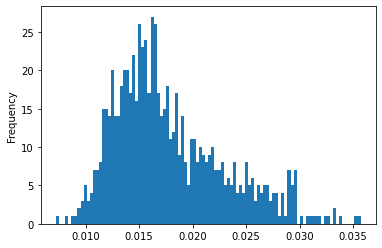

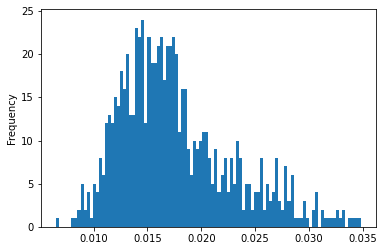

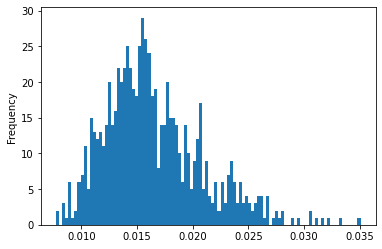

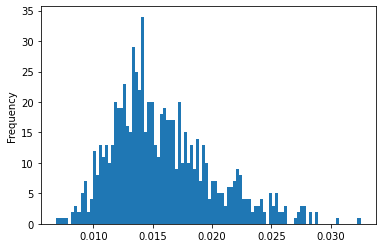

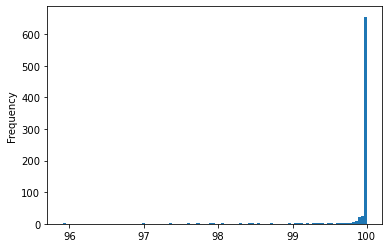

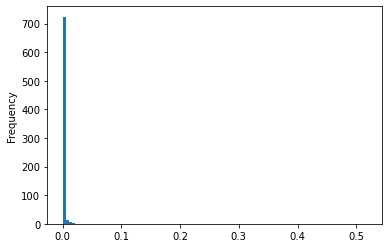

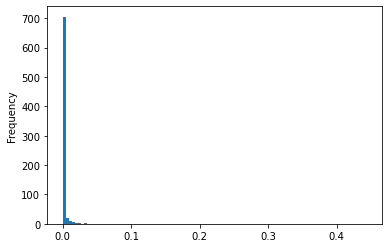

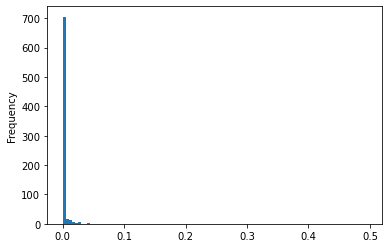

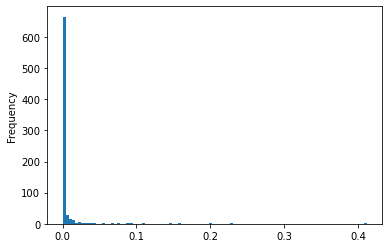

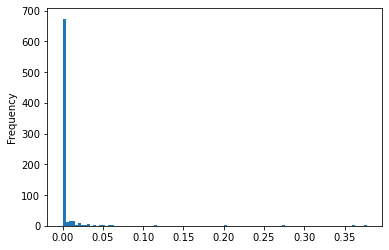

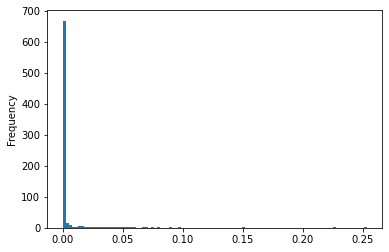

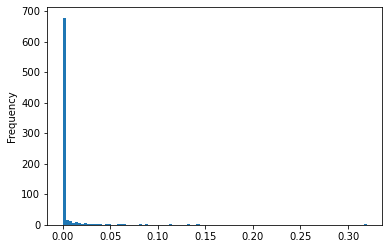

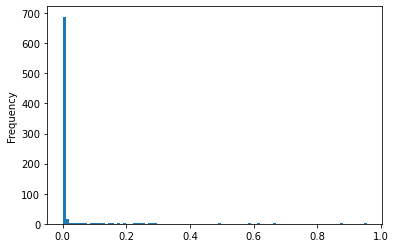

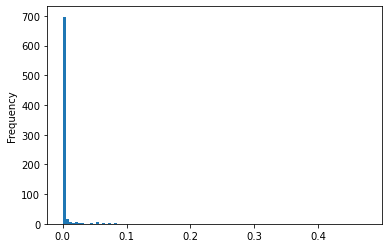

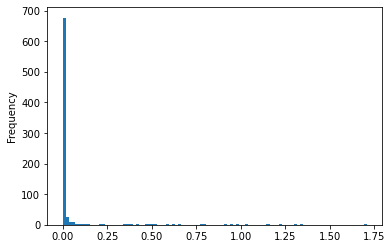

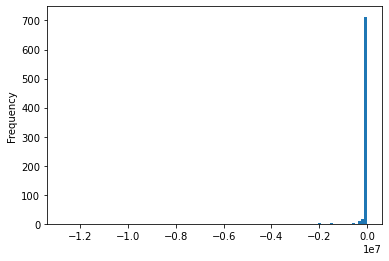

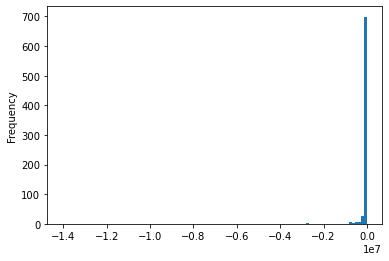

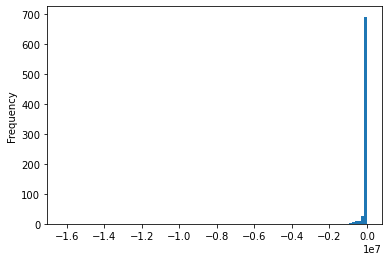

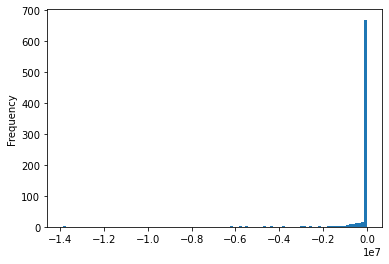

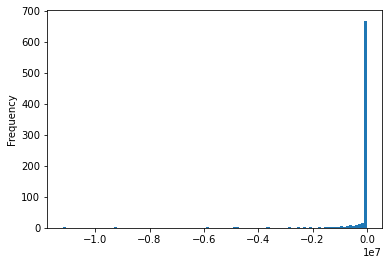

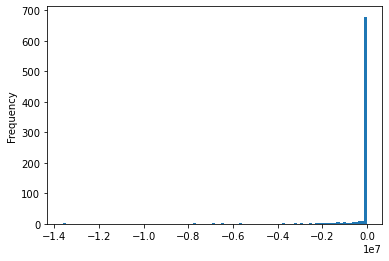

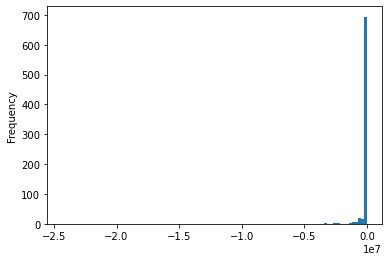

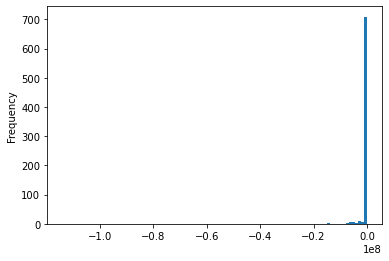

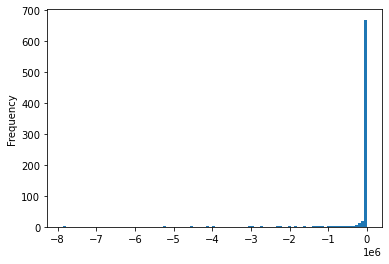

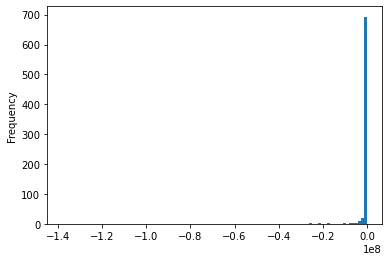

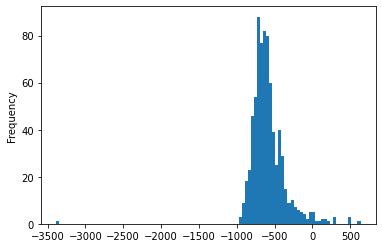

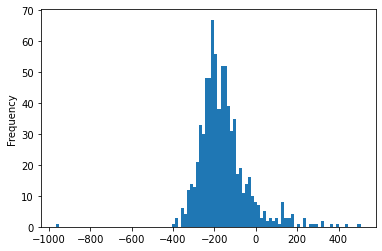

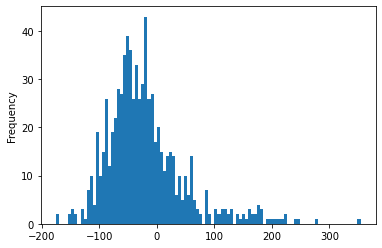

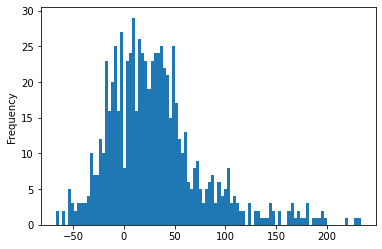

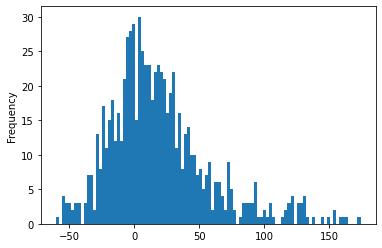

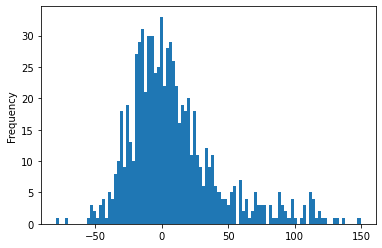

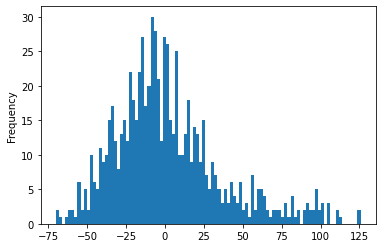

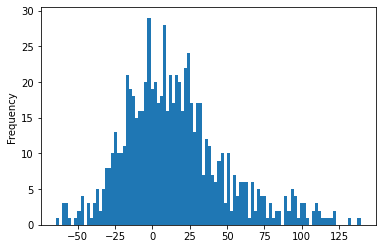

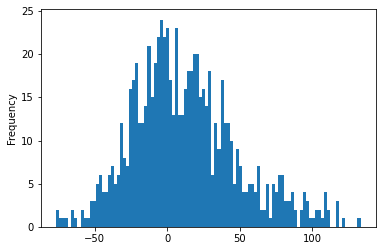

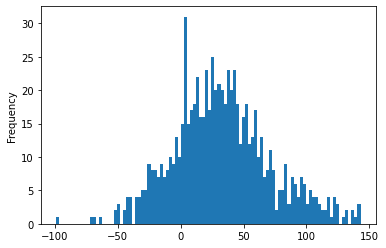

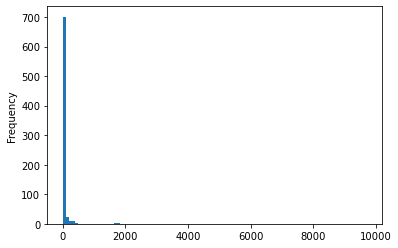

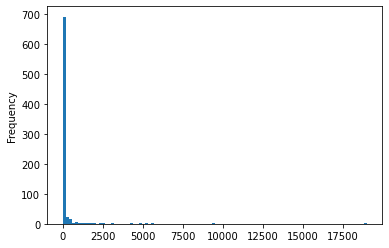

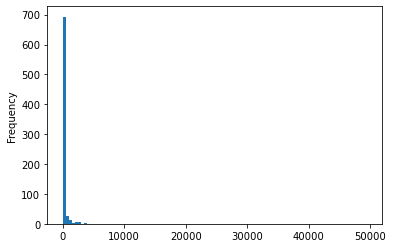

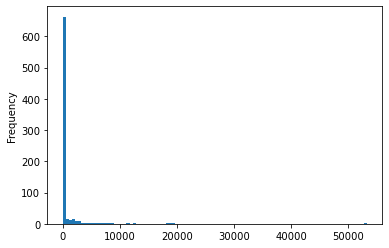

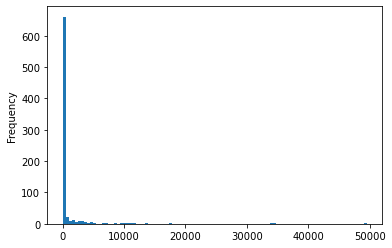

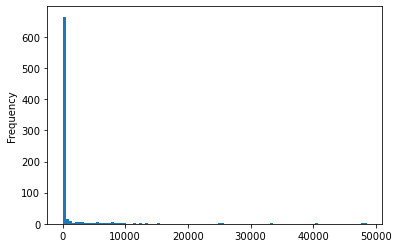

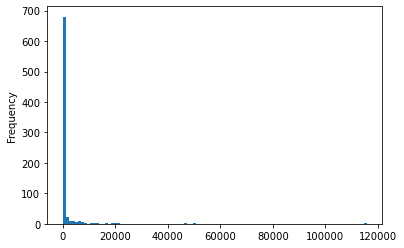

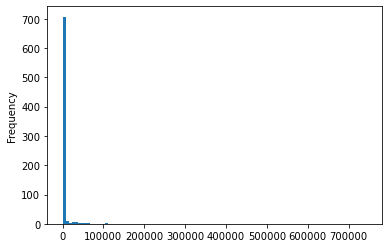

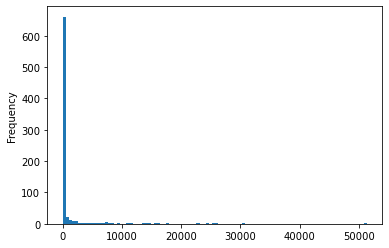

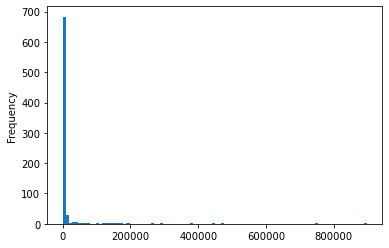

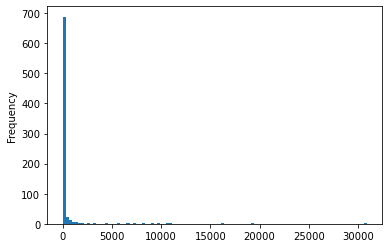

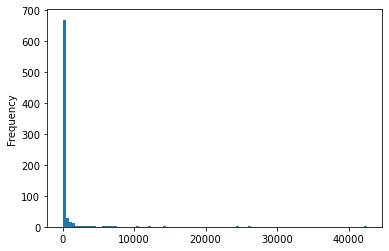

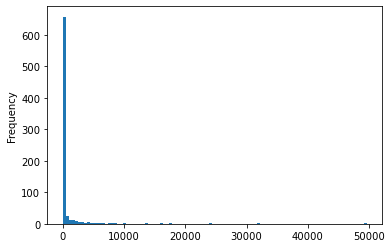

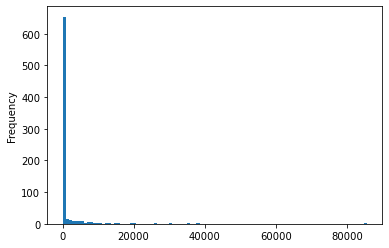

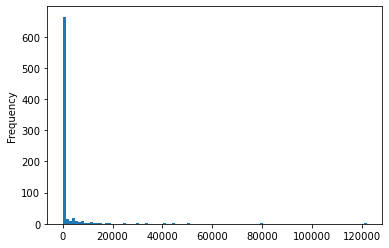

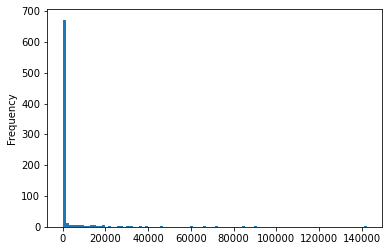

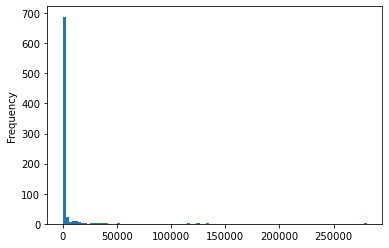

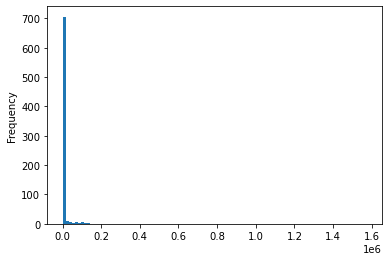

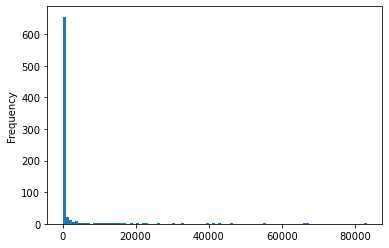

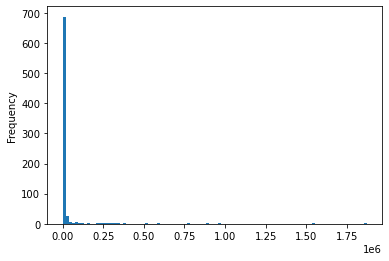

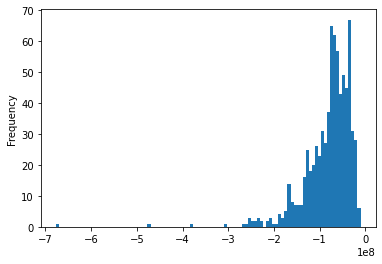

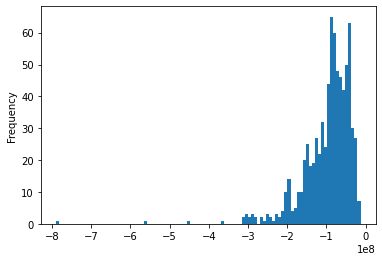

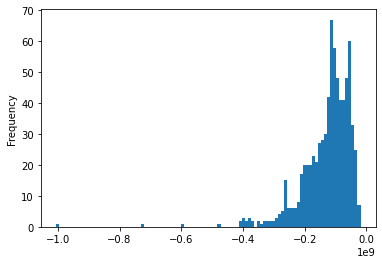

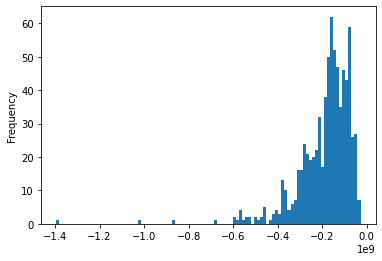

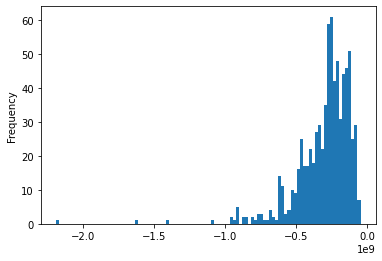

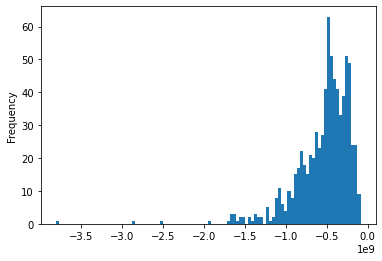

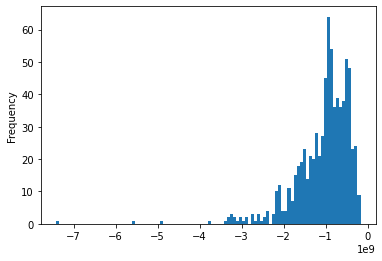

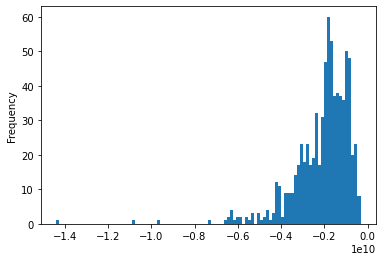

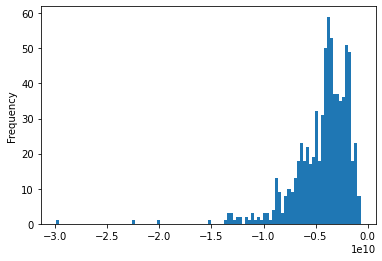

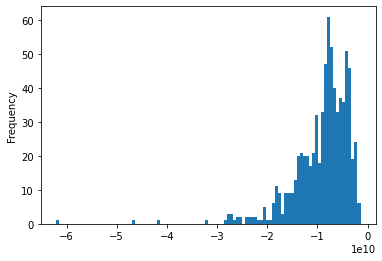

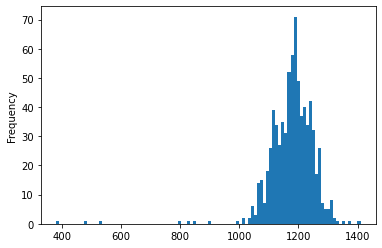

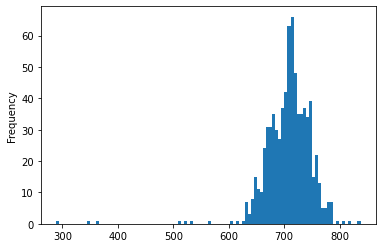

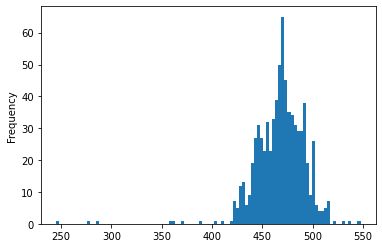

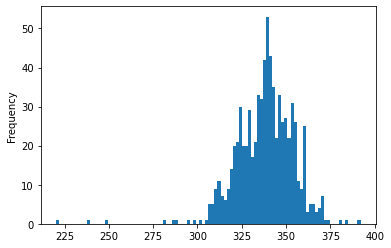

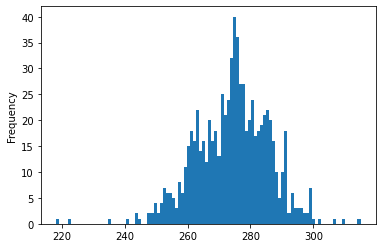

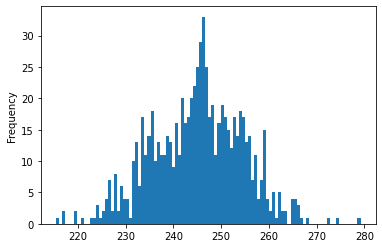

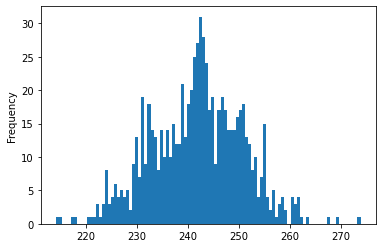

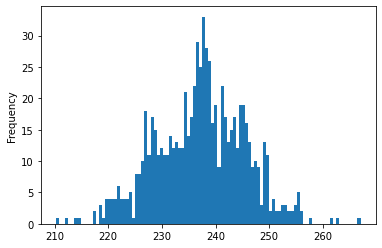

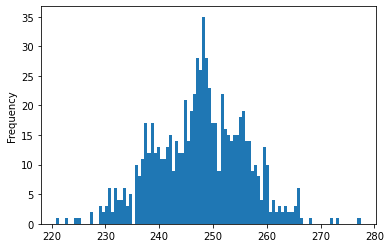

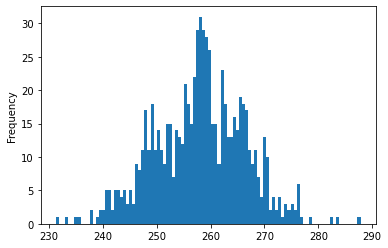

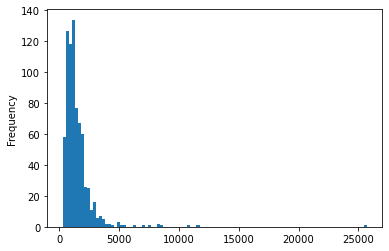

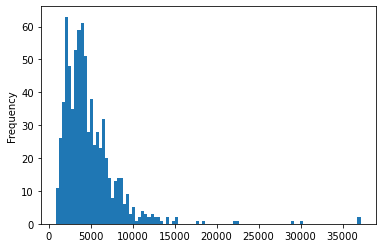

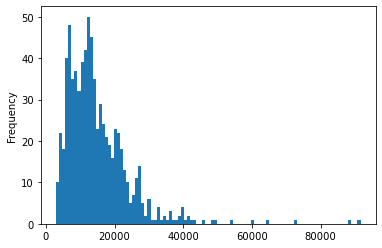

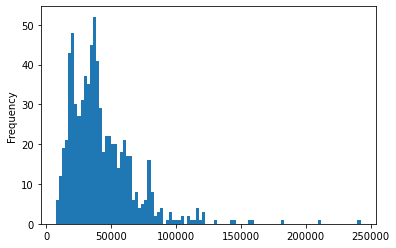

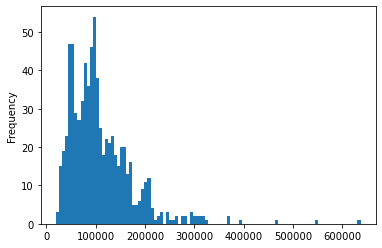

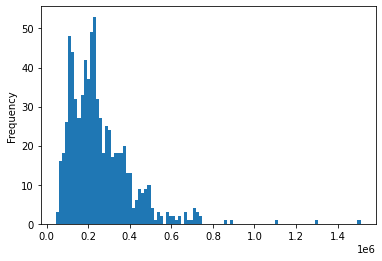

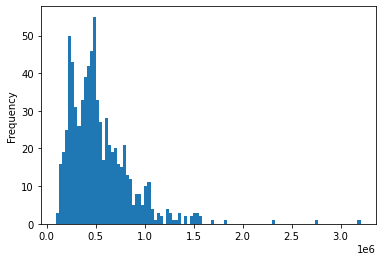

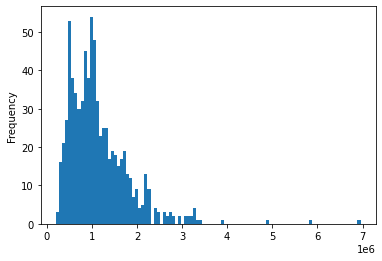

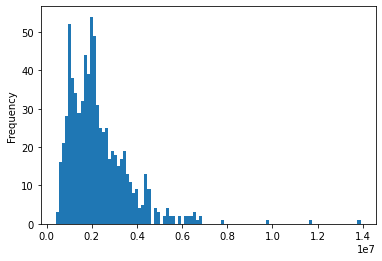

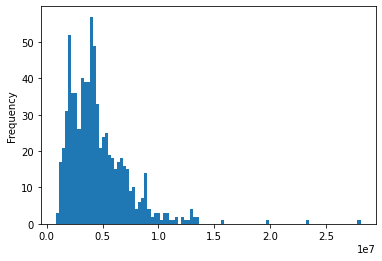

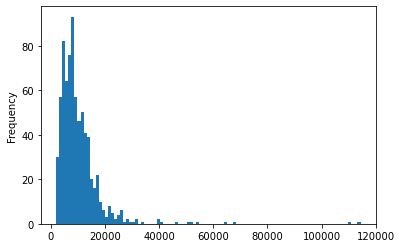

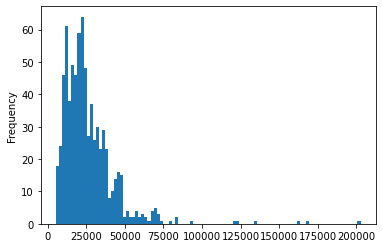

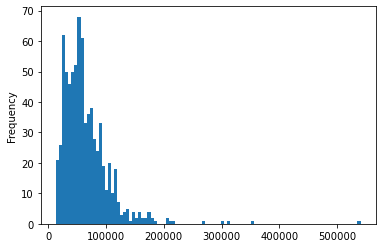

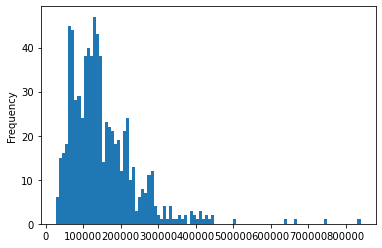

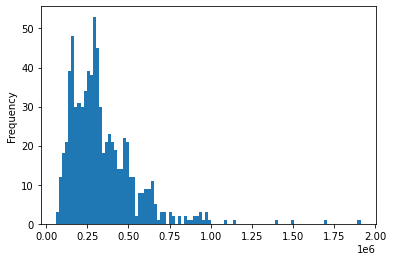

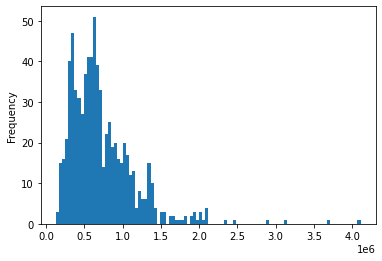

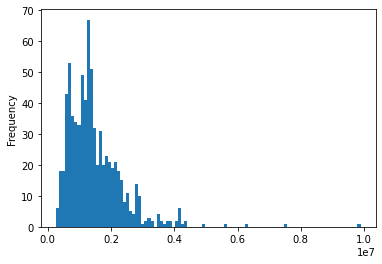

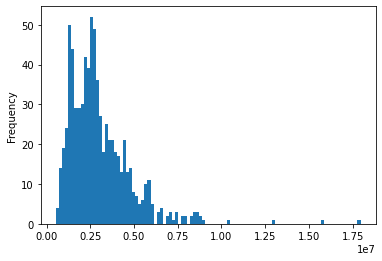

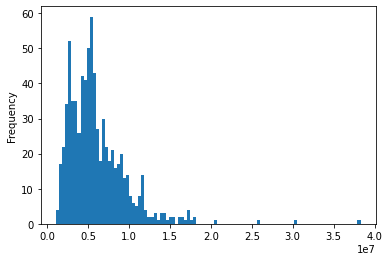

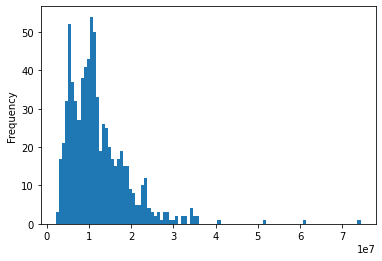

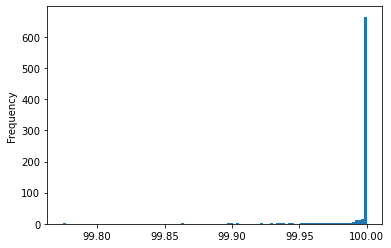

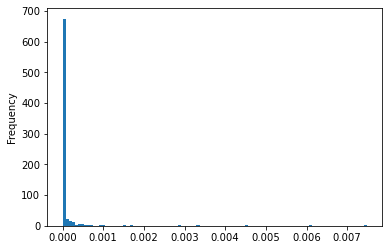

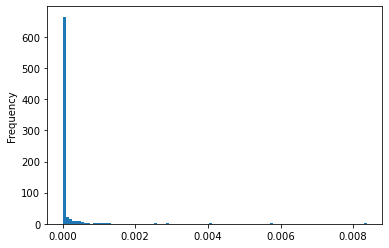

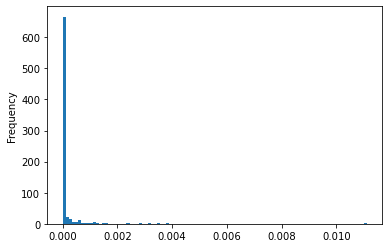

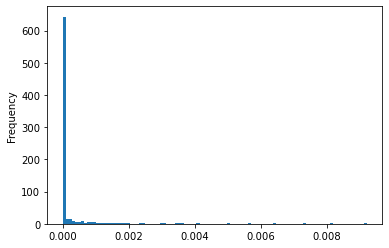

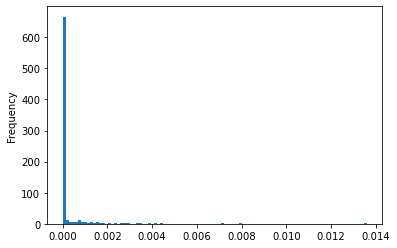

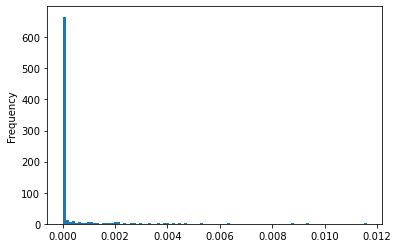

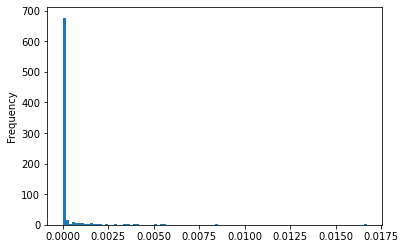

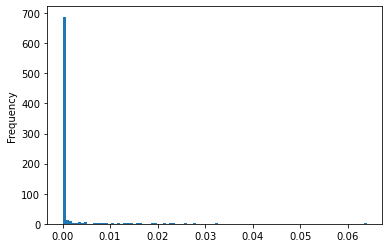

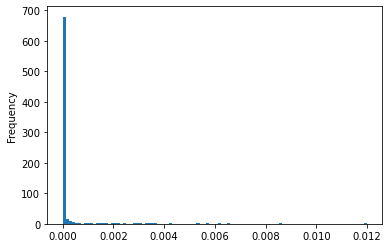

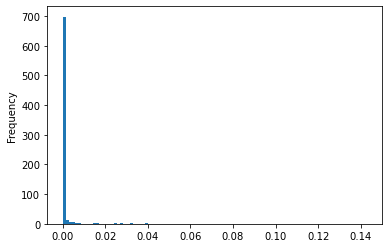

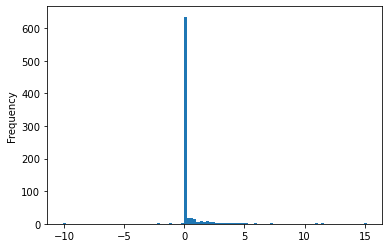

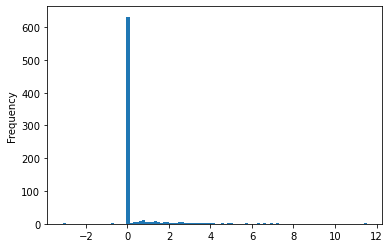

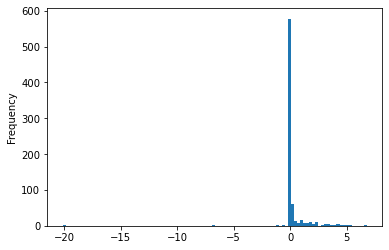

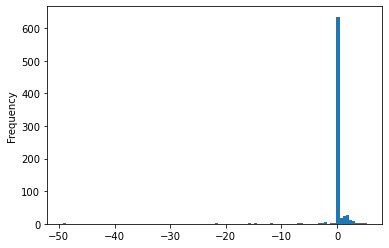

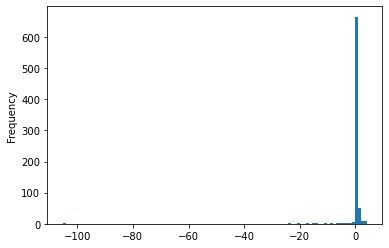

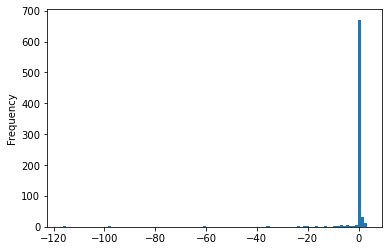

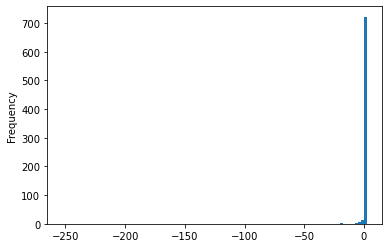

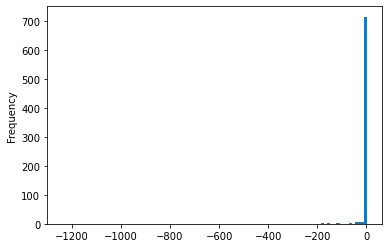

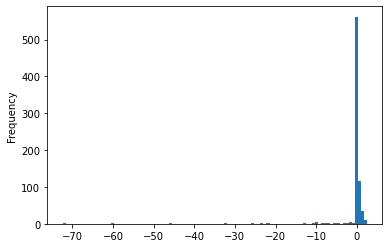

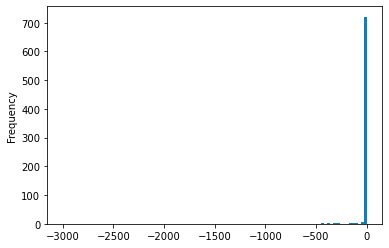

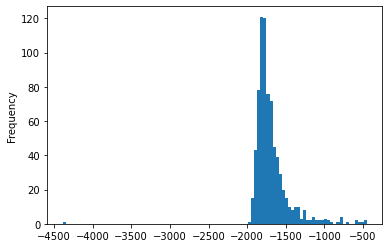

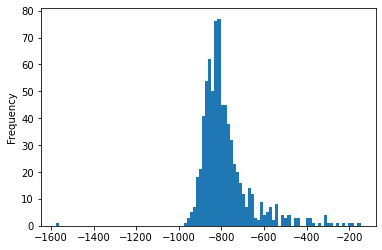

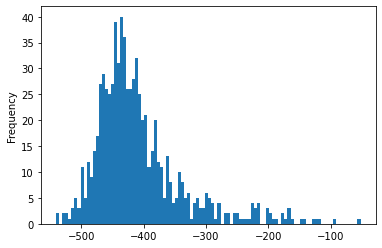

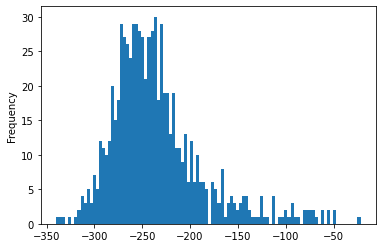

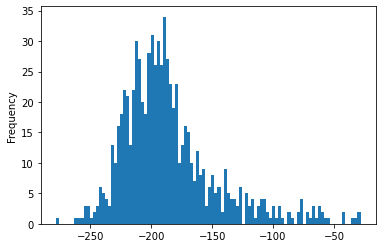

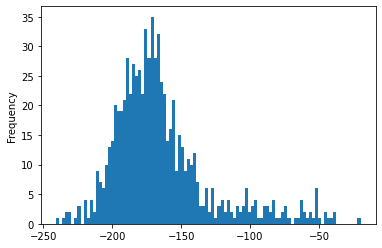

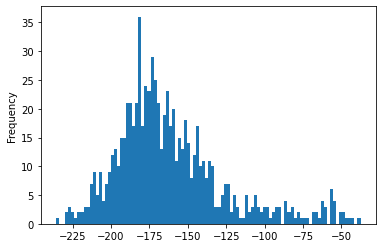

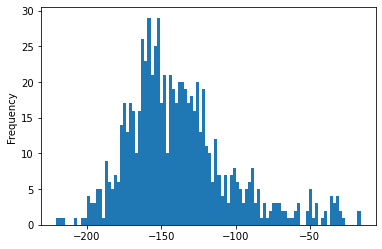

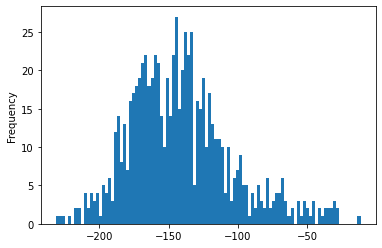

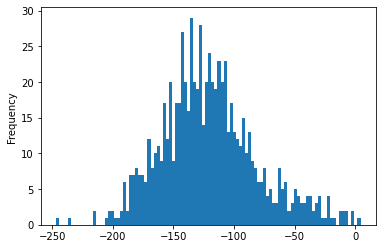

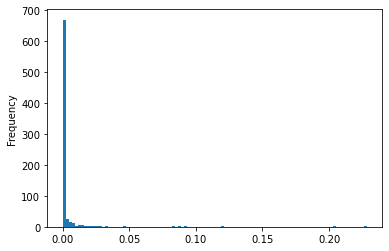

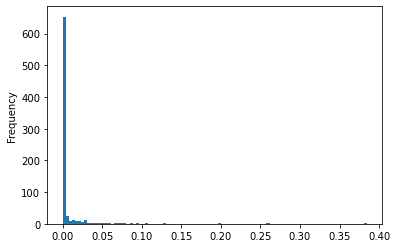

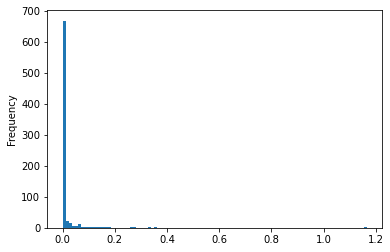

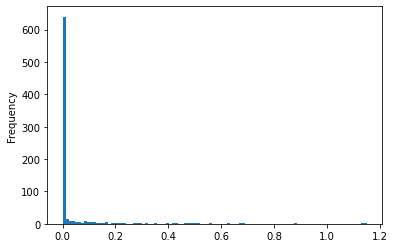

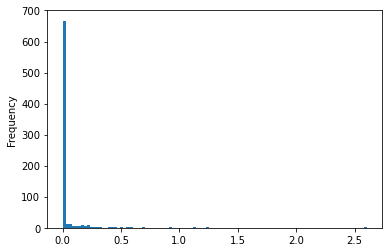

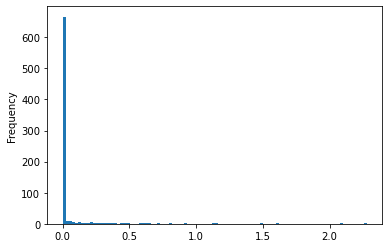

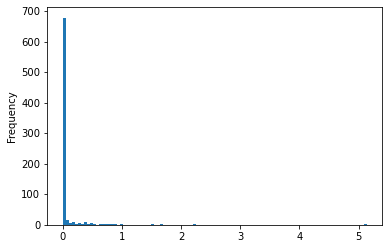

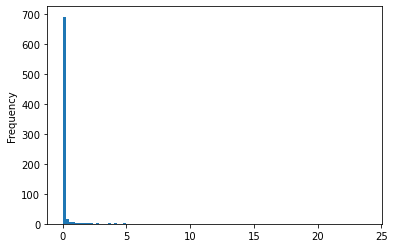

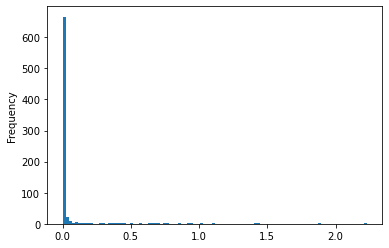

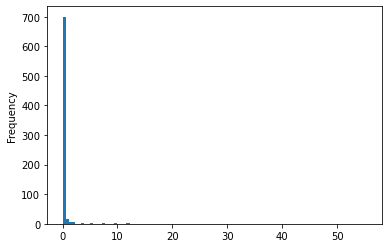

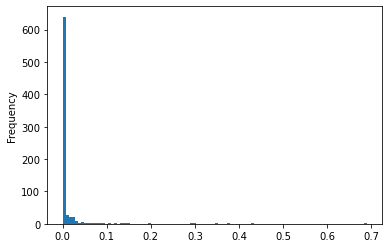

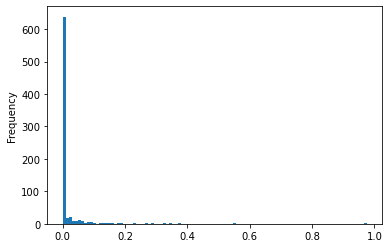

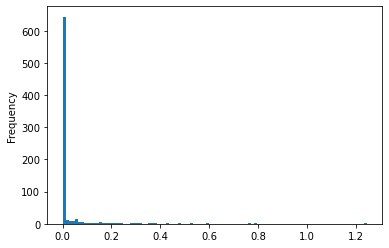

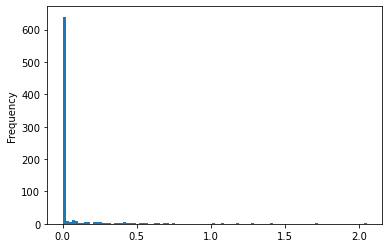

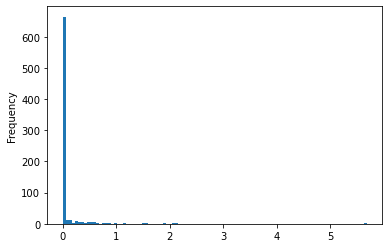

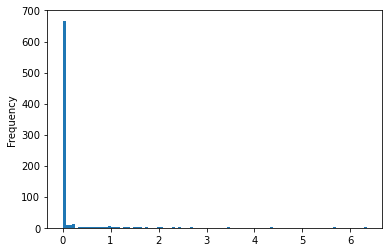

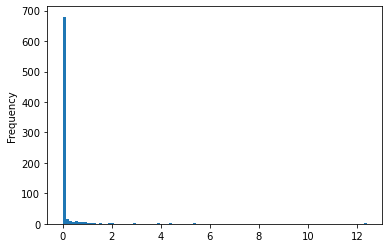

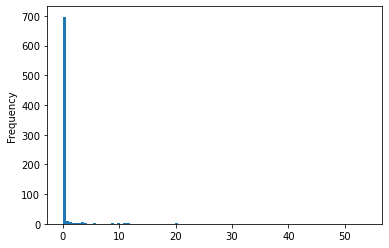

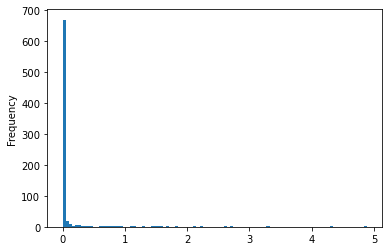

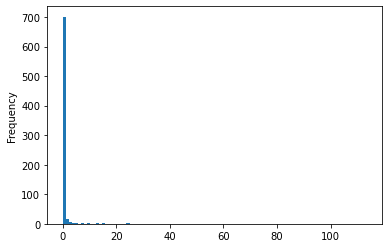

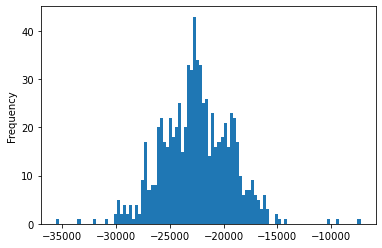

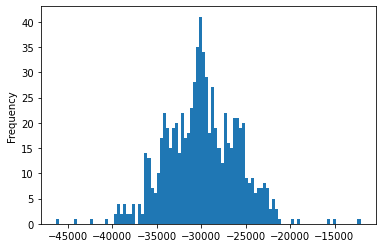

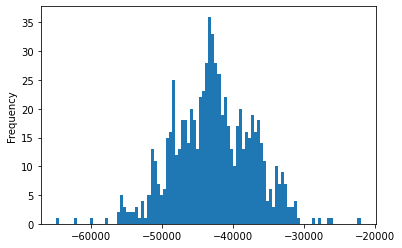

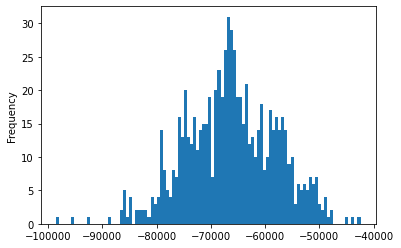

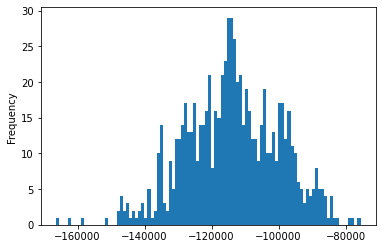

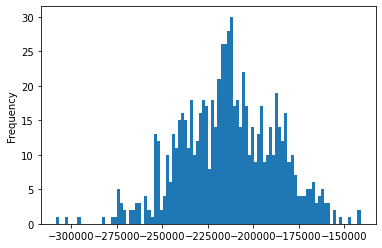

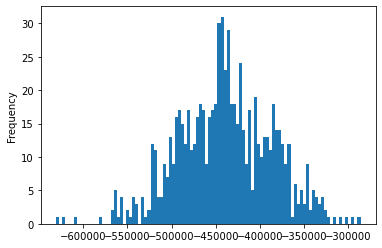

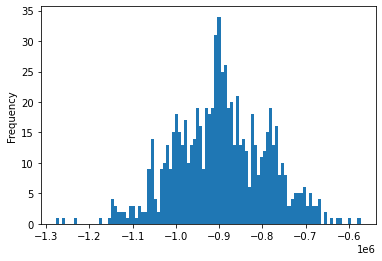

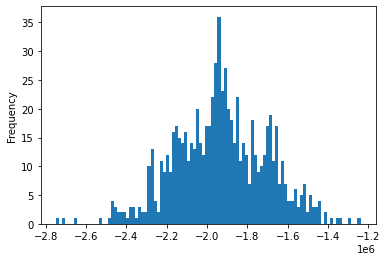

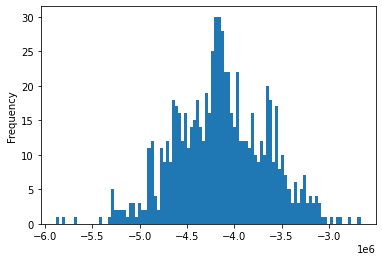

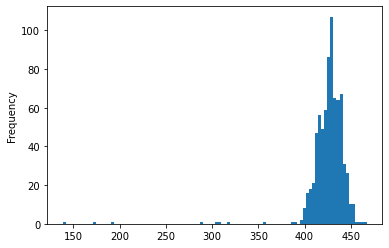

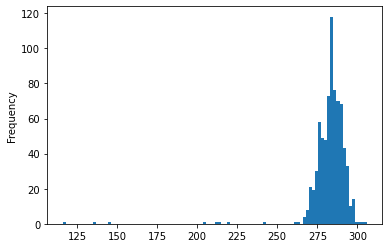

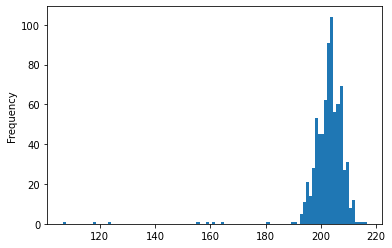

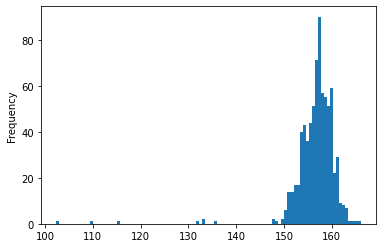

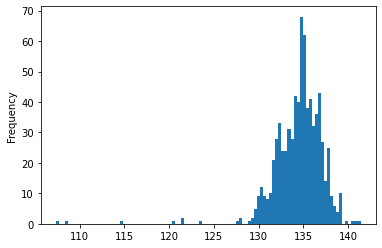

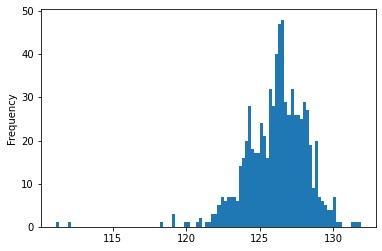

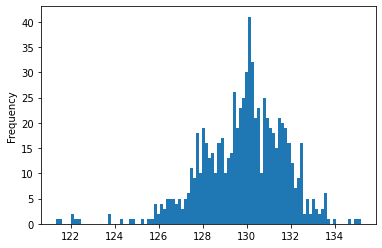

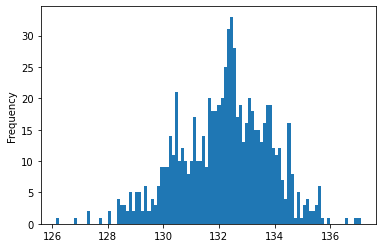

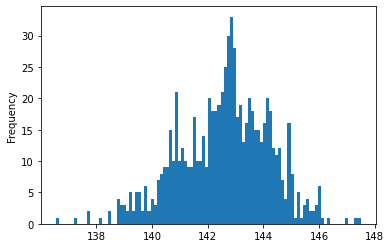

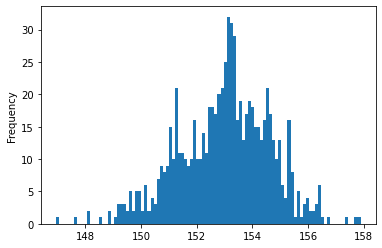

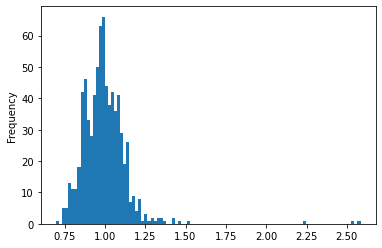

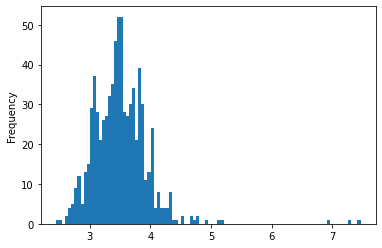

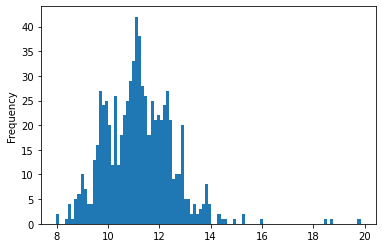

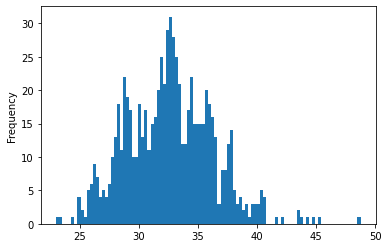

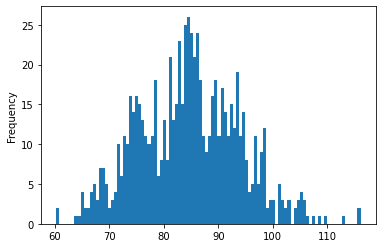

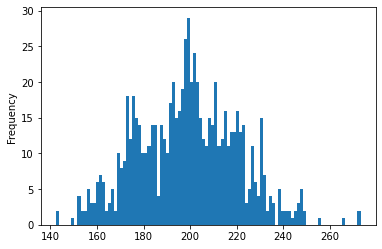

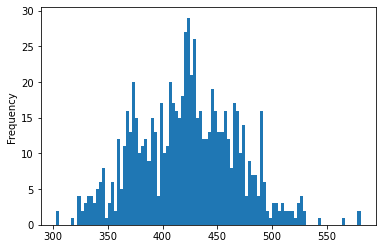

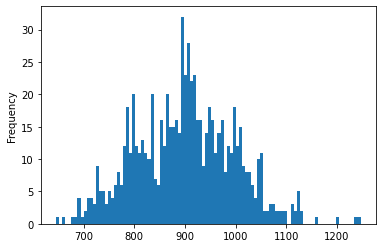

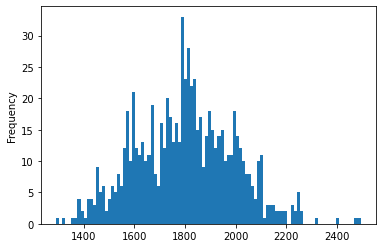

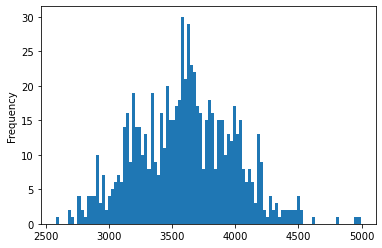

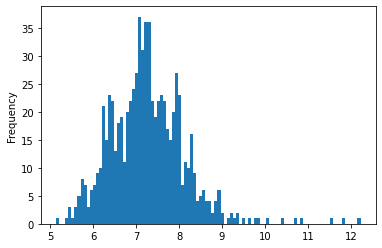

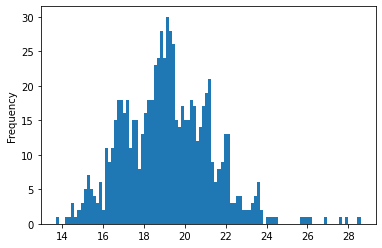

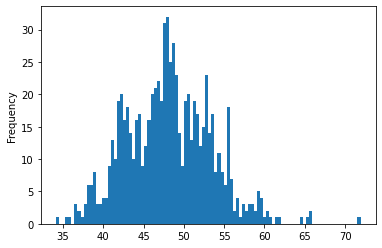

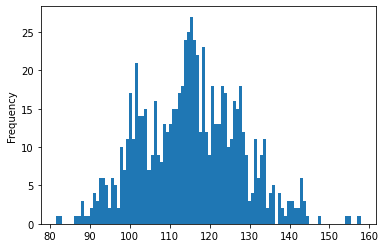

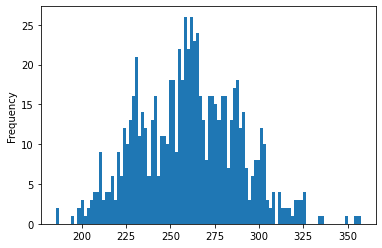

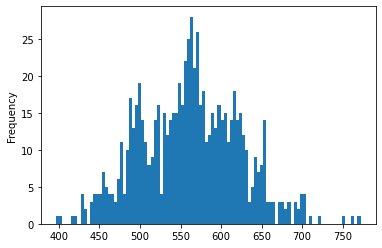

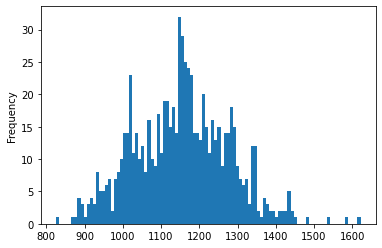

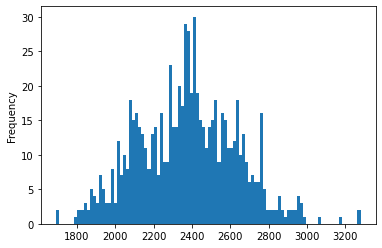

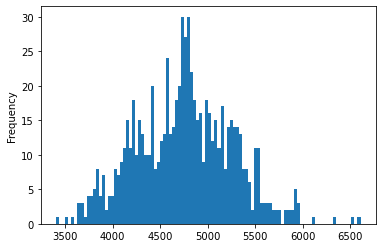

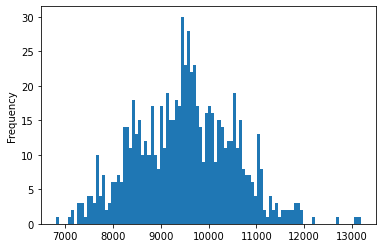

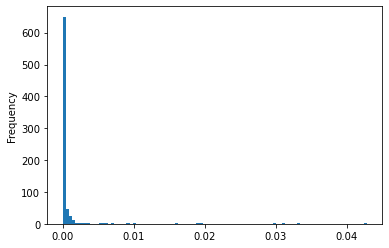

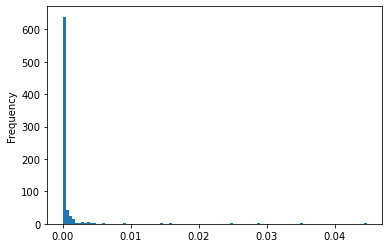

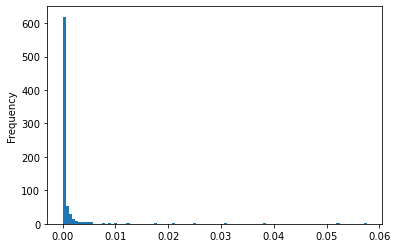

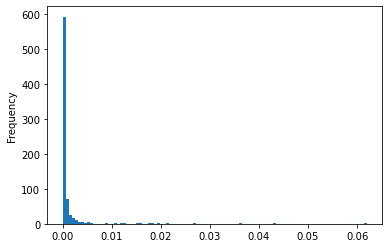

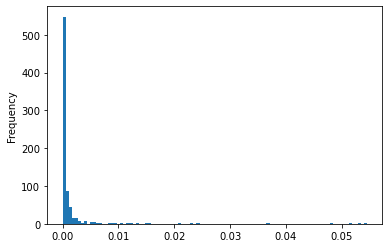

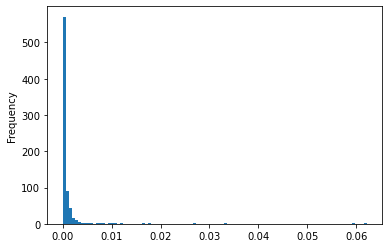

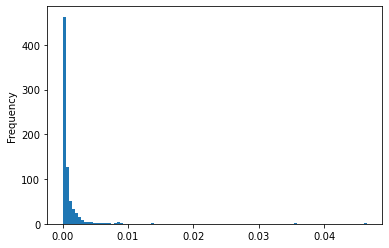

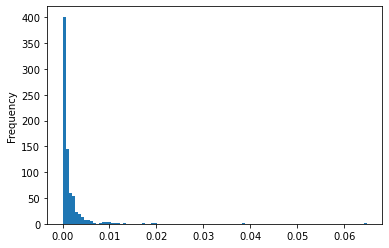

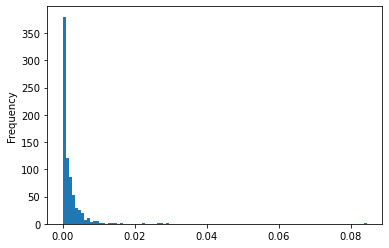

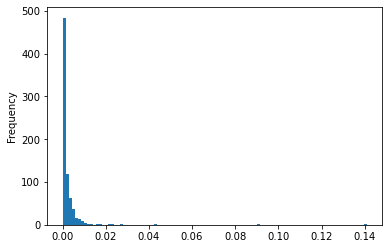

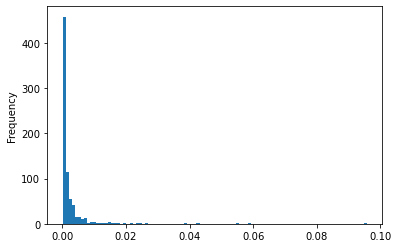

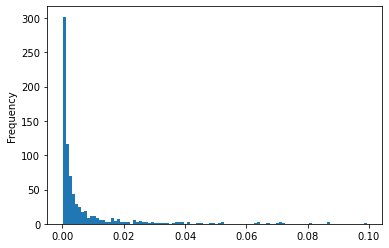

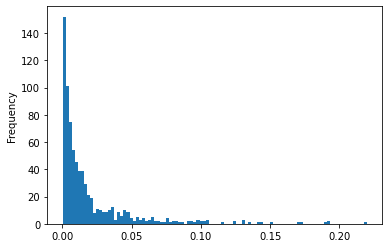

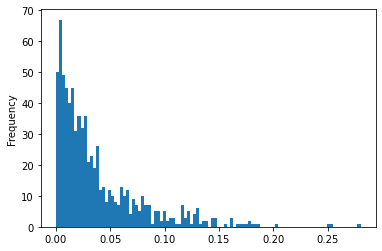

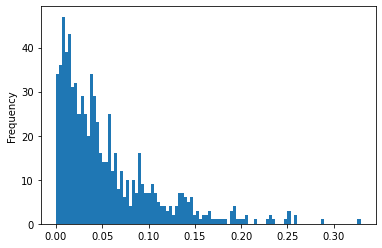

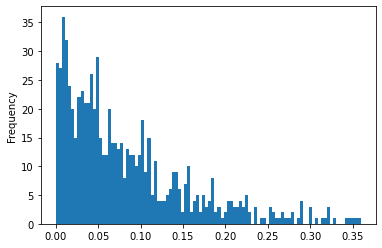

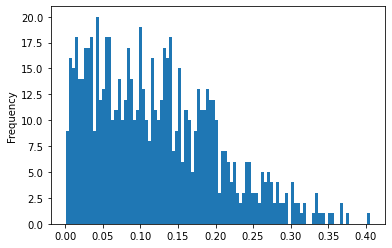

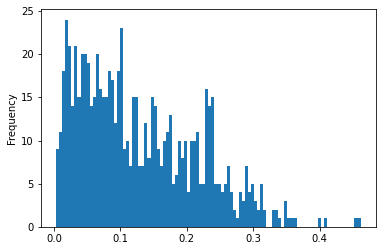

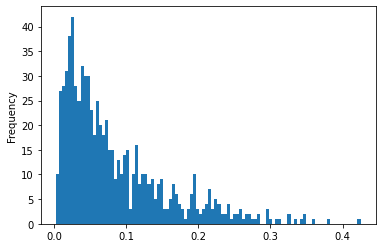

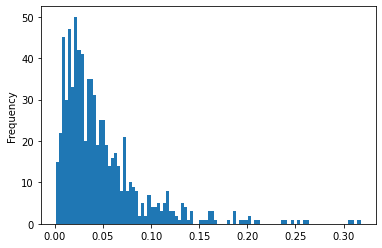

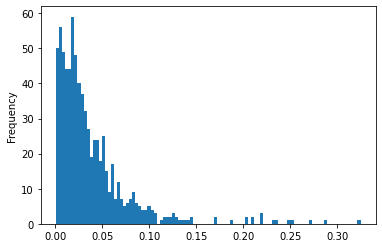

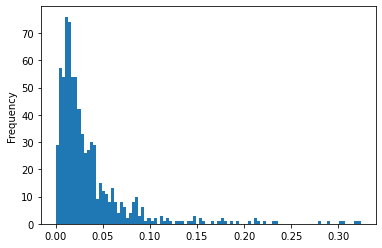

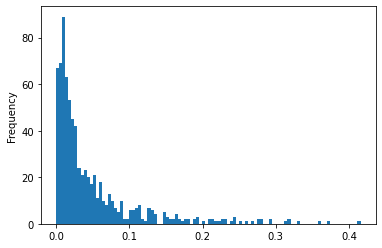

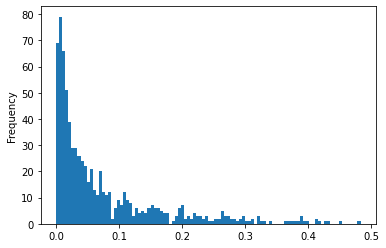

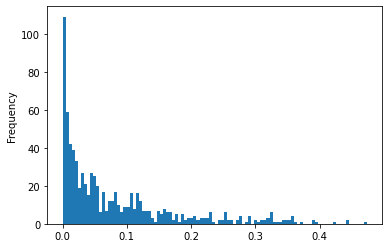

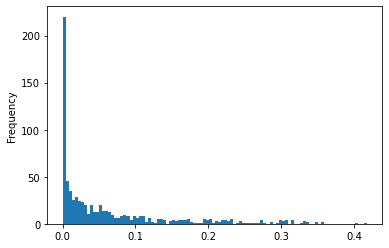

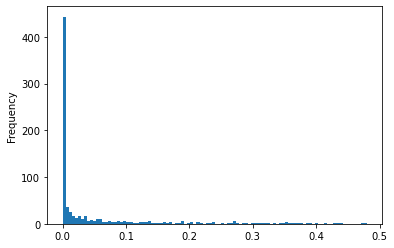

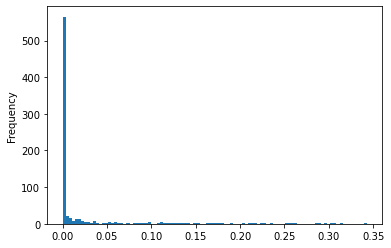

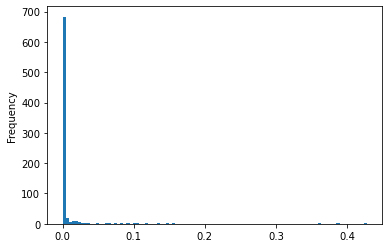

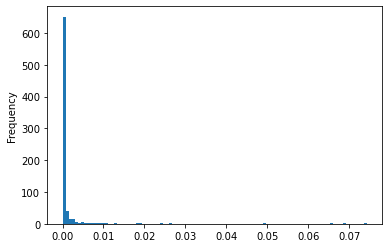

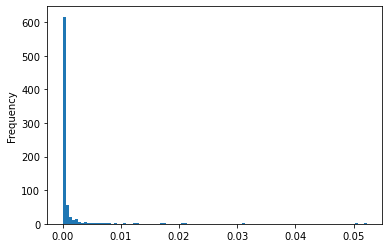

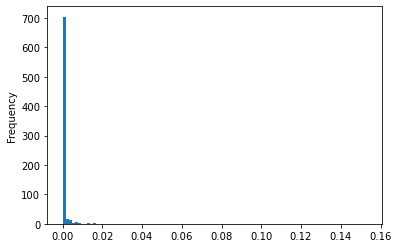

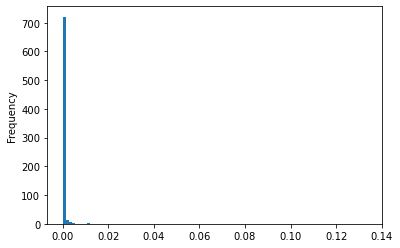

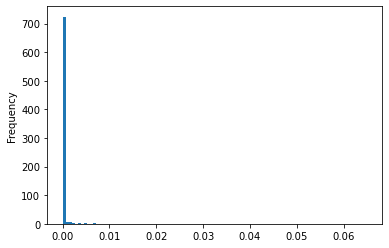

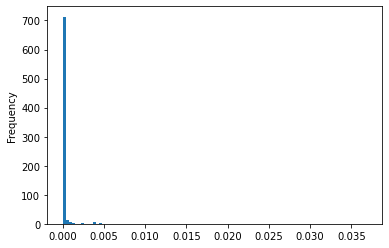

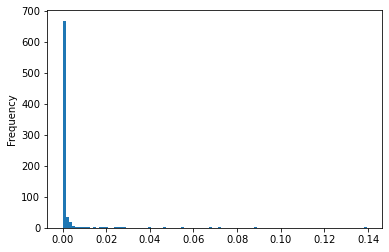

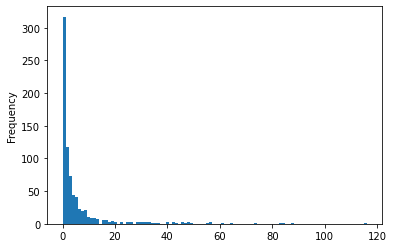

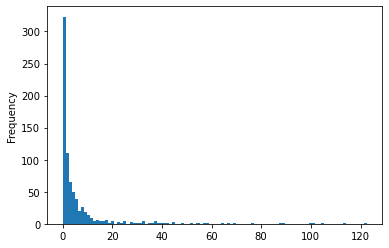

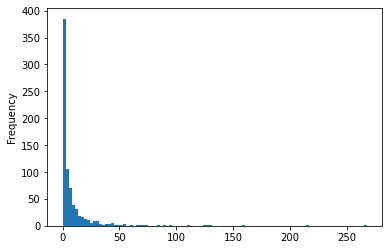

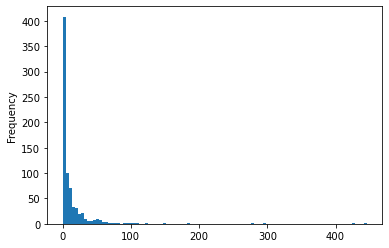

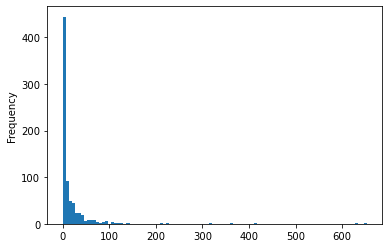

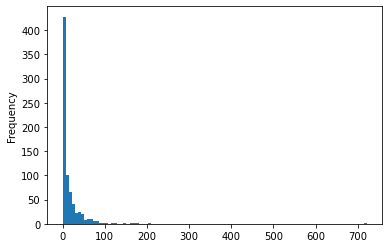

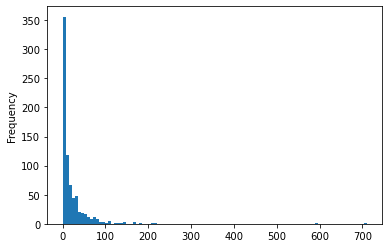

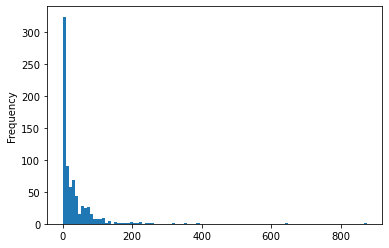

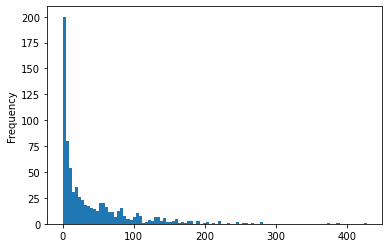

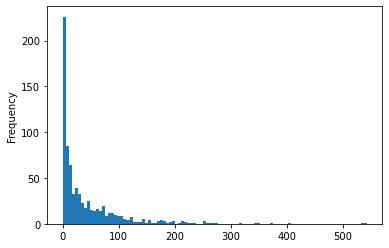

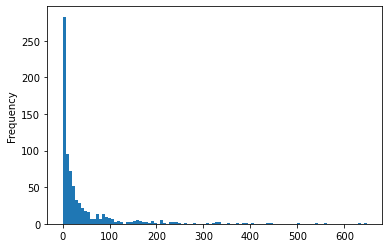

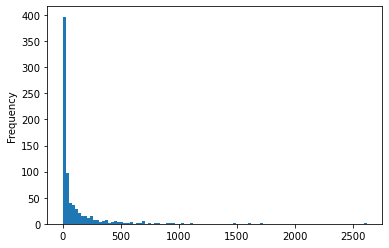

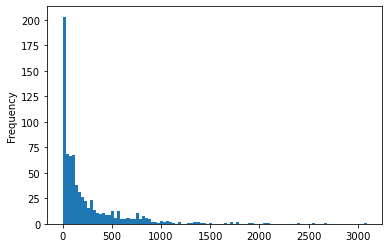

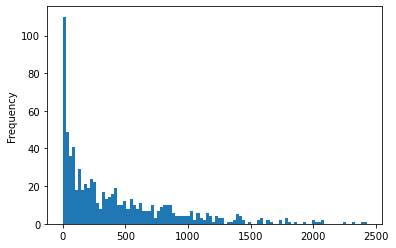

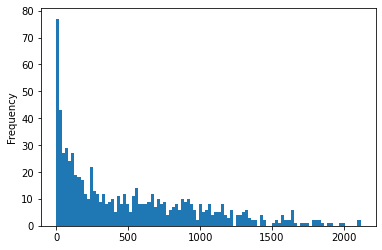

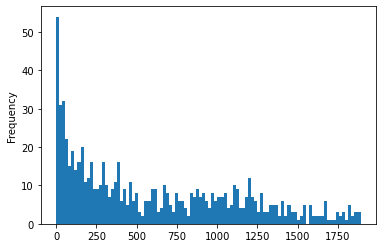

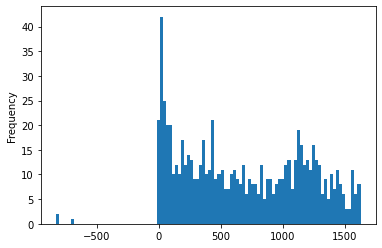

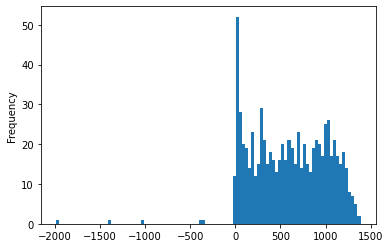

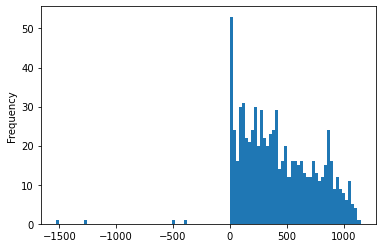

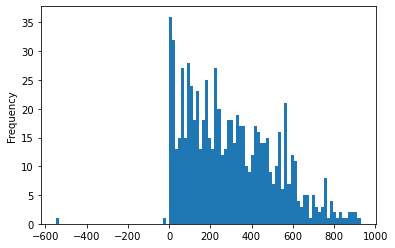

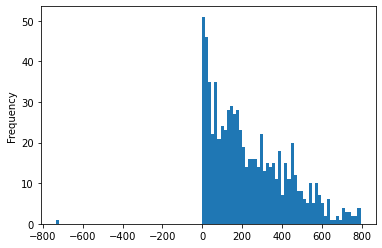

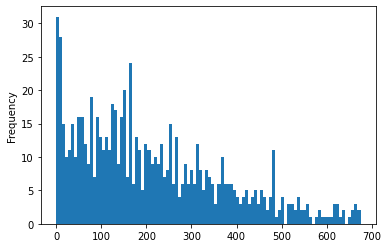

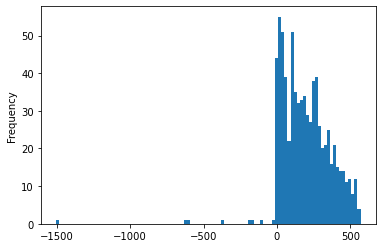

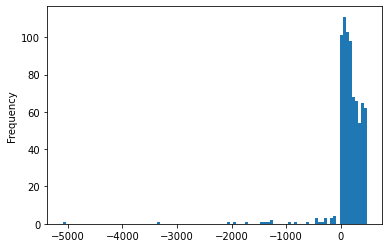

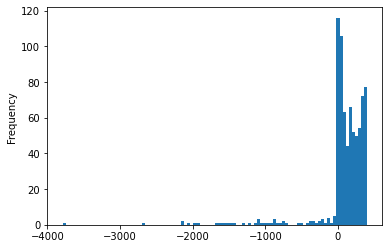

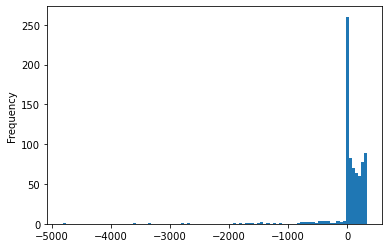

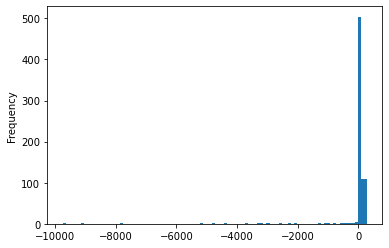

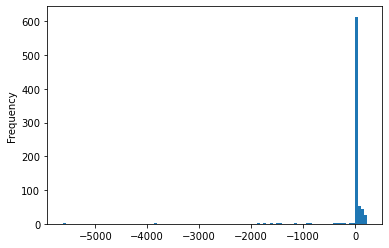

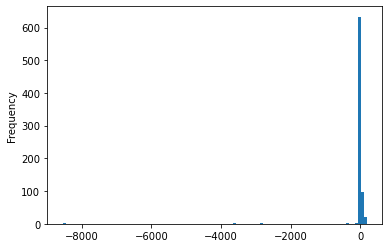

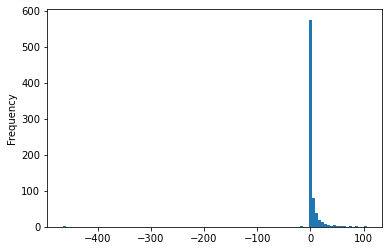

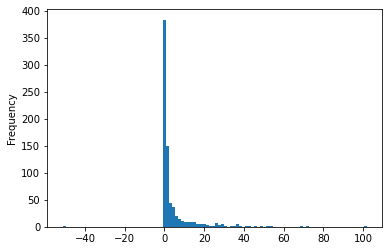

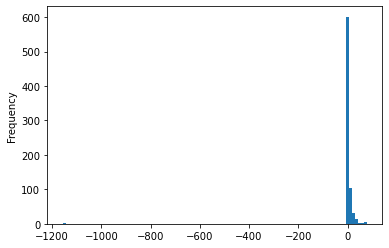

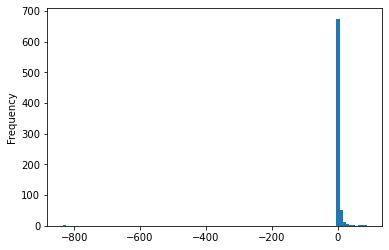

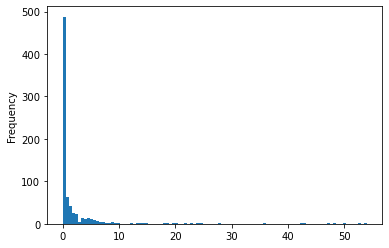

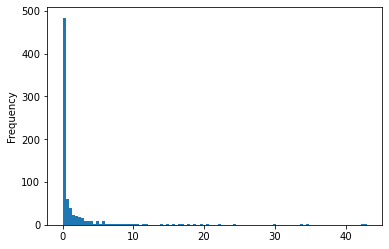

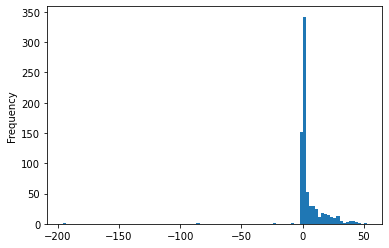

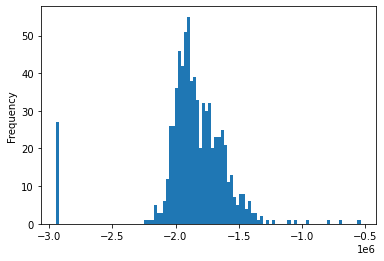

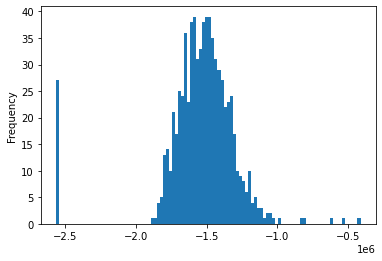

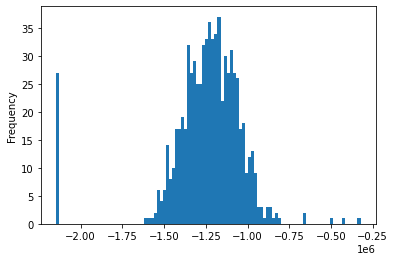

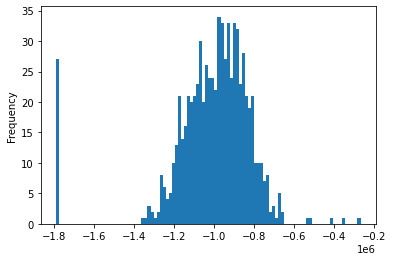

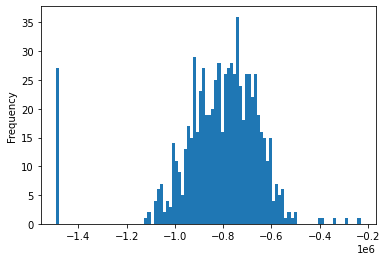

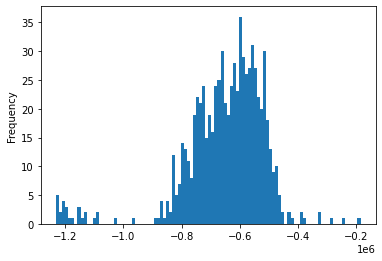

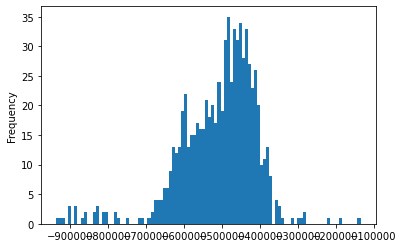

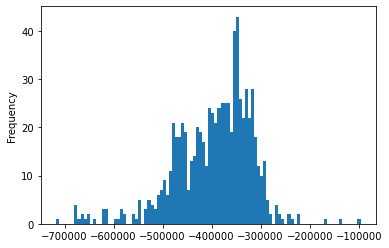

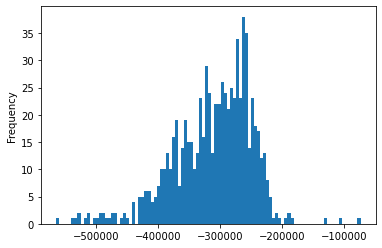

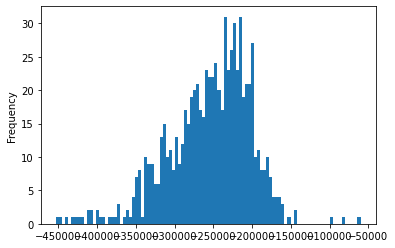

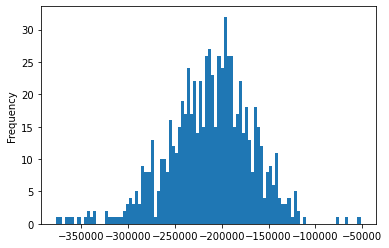

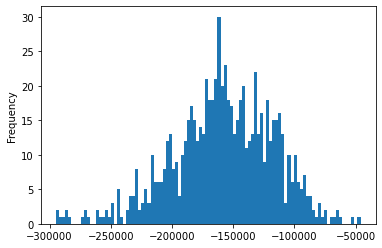

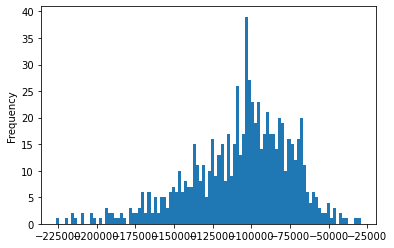

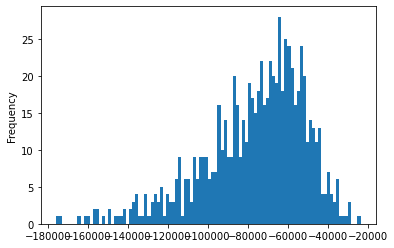

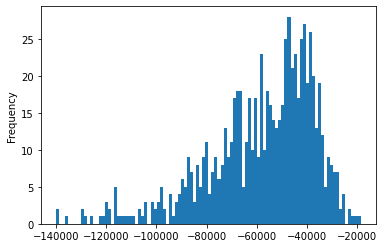

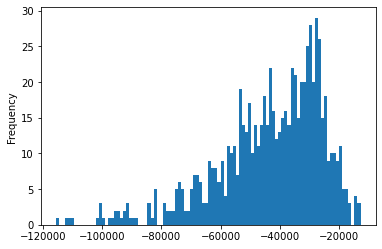

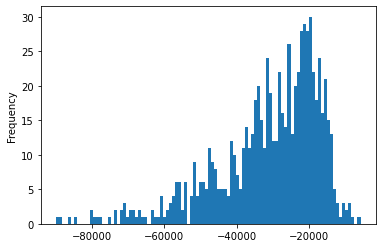

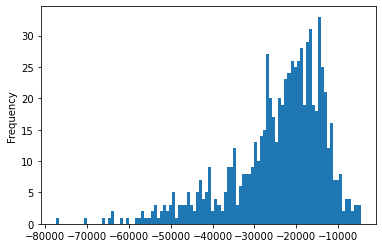

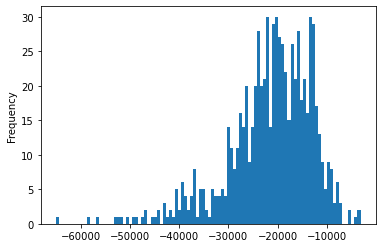

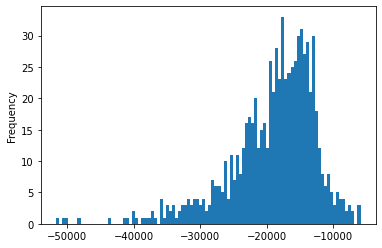

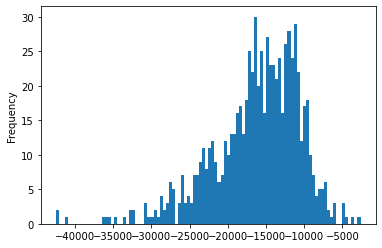

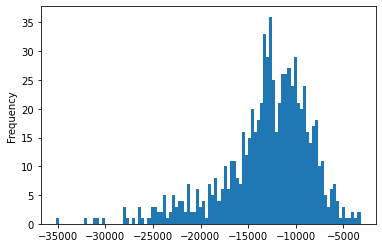

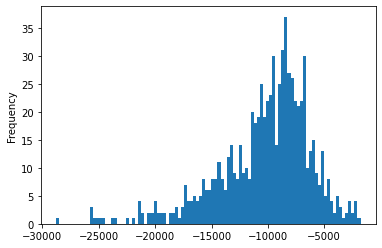

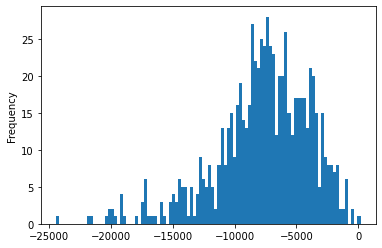

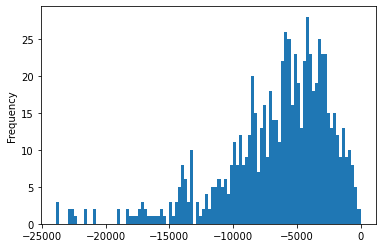

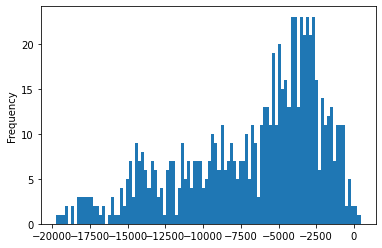

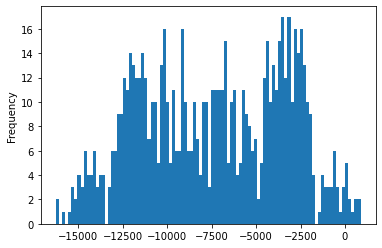

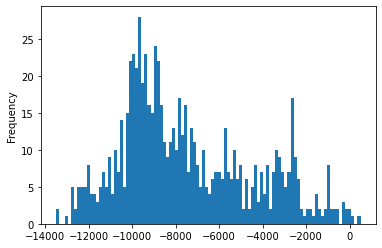

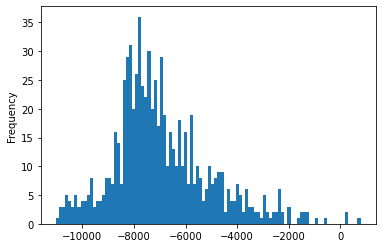

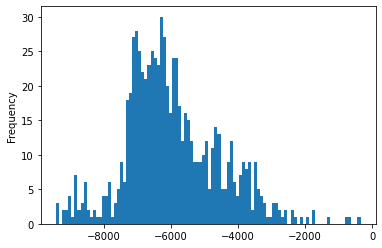

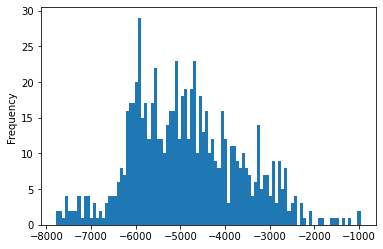

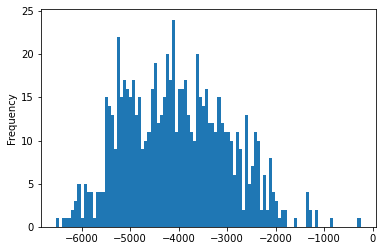

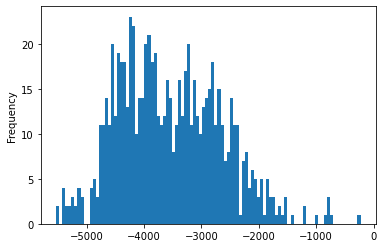

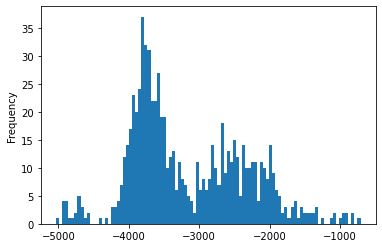

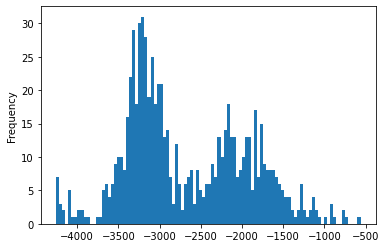

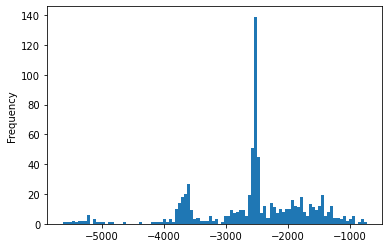

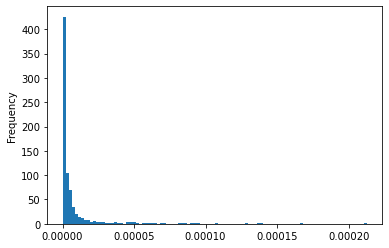

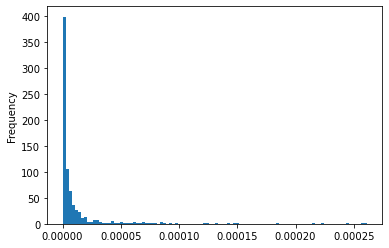

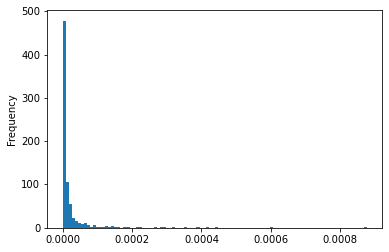

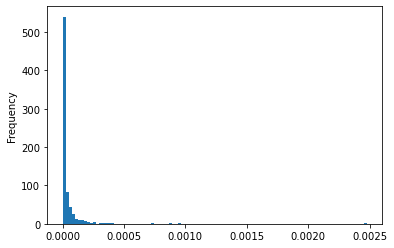

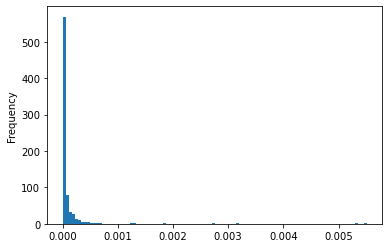

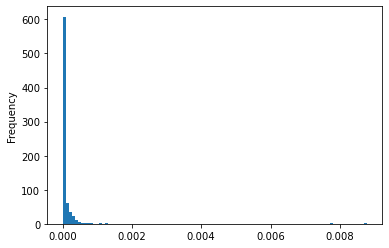

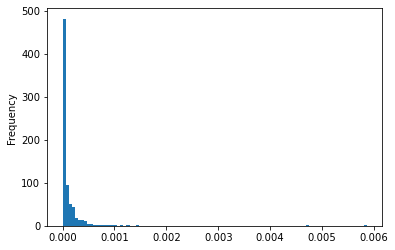

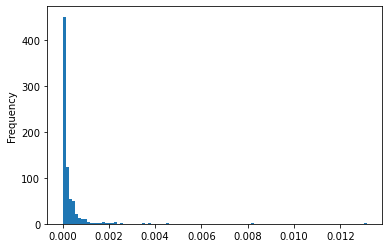

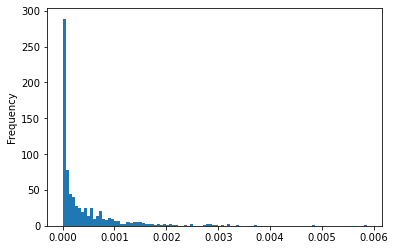

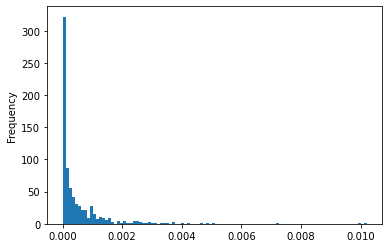

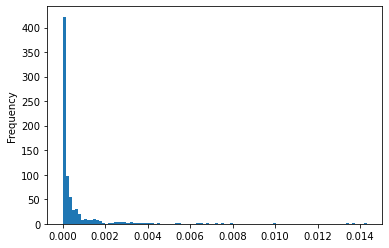

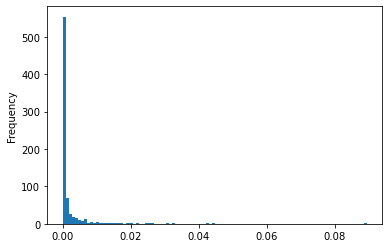

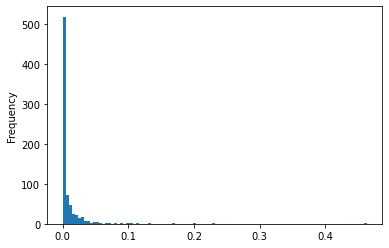

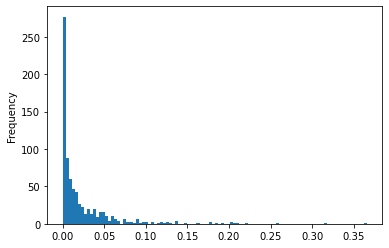

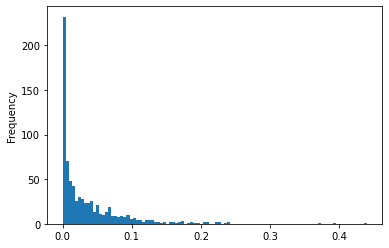

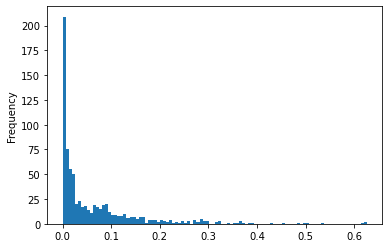

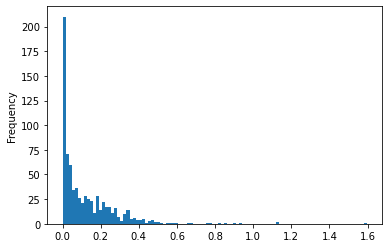

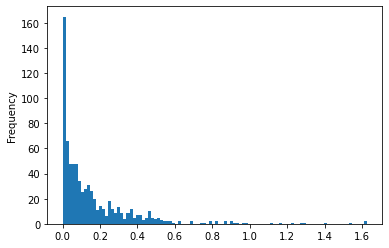

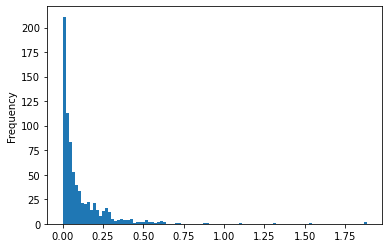

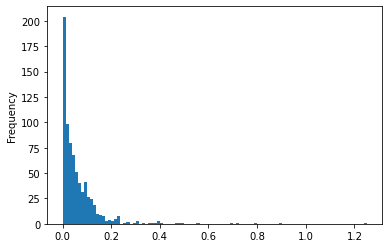

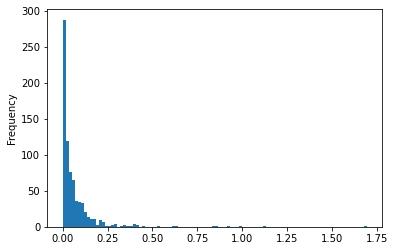

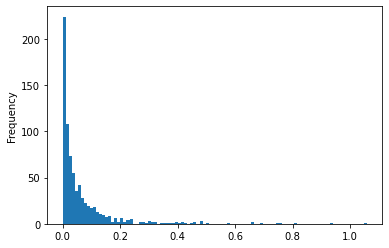

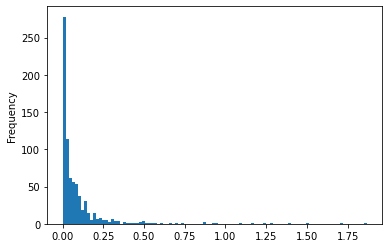

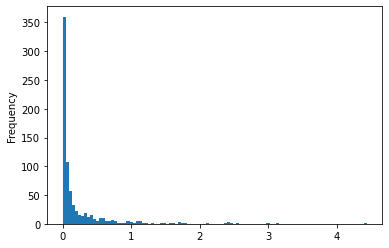

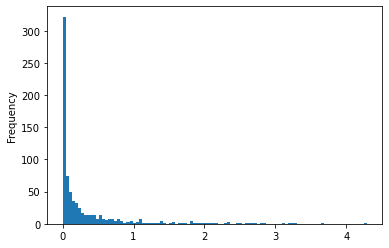

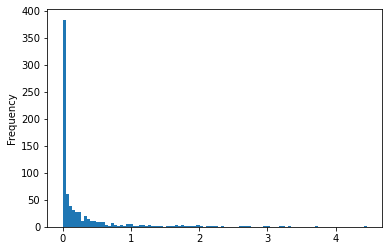

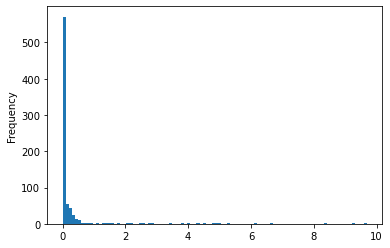

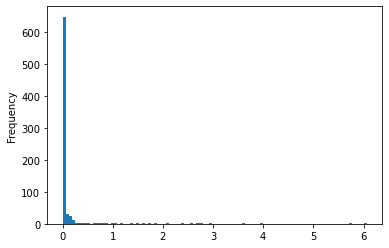

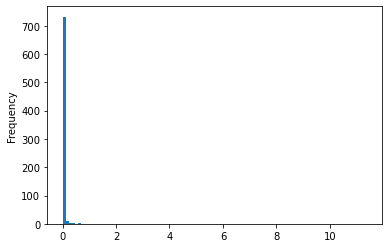

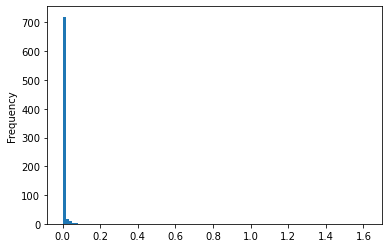

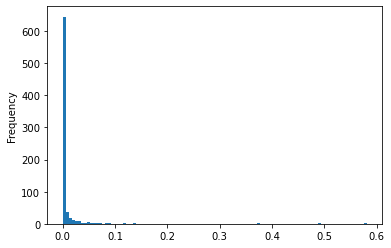

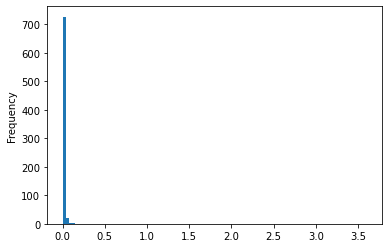

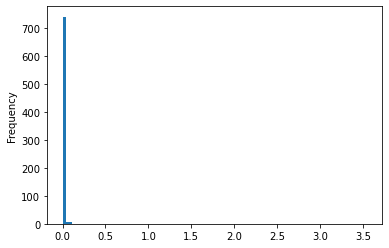

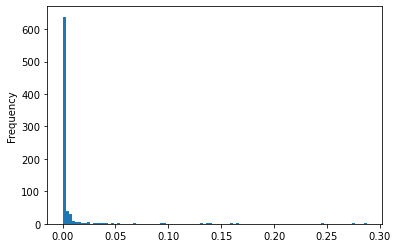

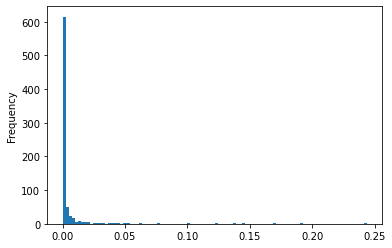

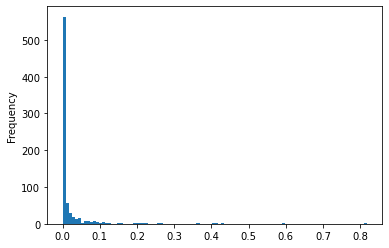

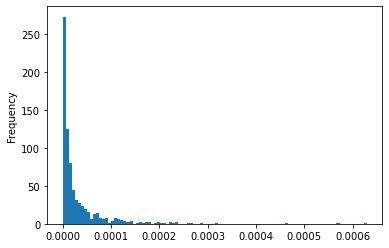

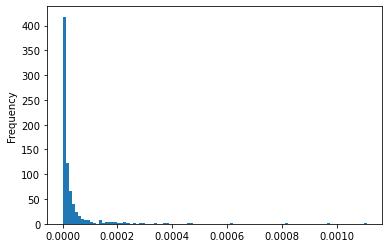

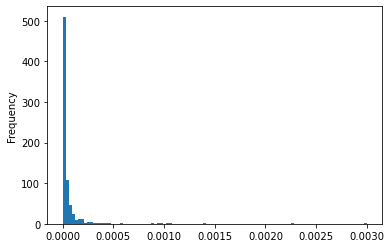

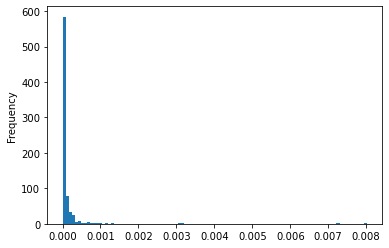

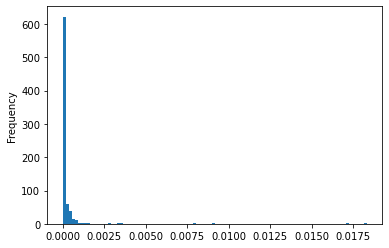

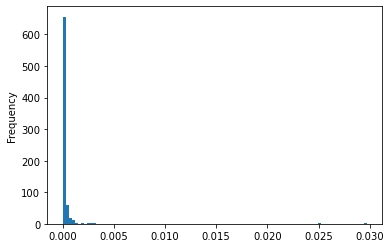

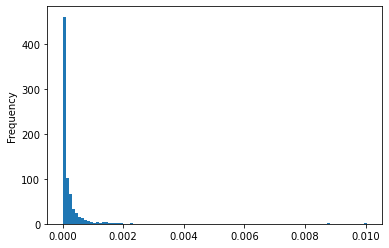

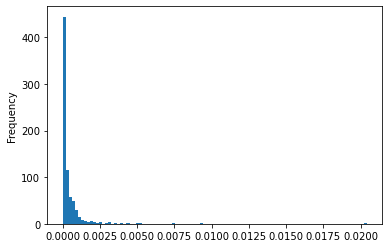

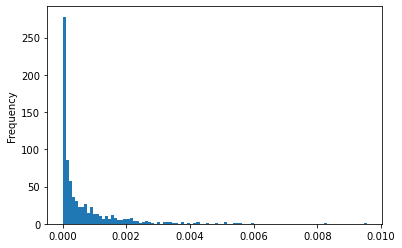

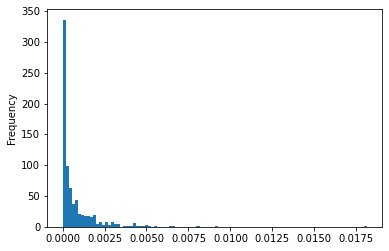

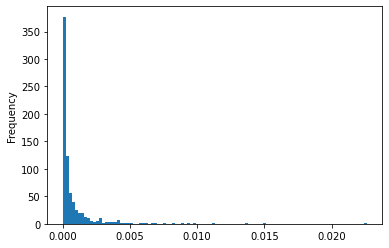

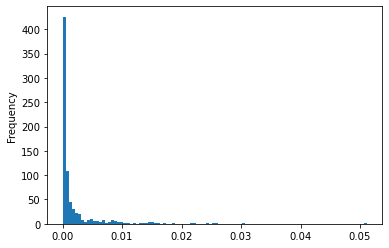

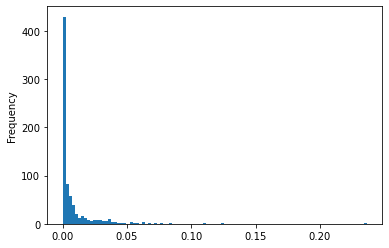

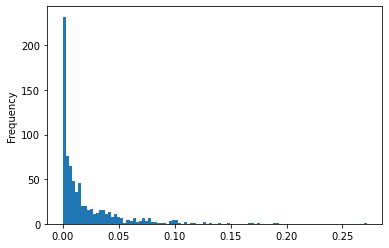

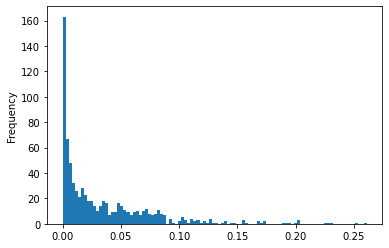

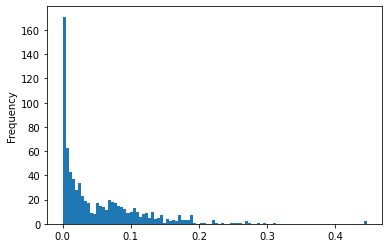

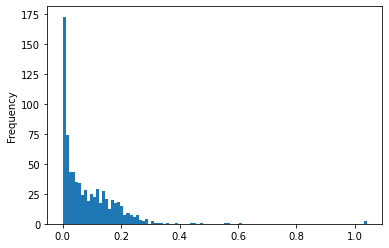

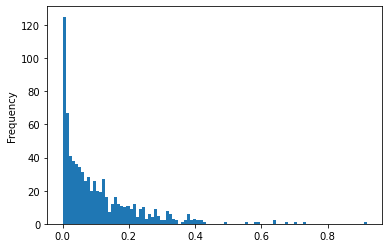

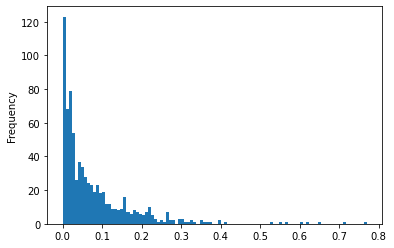

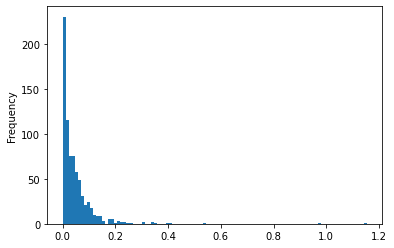

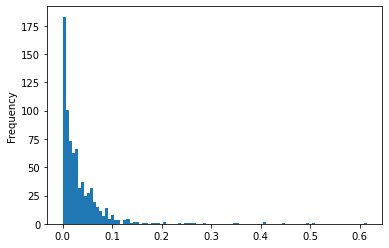

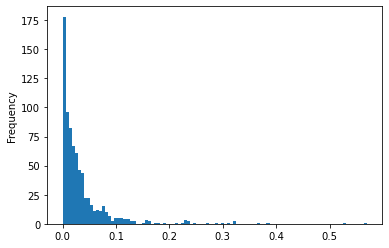

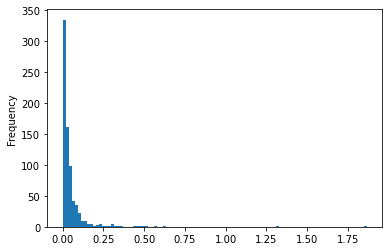

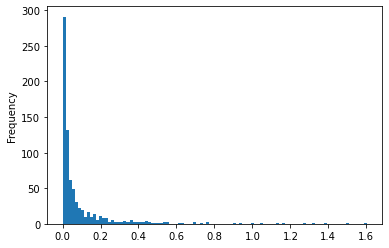

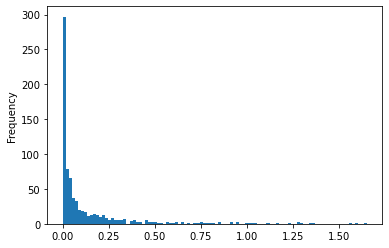

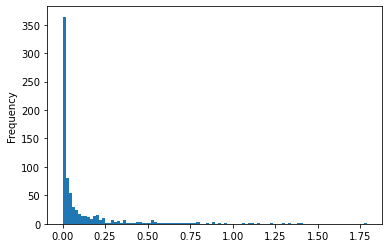

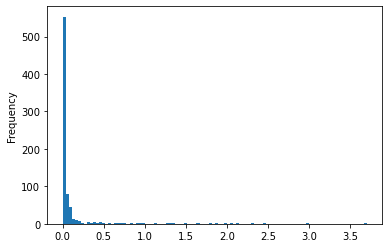

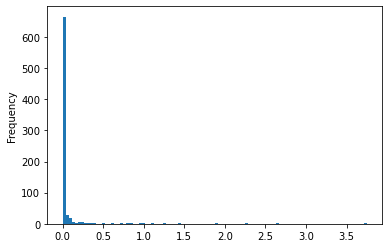

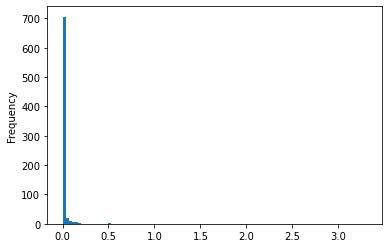

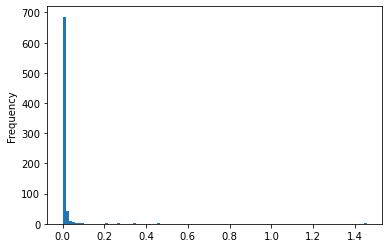

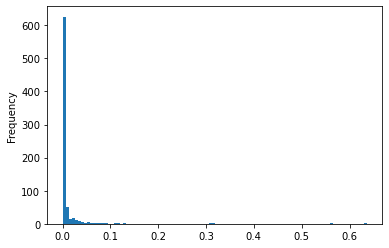

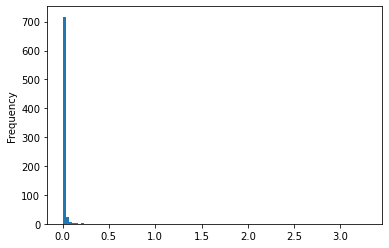

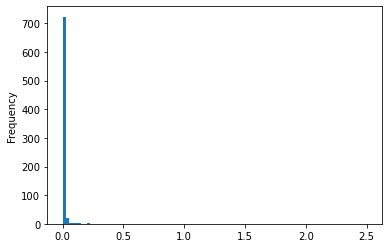

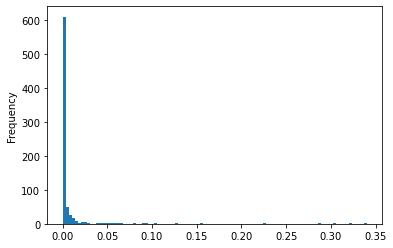

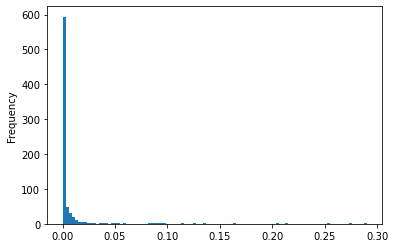

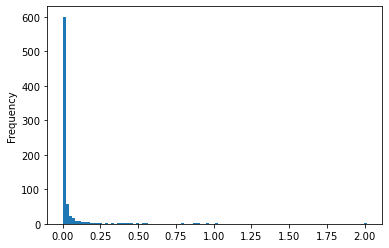

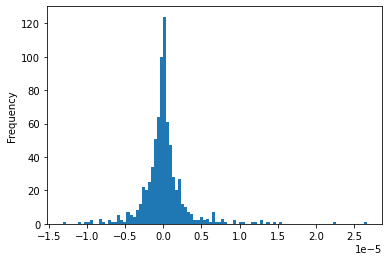

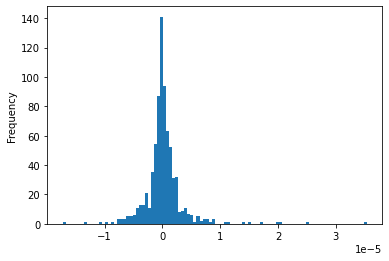

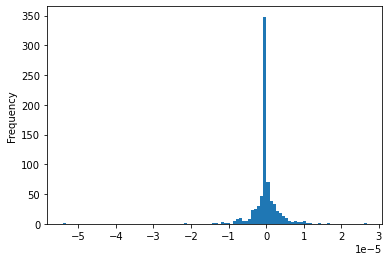

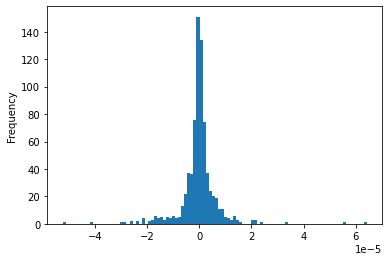

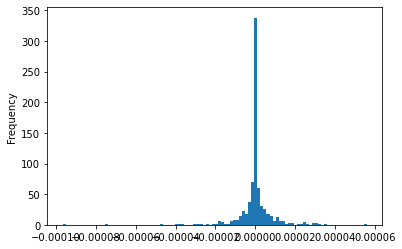

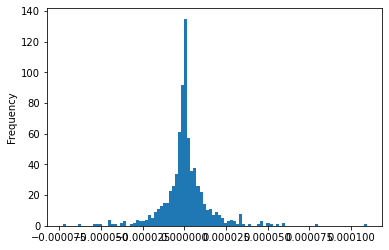

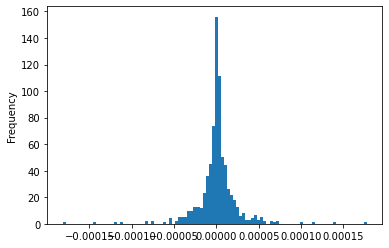

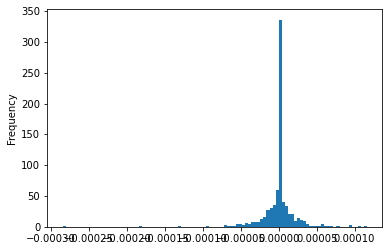

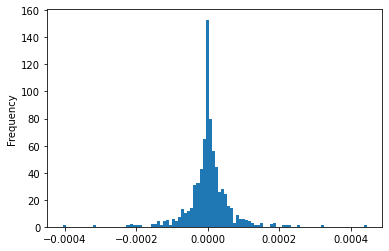

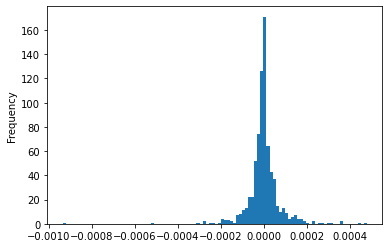

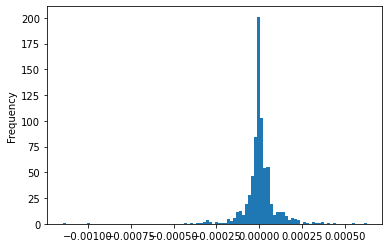

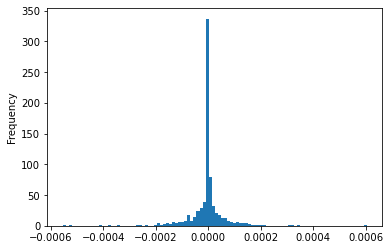

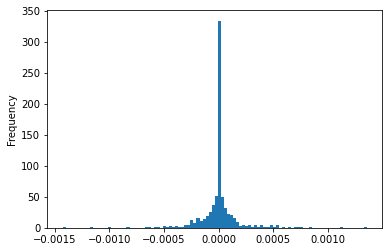

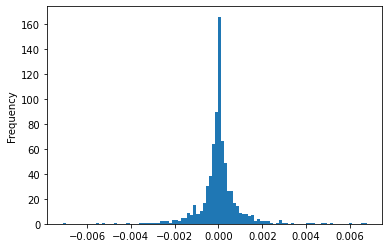

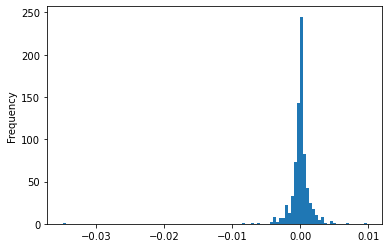

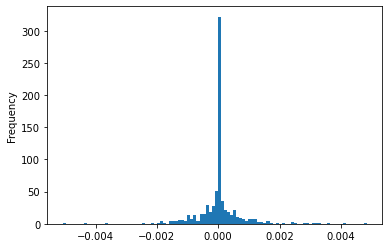

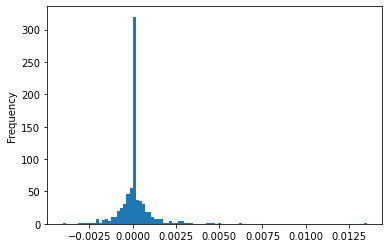

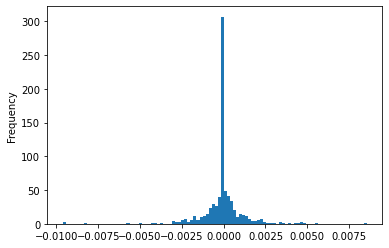

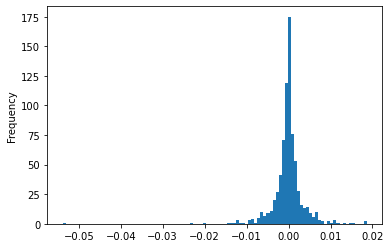

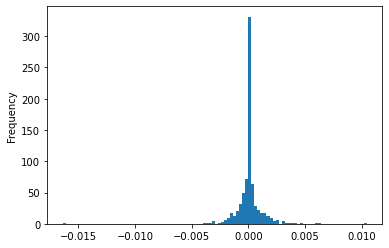

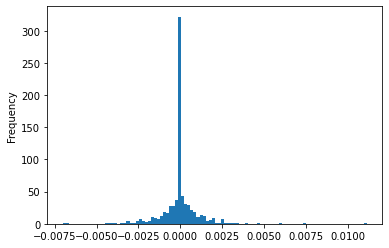

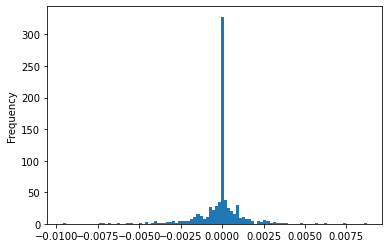

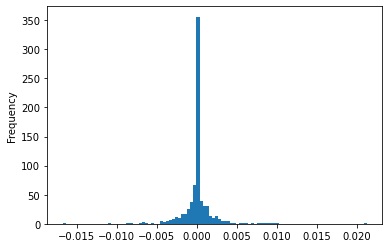

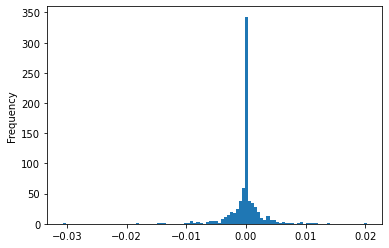

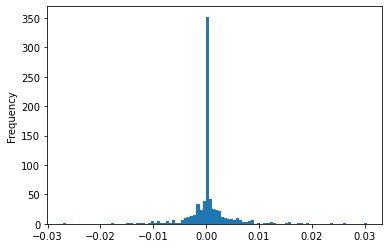

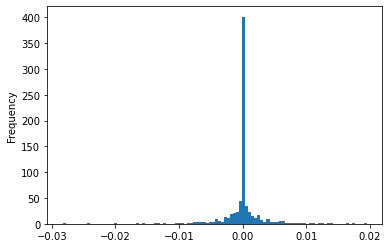

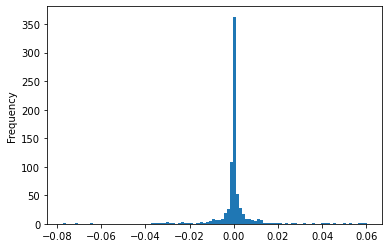

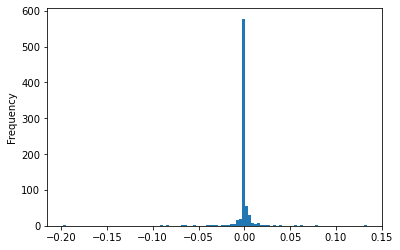

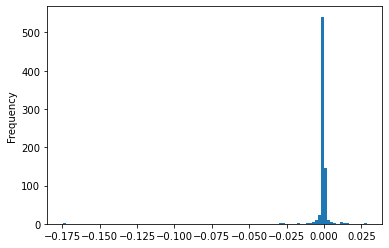

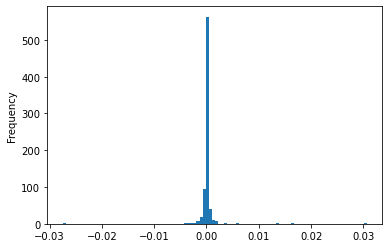

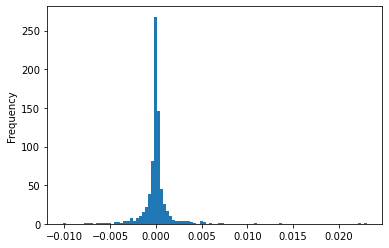

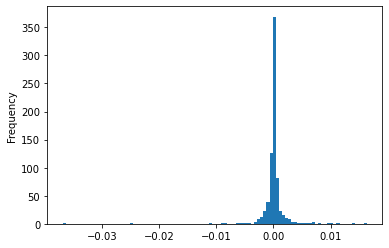

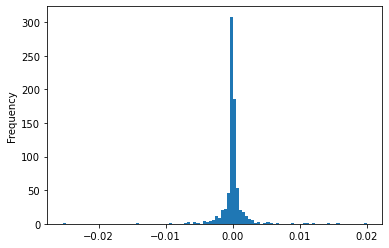

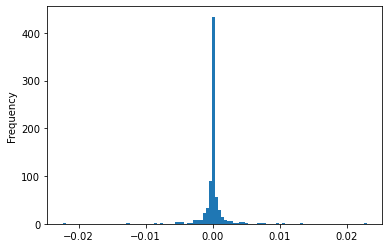

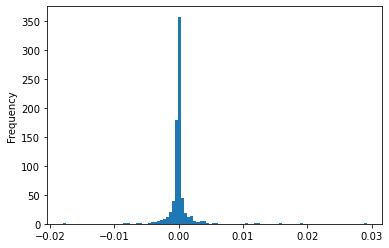

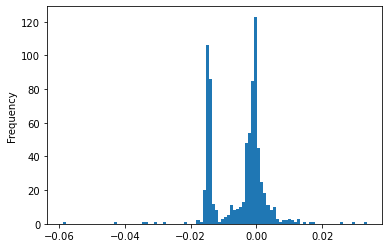

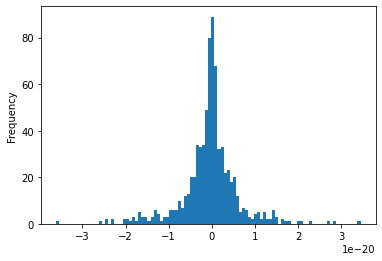

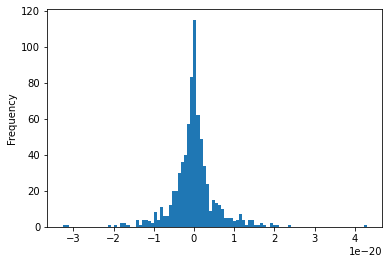

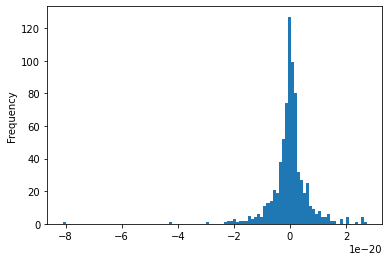

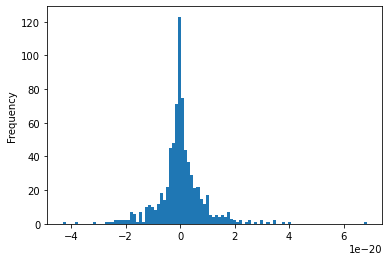

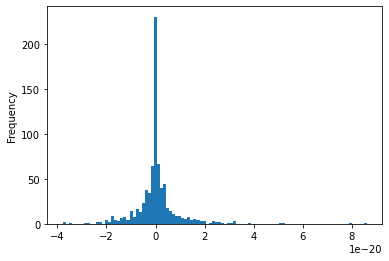

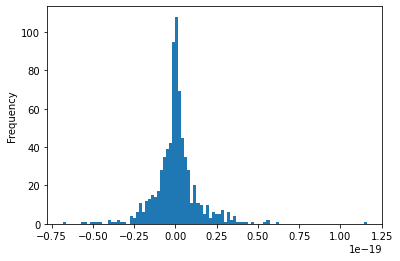

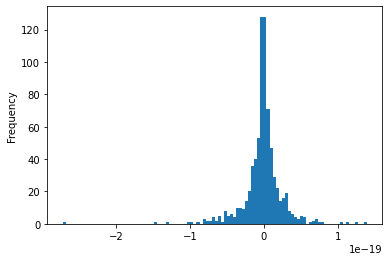

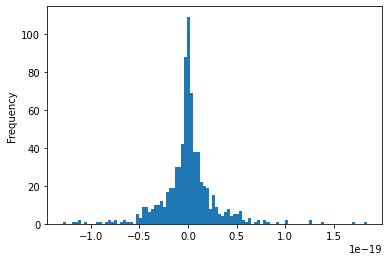

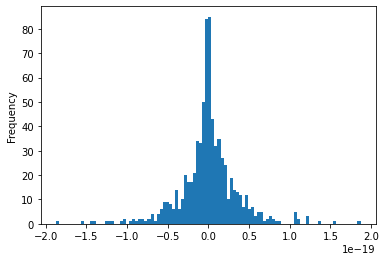

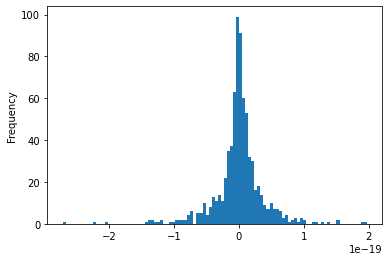

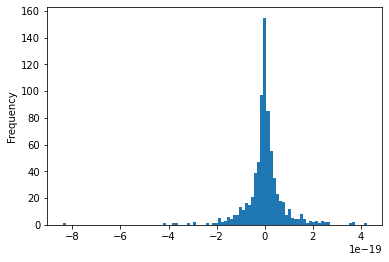

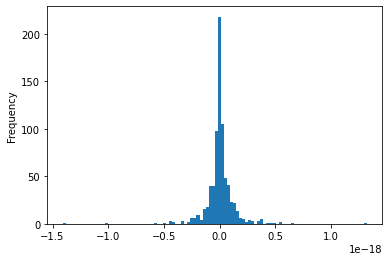

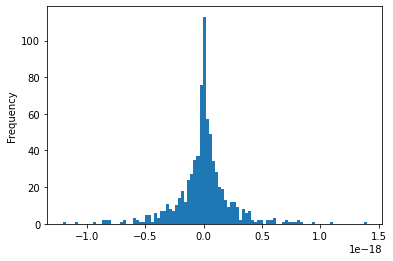

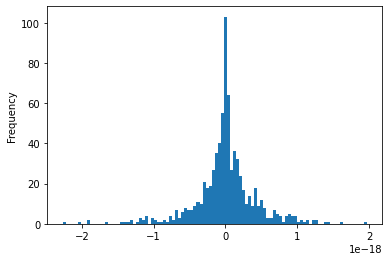

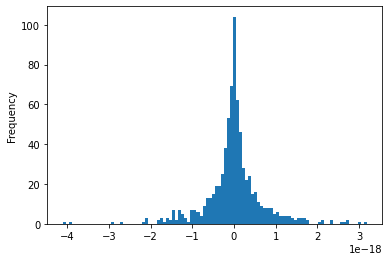

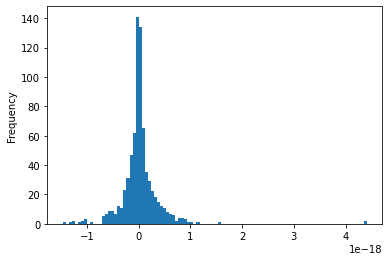

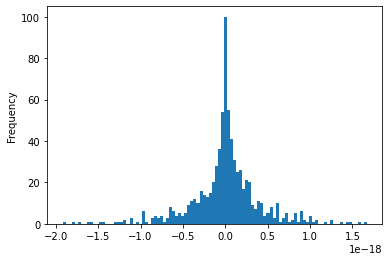

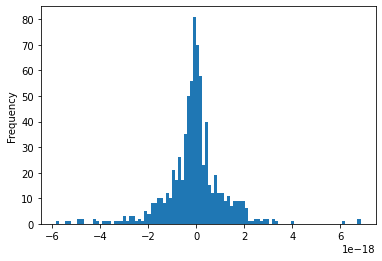

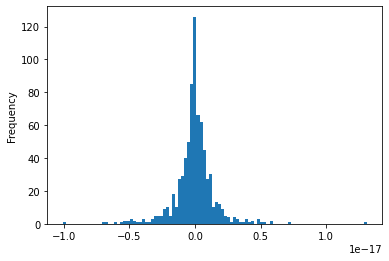

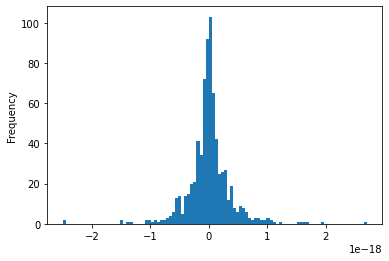

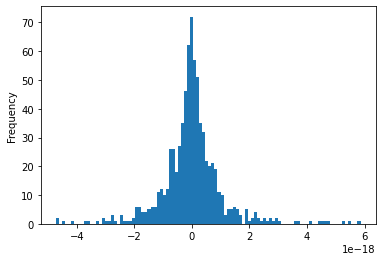

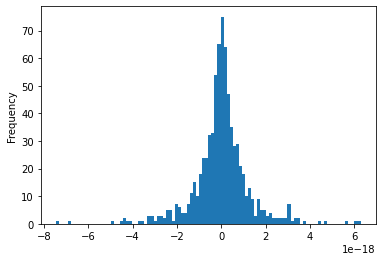

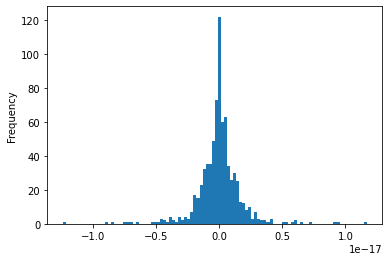

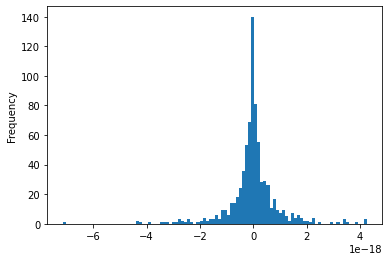

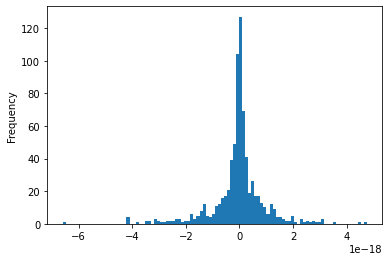

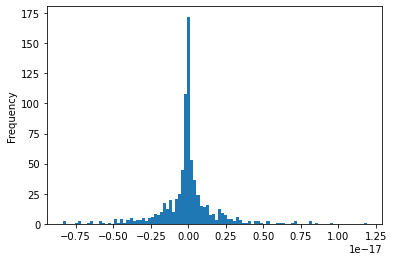

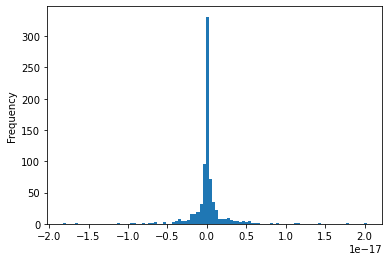

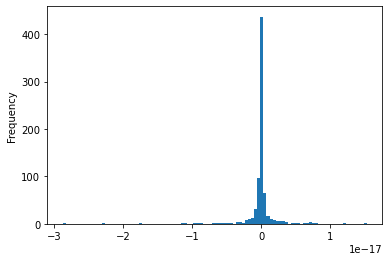

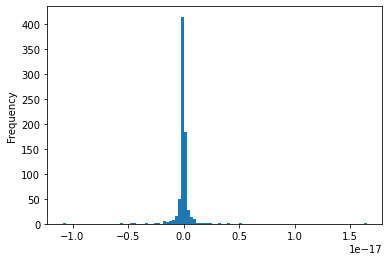

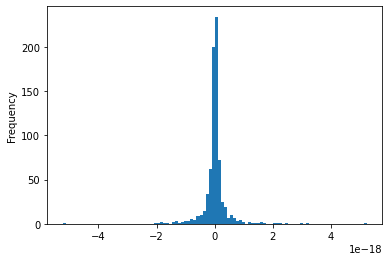

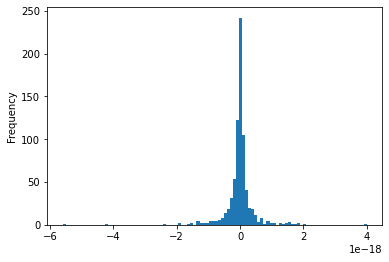

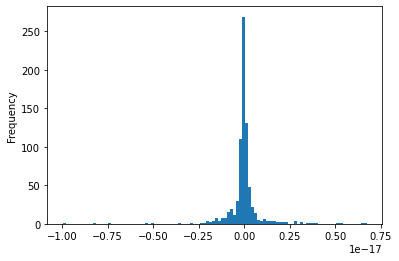

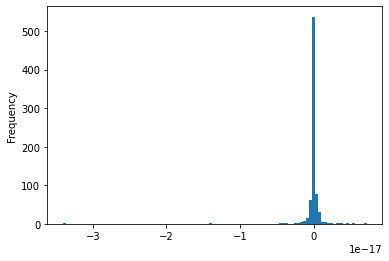

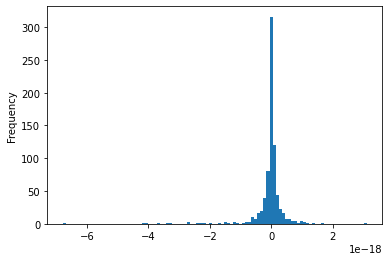

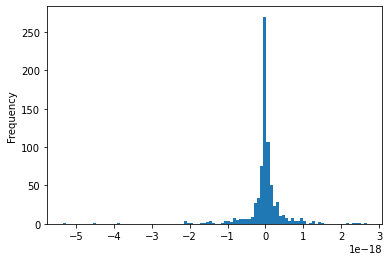

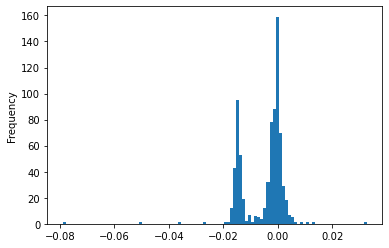

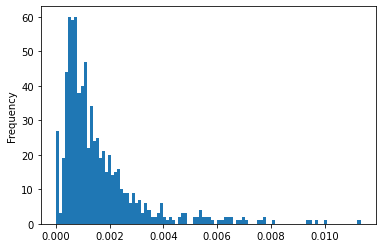

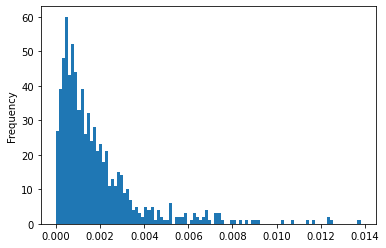

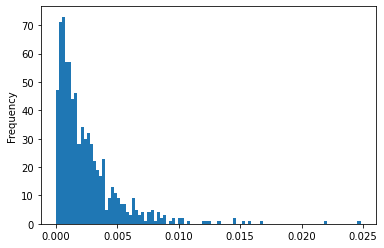

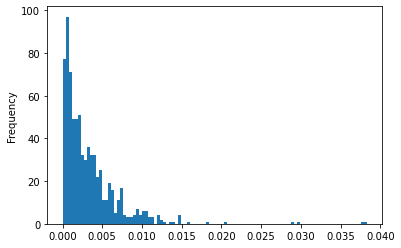

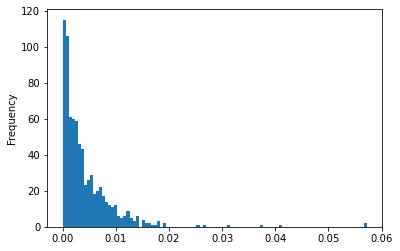

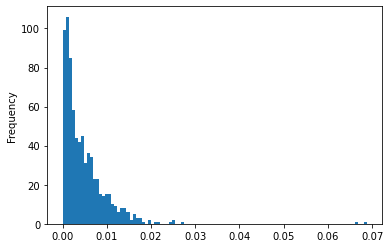

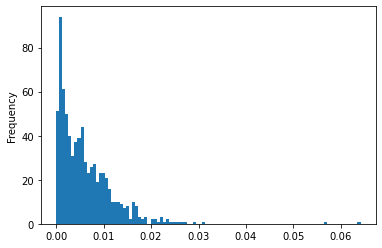

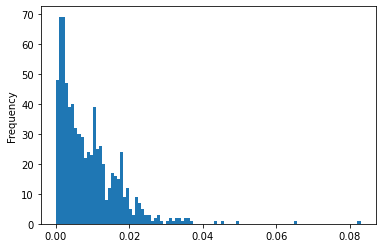

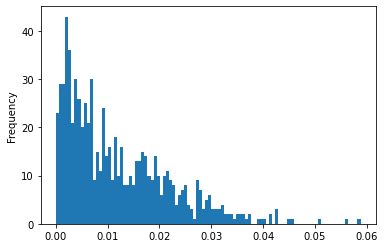

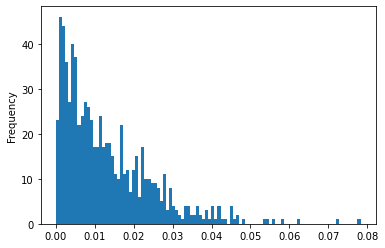

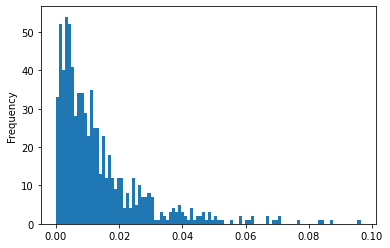

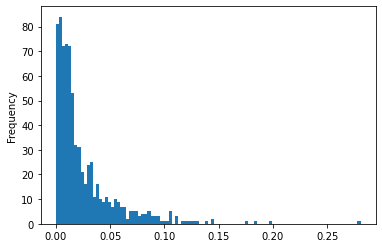

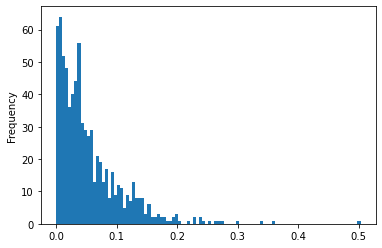

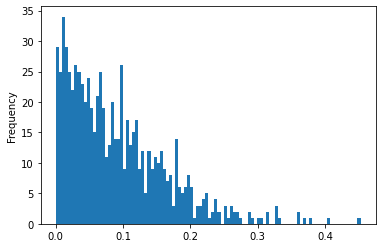

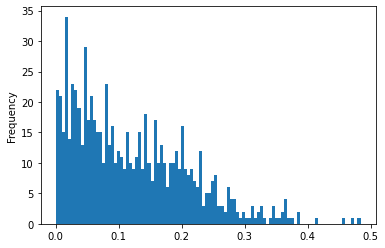

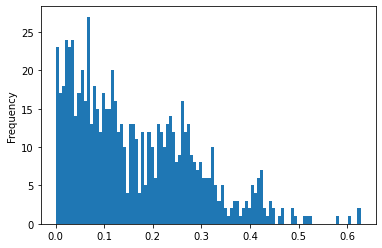

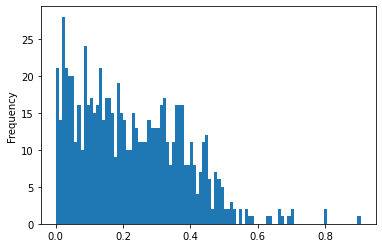

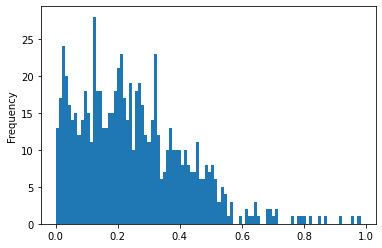

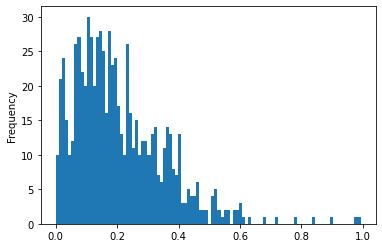

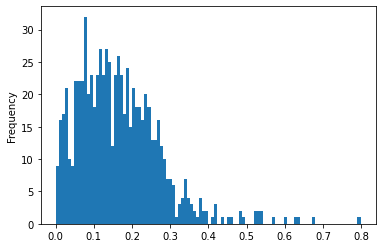

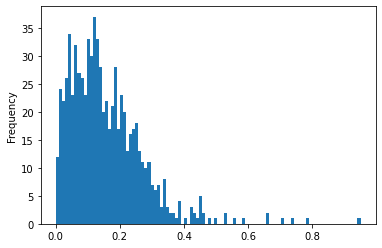

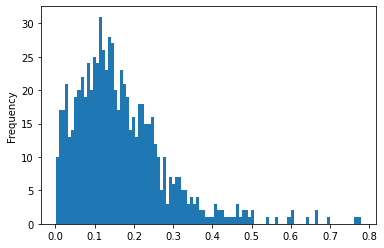

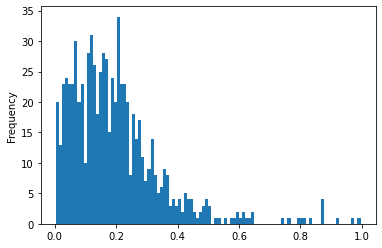

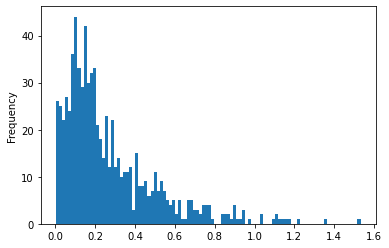

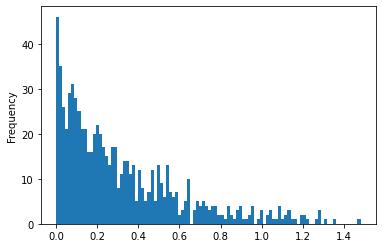

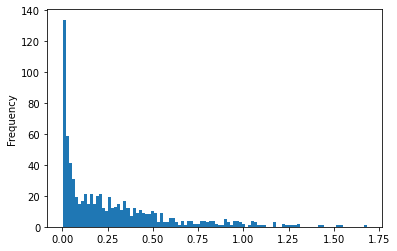

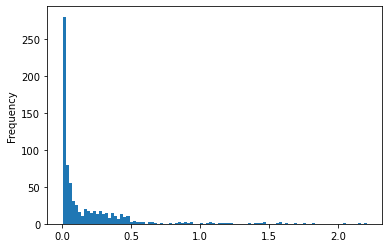

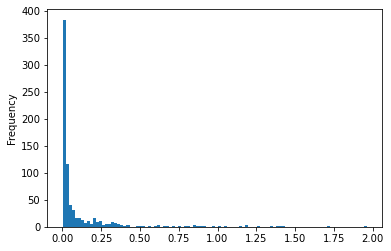

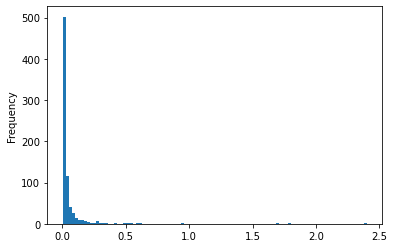

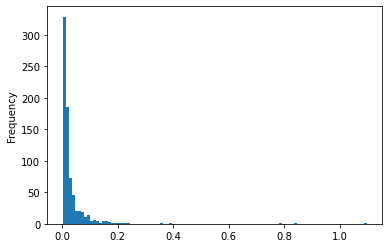

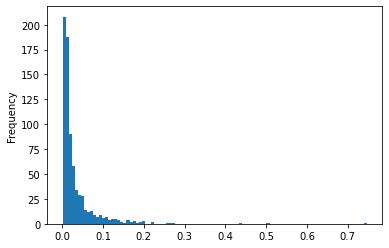

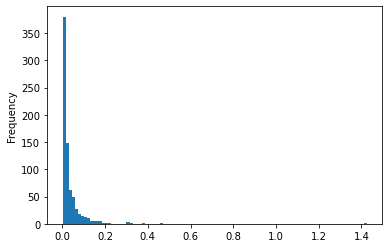

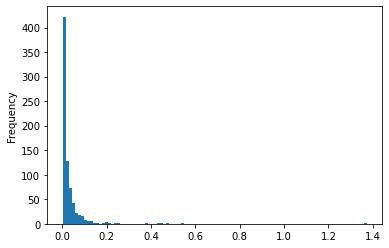

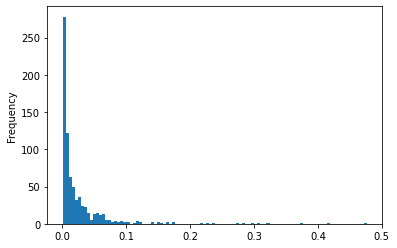

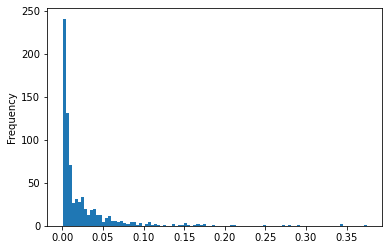

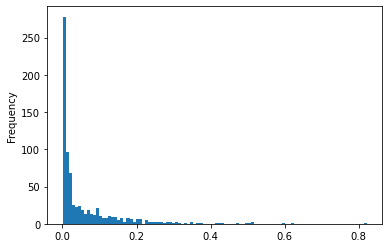

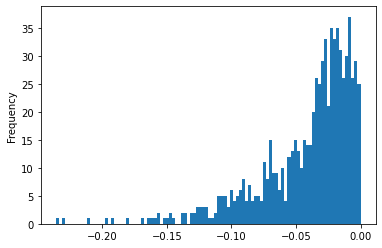

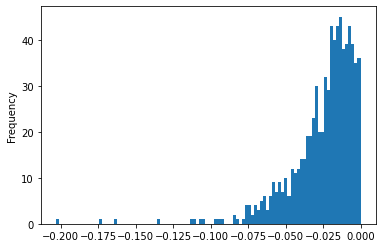

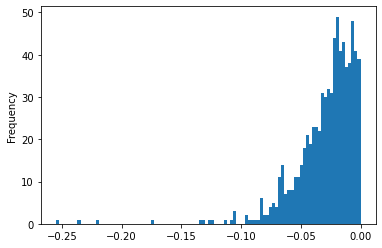

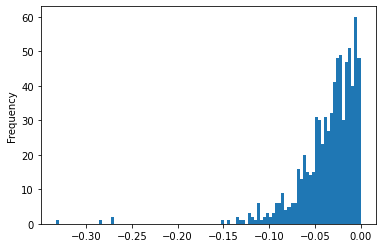

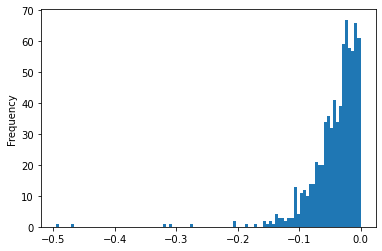

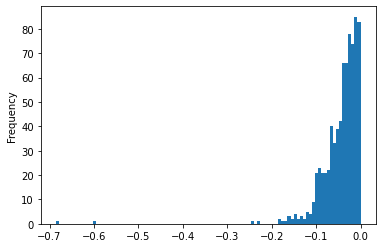

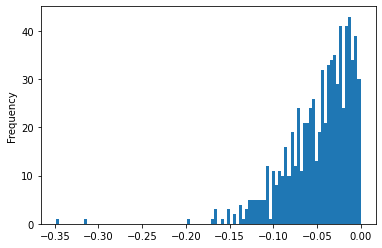

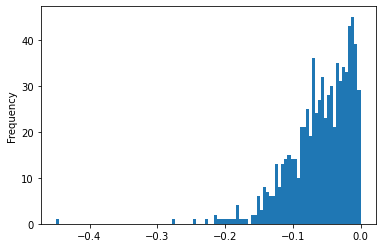

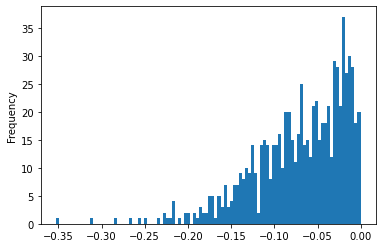

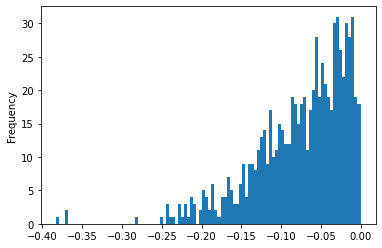

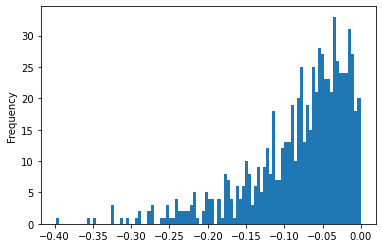

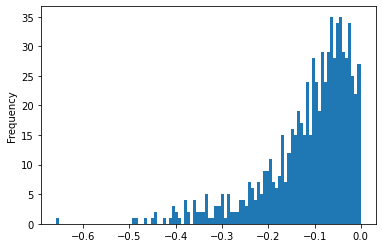

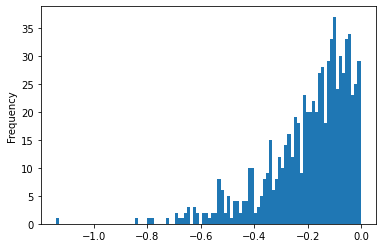

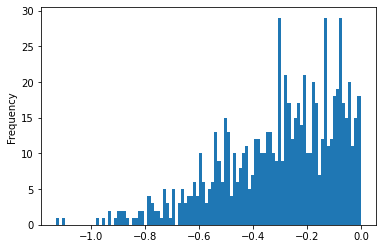

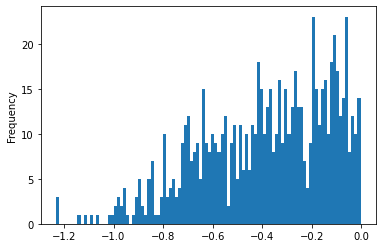

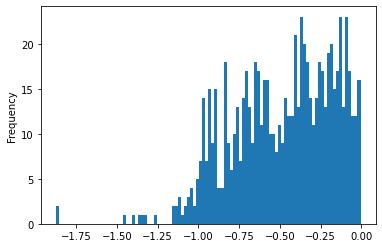

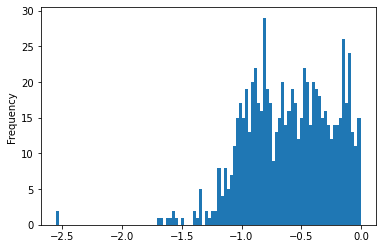

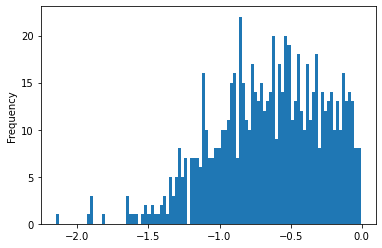

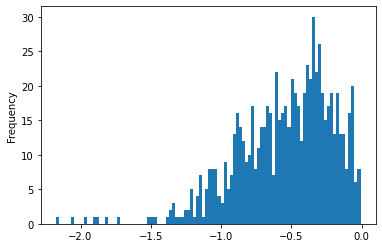

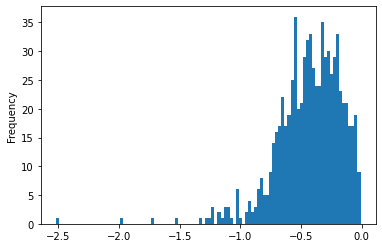

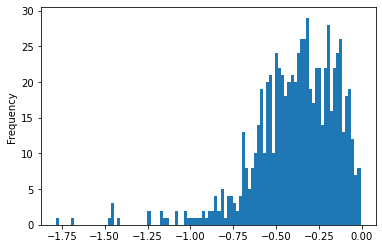

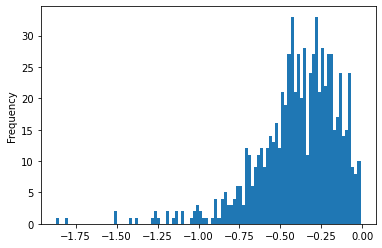

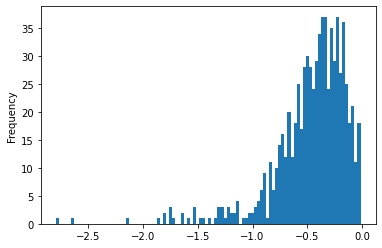

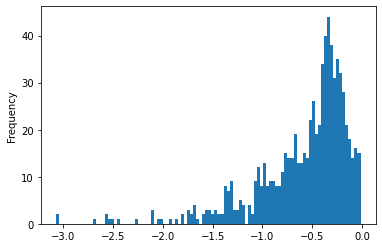

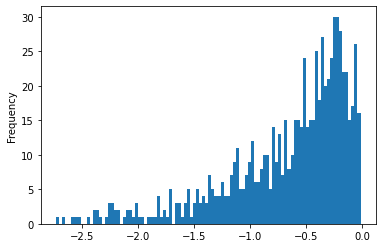

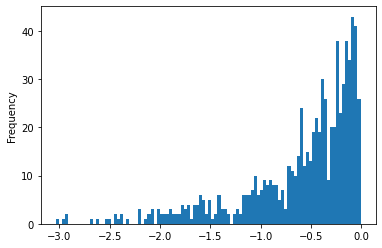

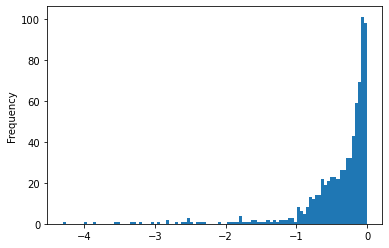

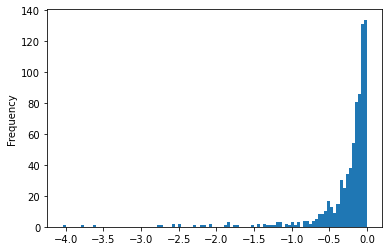

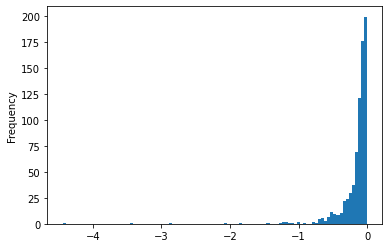

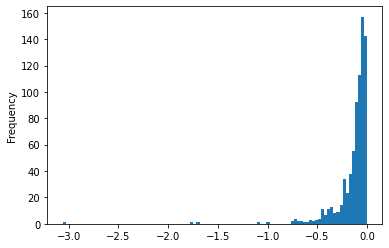

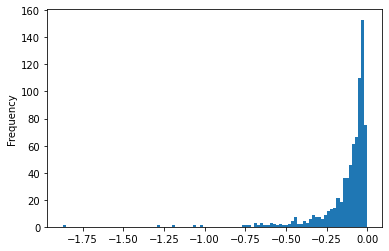

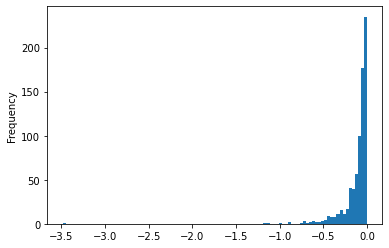

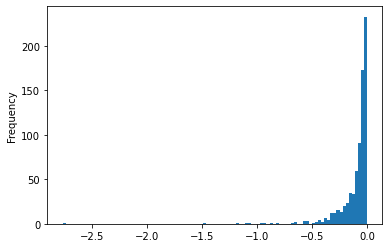

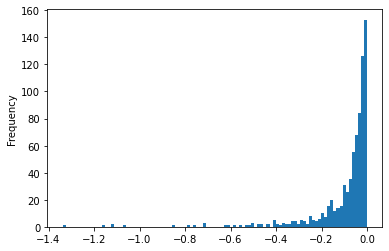

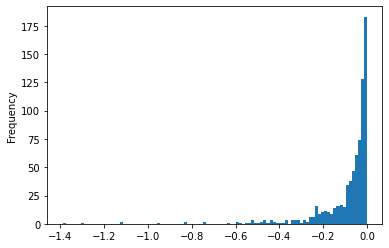

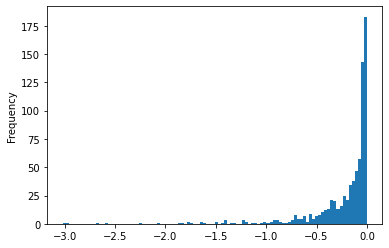

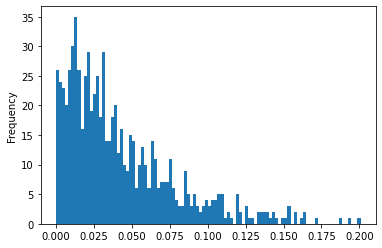

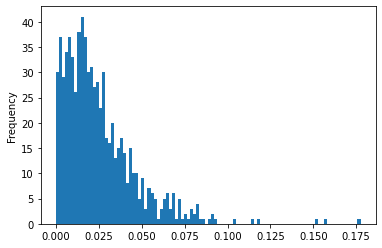

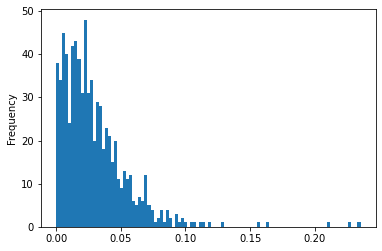

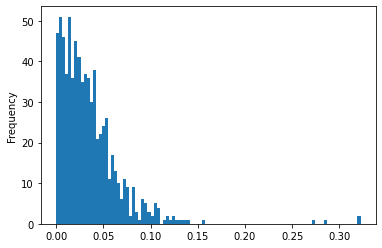

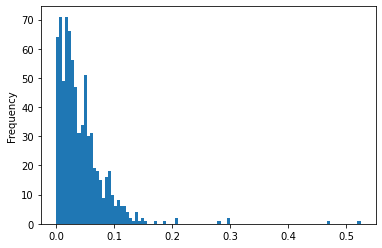

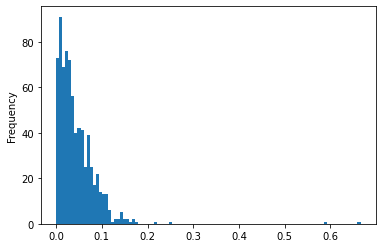

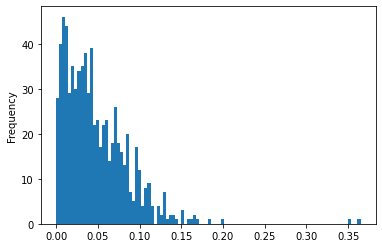

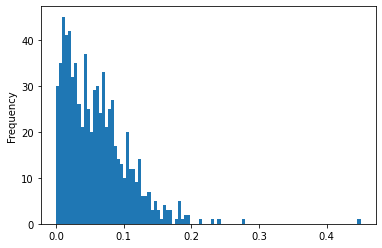

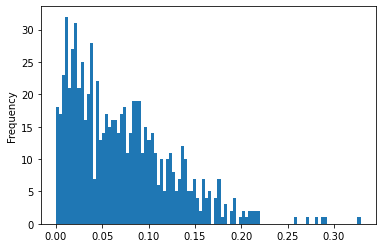

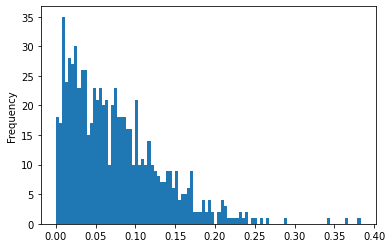

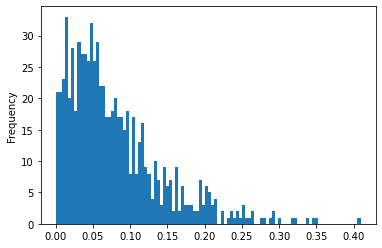

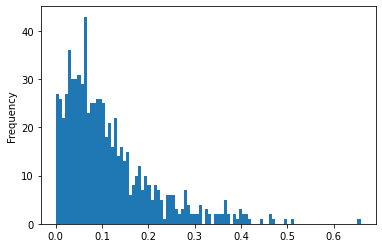

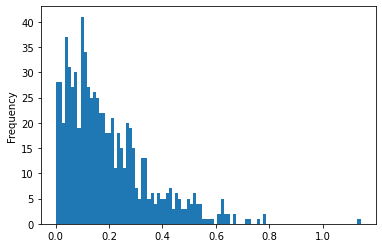

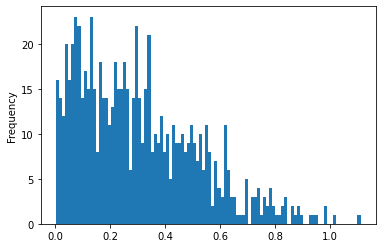

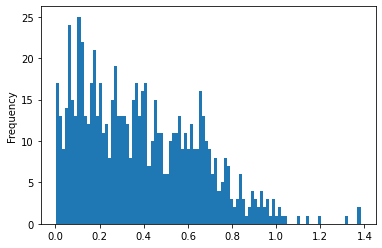

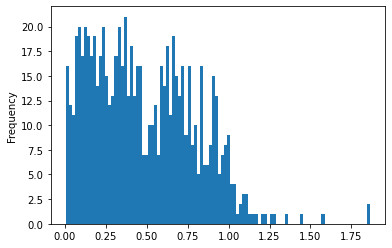

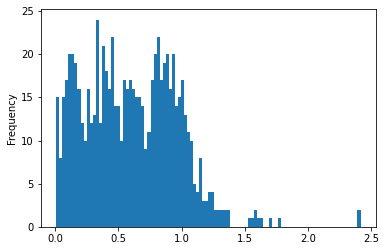

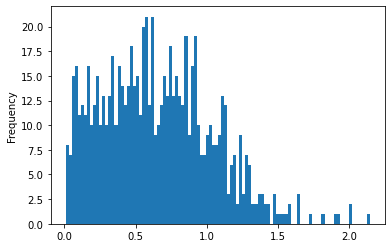

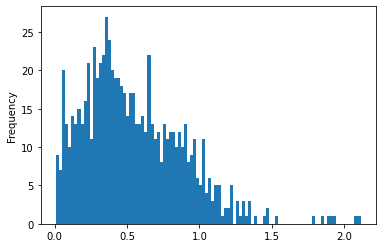

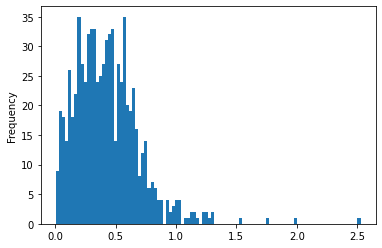

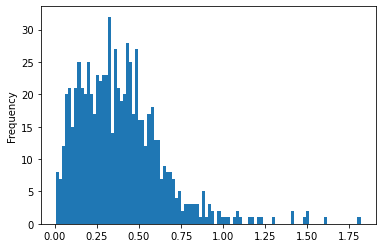

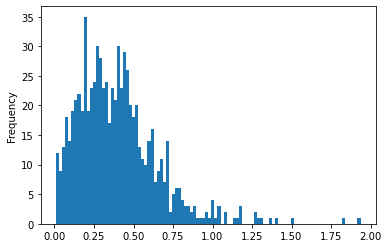

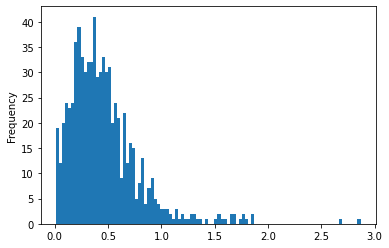

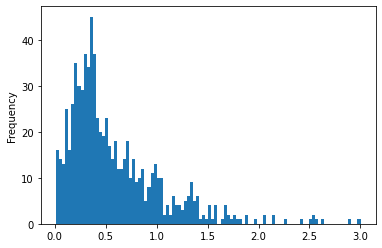

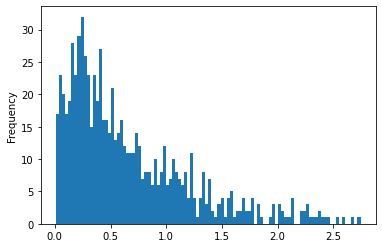

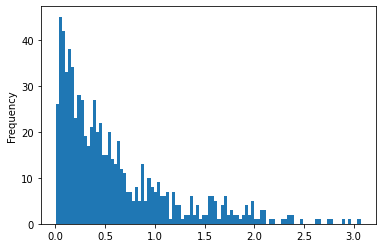

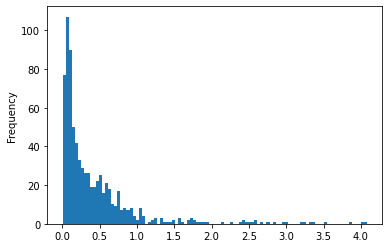

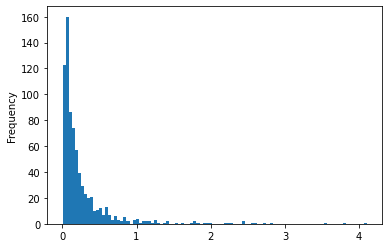

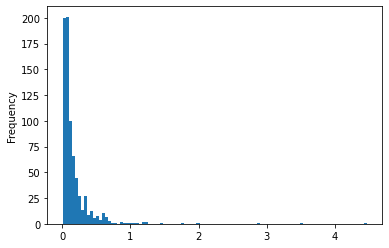

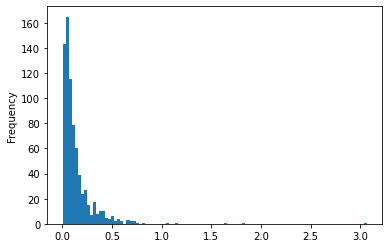

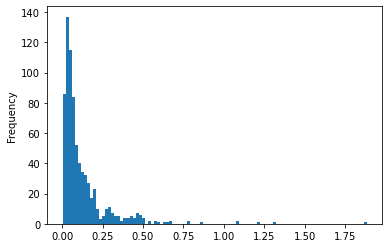

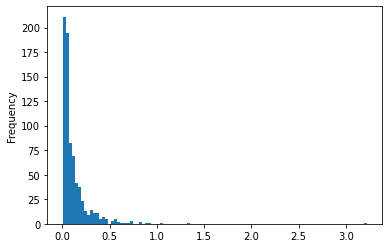

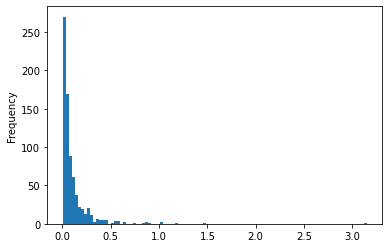

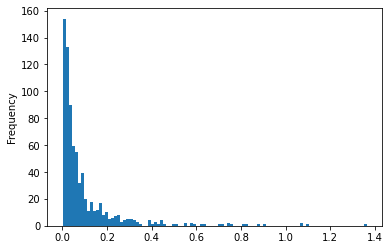

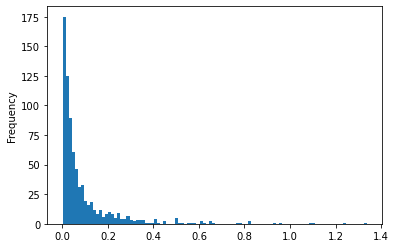

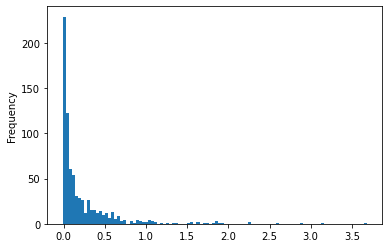

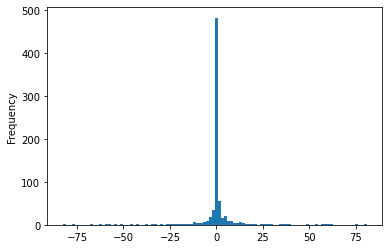

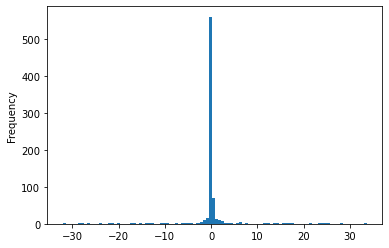

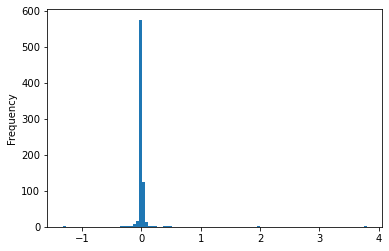

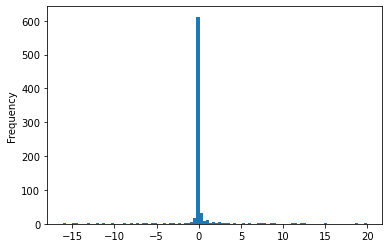

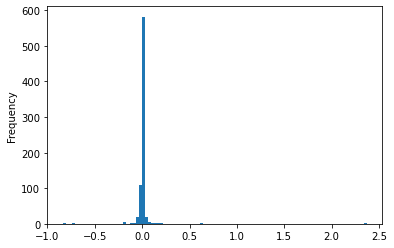

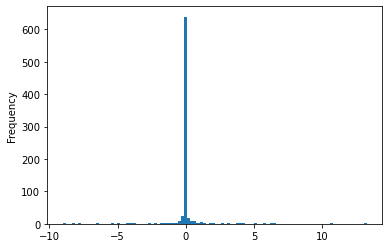

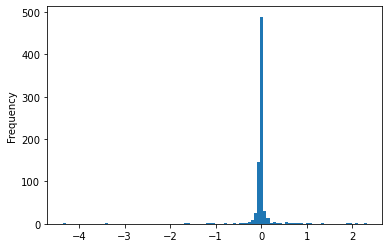

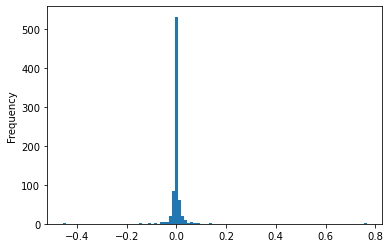

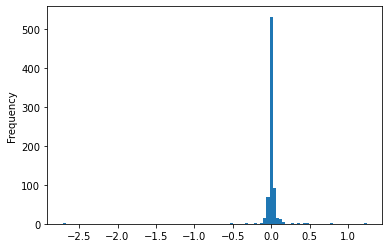

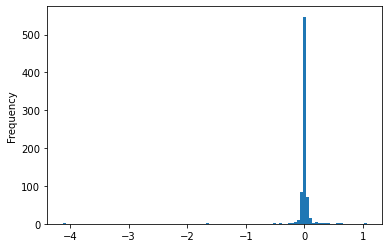

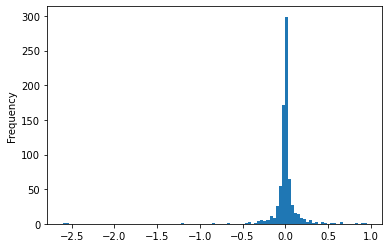

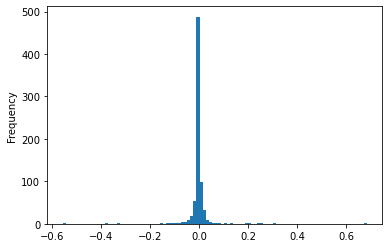

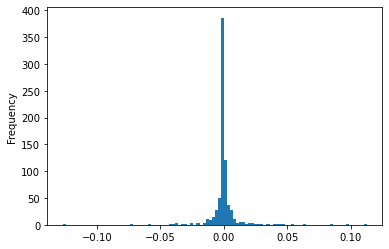

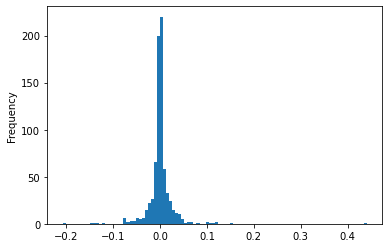

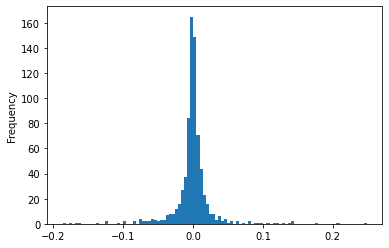

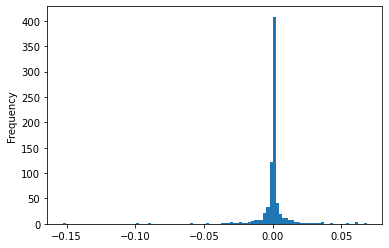

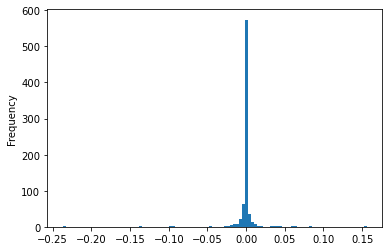

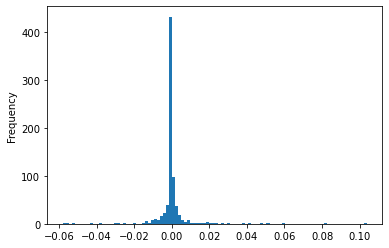

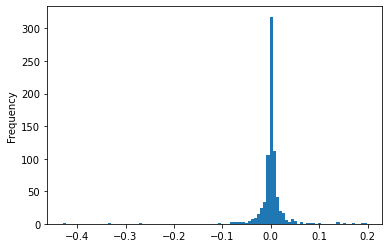

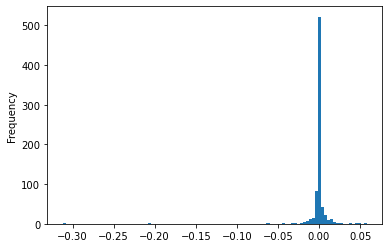

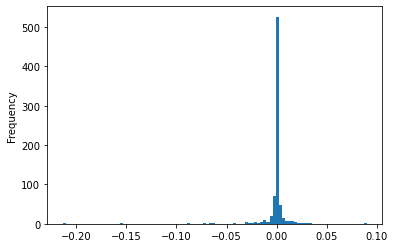

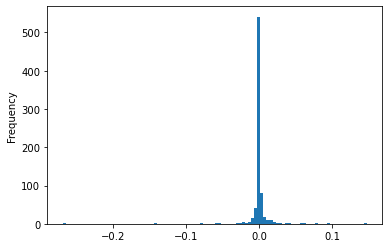

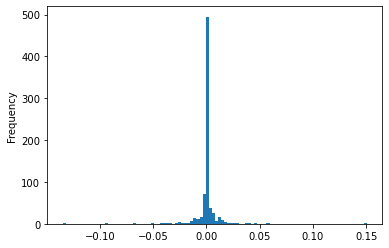

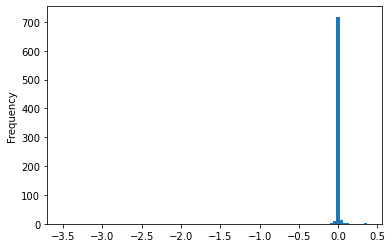

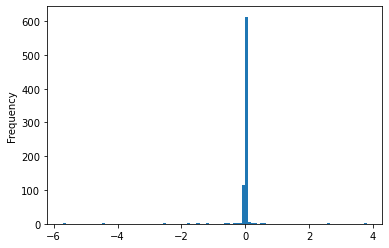

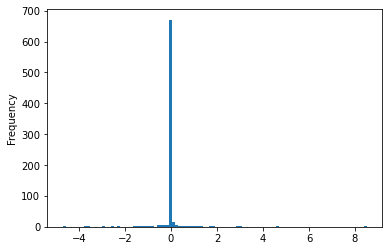

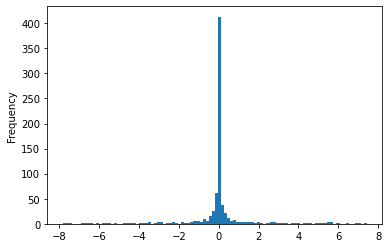

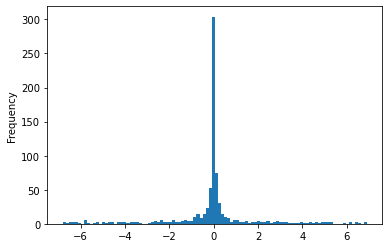

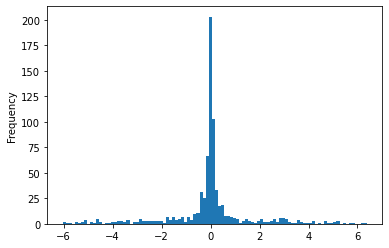

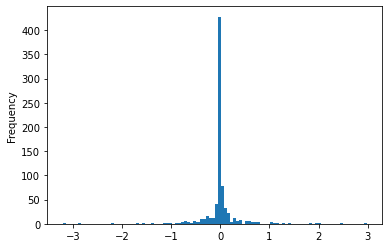

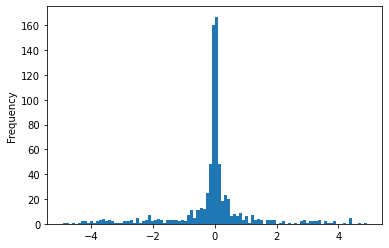

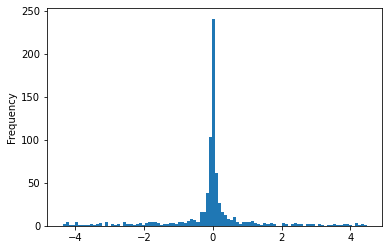

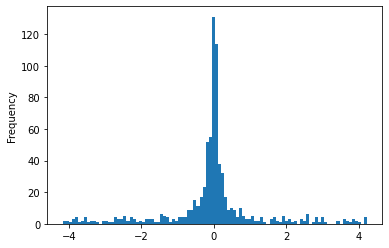

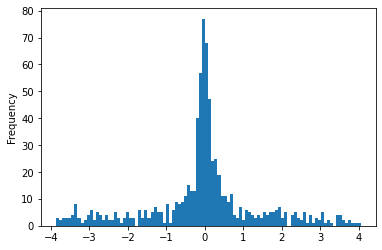

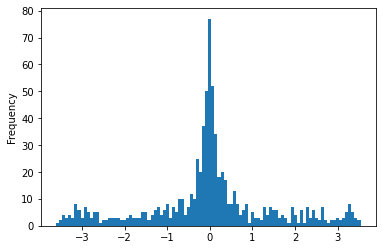

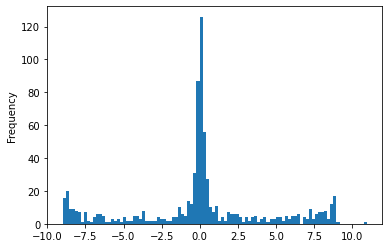

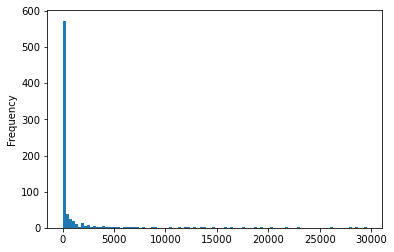

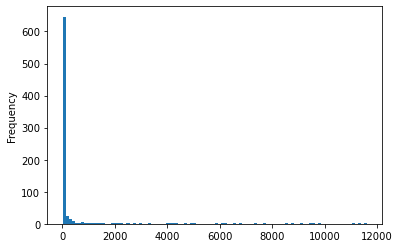

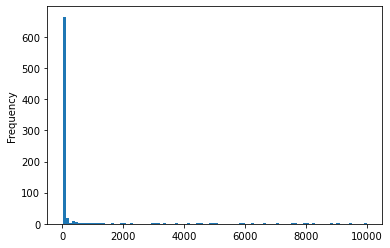

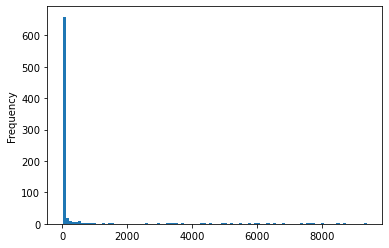

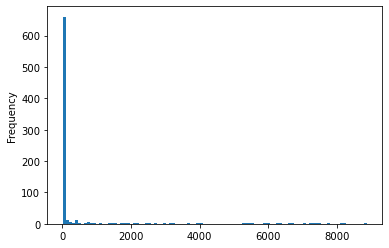

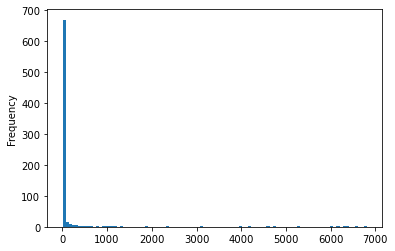

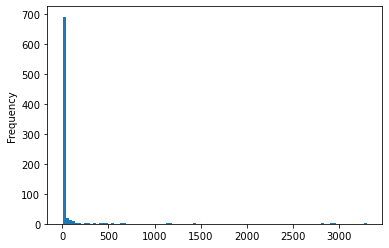

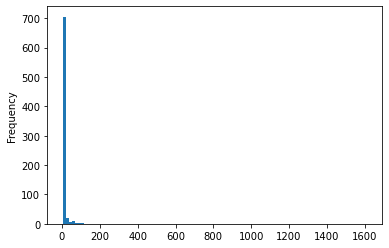

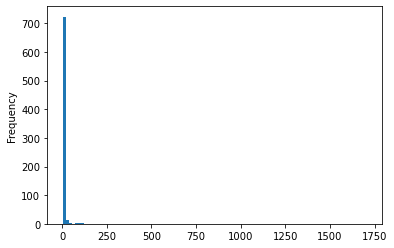

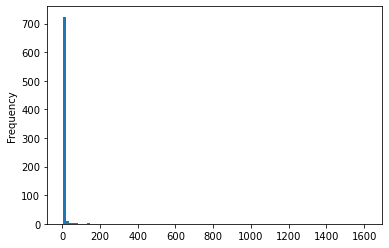

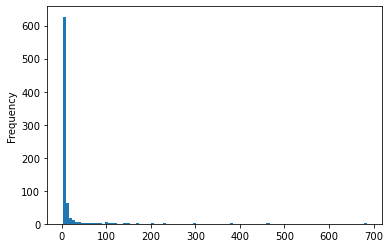

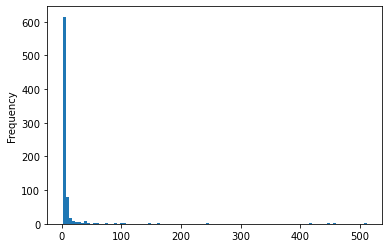

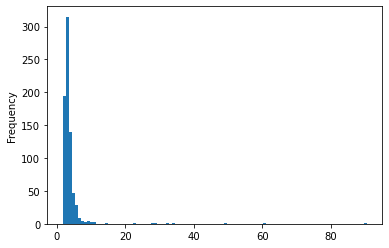

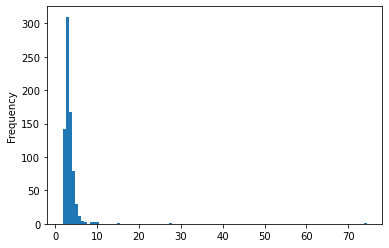

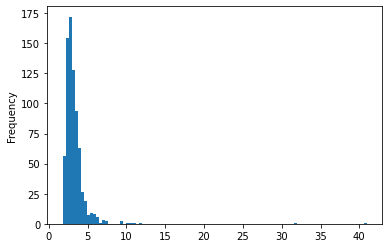

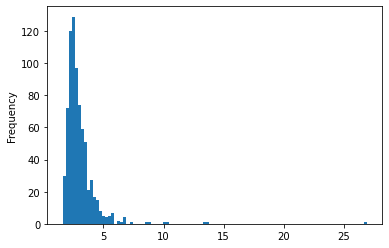

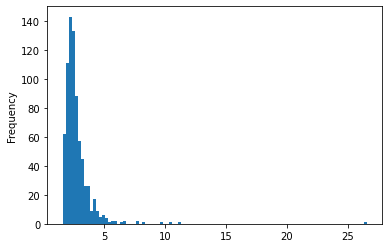

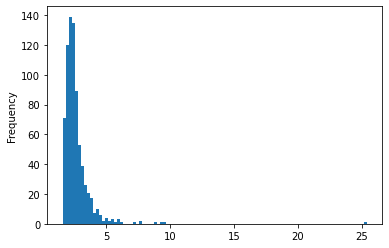

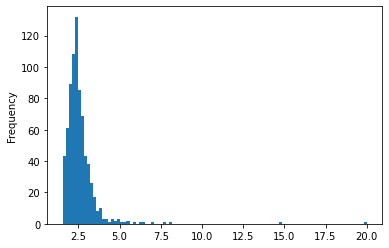

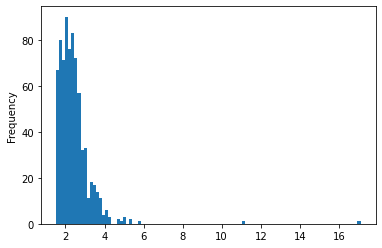

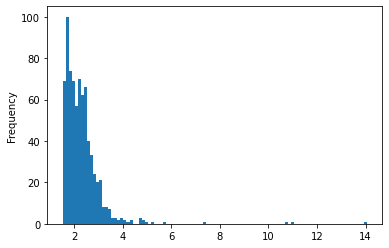

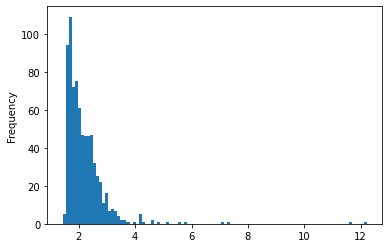

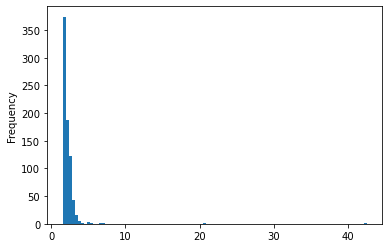

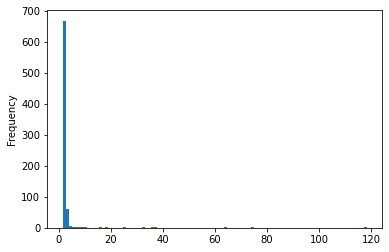

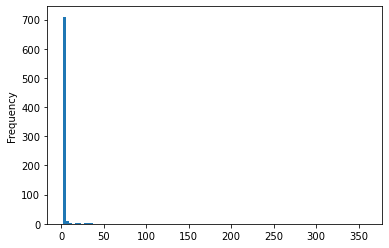

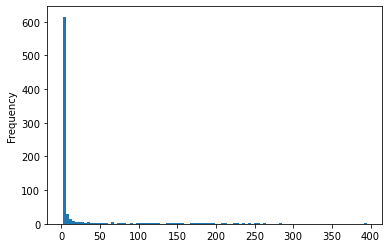

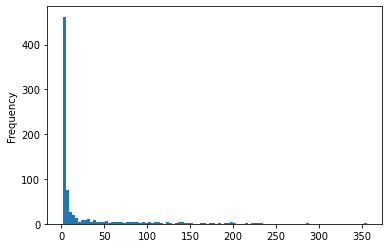

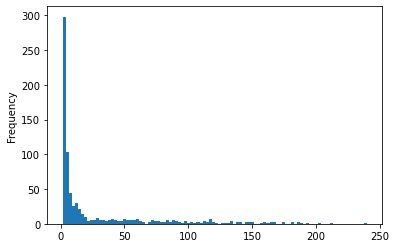

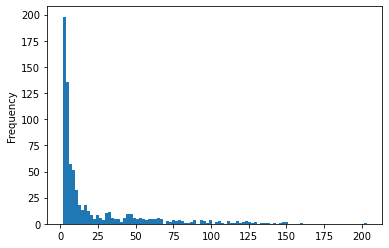

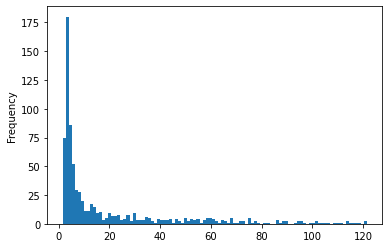

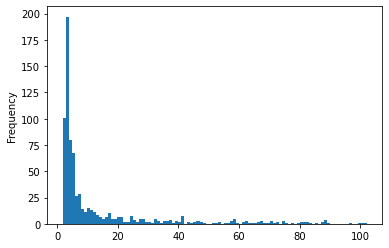

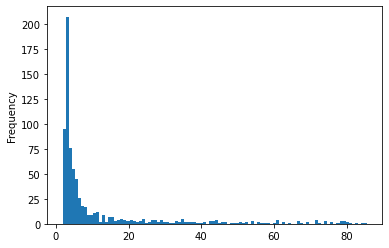

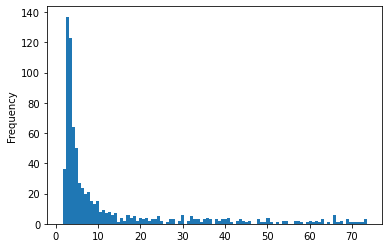

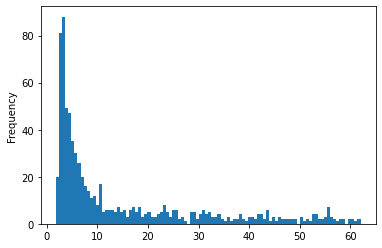

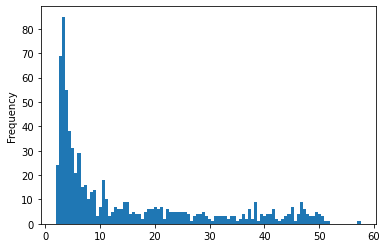

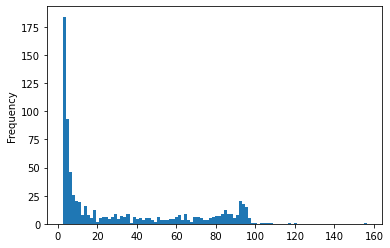

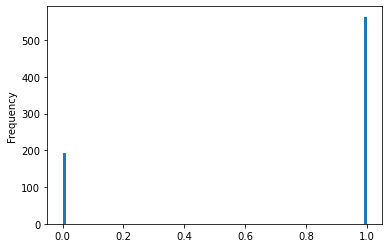

In [ ]:
for val in columns[2:len(columns)]:
    df[val].plot(xlabel = val,kind = 'hist',bins = 100)
    plt.show()

#### Maximum attributes have values sampled from gaussian/skewed gaussian

# CORELLATION OF THE FEATURES

In [10]:
cor = df.corr()
print(cor)

0                                id    gender       PPE       DFA      RPDE  \
0                                                                             
id                         1.000000 -0.133605  0.026667  0.041938 -0.084606   
gender                    -0.133605  1.000000  0.010175  0.099356  0.168321   
PPE                        0.026667  0.010175  1.000000 -0.094775 -0.405558   
DFA                        0.041938  0.099356 -0.094775  1.000000  0.155075   
RPDE                      -0.084606  0.168321 -0.405558  0.155075  1.000000   
...                             ...       ...       ...       ...       ...   
tqwt_kurtosisValue_dec_33 -0.053781  0.107618  0.045755 -0.033914 -0.097161   
tqwt_kurtosisValue_dec_34 -0.058034  0.128936  0.046175  0.043454 -0.036406   
tqwt_kurtosisValue_dec_35 -0.057807  0.107734  0.037385  0.067843 -0.018052   
tqwt_kurtosisValue_dec_36 -0.055775  0.104828  0.039588  0.116699  0.021945   
class                     -0.111661  0.182713 -0.072

In [11]:
df3 = DataFrame(cor)

In [12]:
df3.head()

0             id    gender       PPE       DFA      RPDE  numPulses  \
0                                                                     
id      1.000000 -0.133605  0.026667  0.041938 -0.084606   0.085828   
gender -0.133605  1.000000  0.010175  0.099356  0.168321  -0.478367   
PPE     0.026667  0.010175  1.000000 -0.094775 -0.405558   0.191535   
DFA     0.041938  0.099356 -0.094775  1.000000  0.155075  -0.286791   
RPDE   -0.084606  0.168321 -0.405558  0.155075  1.000000  -0.521193   

0       numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  \
0                                                                              
id              0.085226         -0.100831           -0.060464     -0.052865   
gender         -0.477710          0.460422           -0.110587      0.112004   
PPE             0.194098         -0.201907           -0.423660     -0.349053   
DFA            -0.286611          0.253708            0.084655      0.212120   
RPDE           -0.524839          0.506707            0.333545      0.614340   

0       ...  tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0       ...                                                         
id      ...                   0.036897                   0.016047   
gender  ...                  -0.098689                   0.000210   
PPE     ...                   0.144261                   0.135544   
DFA     ...                  -0.146325                  -0.104456   
RPDE    ...                  -0.315592                  -0.278504   

0       tqwt_kurtosisValue_dec_30  tqwt_kurtosisValue_dec_31  \
0                                                              
id                      -0.023317                  -0.045943   
gender                   0.066091                   0.083499   
PPE                      0.091726                   0.065035   
DFA                     -0.061129                  -0.063451   
RPDE                    -0.148989                  -0.101467   

0       tqwt_kurtosisValue_dec_32  tqwt_kurtosisValue_dec_33  \
0                                                              
id                      -0.041835                  -0.053781   
gender                   0.089793                   0.107618   
PPE                      0.044163                   0.045755   
DFA                     -0.061845                  -0.033914   
RPDE                    -0.098923                  -0.097161   

0       tqwt_kurtosisValue_dec_34  tqwt_kurtosisValue_dec_35  \
0                                                              
id                      -0.058034                  -0.057807   
gender                   0.128936                   0.107734   
PPE                      0.046175                   0.037385   
DFA                      0.043454                   0.067843   
RPDE                    -0.036406                  -0.018052   

0       tqwt_kurtosisValue_dec_36     class  
0                                            
id                      -0.055775 -0.111661  
gender                   0.104828  0.182713  
PPE                      0.039588 -0.072939  
DFA                      0.116699  0.306070  
RPDE                     0.021945  0.247444  

[5 rows x 755 columns]

In [ ]:
df3.to_csv('attribute_correlation.csv',index = True)

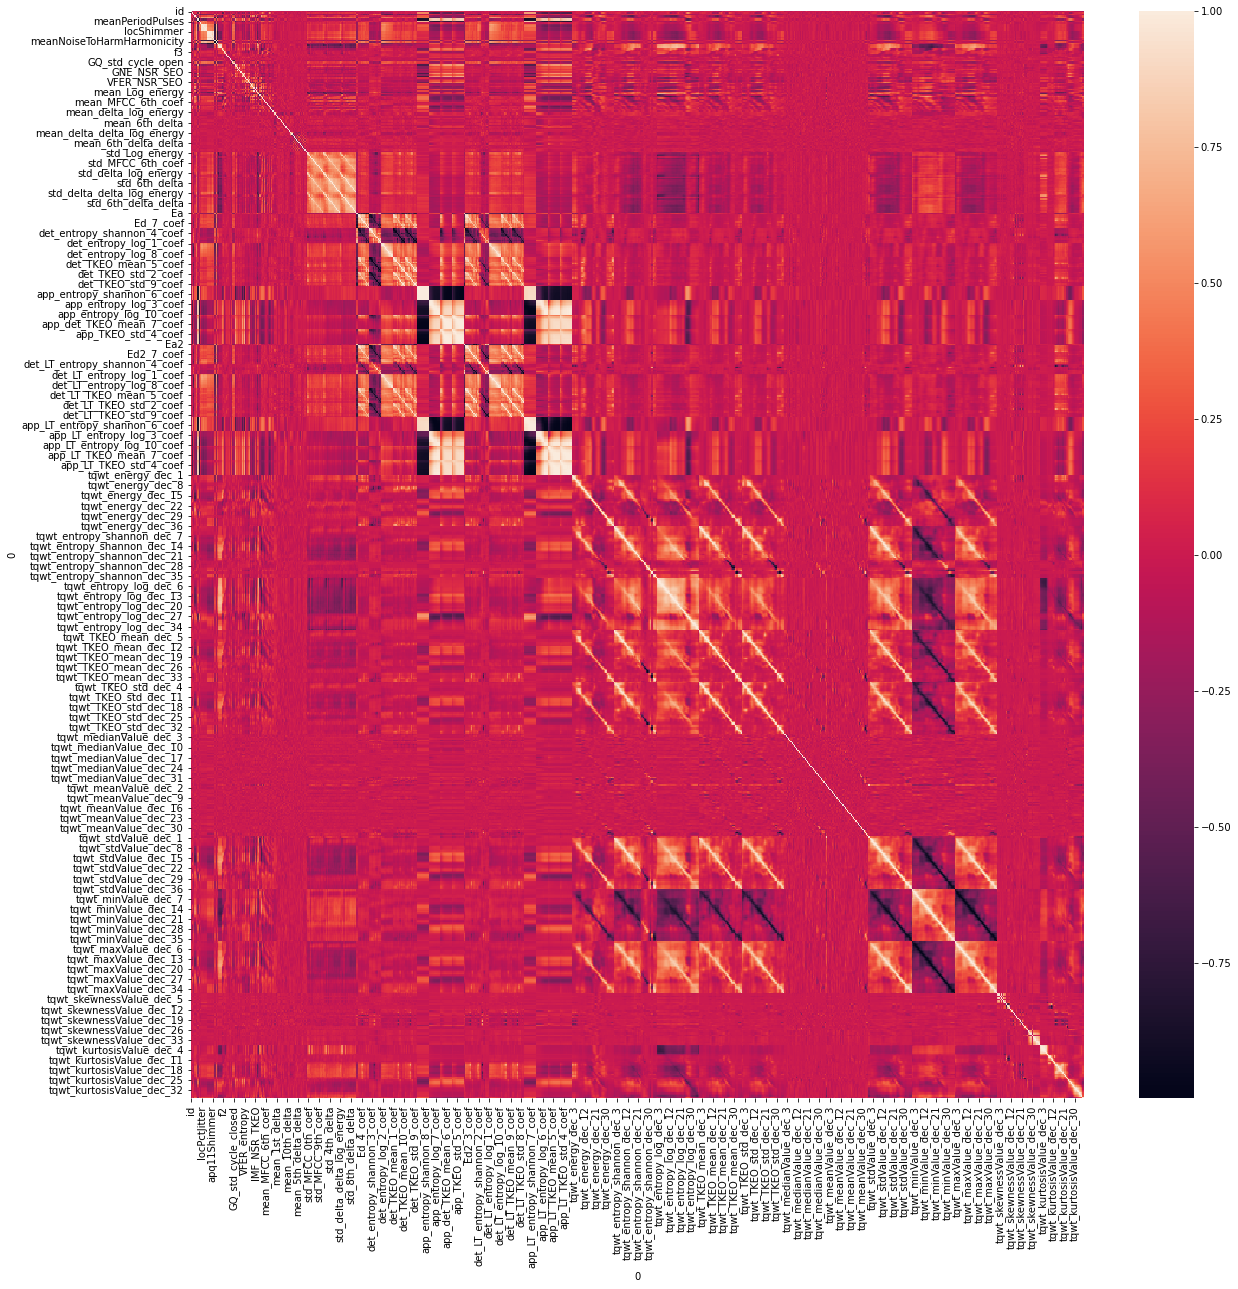

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(data = cor)
plt.show()

#### Above csv has the correlation between all attributes

# DATA CLEANING PROCESS

In [13]:
df = read_csv("pd_speech_features.csv")
df.columns = df.iloc[0]
df = df[1:]

In [14]:
df.head()

0 id gender      PPE      DFA     RPDE numPulses numPeriodsPulses  \
1  0      1  0.85247  0.71826  0.57227       240              239   
2  0      1  0.76686  0.69481  0.53966       234              233   
3  0      1  0.85083  0.67604  0.58982       232              231   
4  1      0  0.41121  0.79672  0.59257       178              177   
5  1      0   0.3279  0.79782  0.53028       236              235   

0 meanPeriodPulses stdDevPeriodPulses locPctJitter  ...  \
1       0.00806353           8.68E-05      0.00218  ...   
2      0.008258256           7.31E-05      0.00195  ...   
3       0.00833959           6.04E-05      0.00176  ...   
4      0.010857733        0.000182739      0.00419  ...   
5      0.008161574        0.002668863      0.00535  ...   

0 tqwt_kurtosisValue_dec_28 tqwt_kurtosisValue_dec_29  \
1                     1.562                    2.6445   
2                    1.5589                    3.6107   
3                    1.5643                    2.3308   
4                    3.7805                    3.5664   
5                    6.1727                    5.8416   

0 tqwt_kurtosisValue_dec_30 tqwt_kurtosisValue_dec_31  \
1                    3.8686                    4.2105   
2                   23.5155                   14.1962   
3                    9.4959                   10.7458   
4                    5.2558                   14.0403   
5                    6.0805                    5.7621   

0 tqwt_kurtosisValue_dec_32 tqwt_kurtosisValue_dec_33  \
1                    5.1221                    4.4625   
2                   11.0261                    9.5082   
3                   11.0177                    4.8066   
4                    4.2235                    4.6857   
5                    7.7817                   11.6891   

0 tqwt_kurtosisValue_dec_34 tqwt_kurtosisValue_dec_35  \
1                    2.6202                    3.0004   
2                    6.5245                    6.3431   
3                    2.9199                    3.1495   
4                     4.846                     6.265   
5                    8.2103                    5.0559   

0 tqwt_kurtosisValue_dec_36 class  
1                   18.9405     1  
2                    45.178     1  
3                    4.7666     1  
4                    4.0603     1  
5                    6.1164     1  

[5 rows x 755 columns]

In [ ]:
null_values = df[df.isna().any(axis=1)]

In [ ]:
null_values

Empty DataFrame
Columns: [id, gender, PPE, DFA, RPDE, numPulses, numPeriodsPulses, meanPeriodPulses, stdDevPeriodPulses, locPctJitter, locAbsJitter, rapJitter, ppq5Jitter, ddpJitter, locShimmer, locDbShimmer, apq3Shimmer, apq5Shimmer, apq11Shimmer, ddaShimmer, meanAutoCorrHarmonicity, meanNoiseToHarmHarmonicity, meanHarmToNoiseHarmonicity, minIntensity, maxIntensity, meanIntensity, f1, f2, f3, f4, b1, b2, b3, b4, GQ_prc5_95, GQ_std_cycle_open, GQ_std_cycle_closed, GNE_mean, GNE_std, GNE_SNR_TKEO, GNE_SNR_SEO, GNE_NSR_TKEO, GNE_NSR_SEO, VFER_mean, VFER_std, VFER_entropy, VFER_SNR_TKEO, VFER_SNR_SEO, VFER_NSR_TKEO, VFER_NSR_SEO, IMF_SNR_SEO, IMF_SNR_TKEO, IMF_SNR_entropy, IMF_NSR_SEO, IMF_NSR_TKEO, IMF_NSR_entropy, mean_Log_energy, mean_MFCC_0th_coef, mean_MFCC_1st_coef, mean_MFCC_2nd_coef, mean_MFCC_3rd_coef, mean_MFCC_4th_coef, mean_MFCC_5th_coef, mean_MFCC_6th_coef, mean_MFCC_7th_coef, mean_MFCC_8th_coef, mean_MFCC_9th_coef, mean_MFCC_10th_coef, mean_MFCC_11th_coef, mean_MFCC_12th_coef, mean_delta_log_energy, mean_0th_delta, mean_1st_delta, mean_2nd_delta, mean_3rd_delta, mean_4th_delta, mean_5th_delta, mean_6th_delta, mean_7th_delta, mean_8th_delta, mean_9th_delta, mean_10th_delta, mean_11th_delta, mean_12th_delta, mean_delta_delta_log_energy, mean_delta_delta_0th, mean_1st_delta_delta, mean_2nd_delta_delta, mean_3rd_delta_delta, mean_4th_delta_delta, mean_5th_delta_delta, mean_6th_delta_delta, mean_7th_delta_delta, mean_8th_delta_delta, mean_9th_delta_delta, mean_10th_delta_delta, mean_11th_delta_delta, mean_12th_delta_delta, std_Log_energy, std_MFCC_0th_coef, ...]
Index: []

[0 rows x 755 columns]

#### No Null Values

In [ ]:
var = 0
l = list()
for value in columns:
    arr = list(df[value])
    for i in range(len(arr)):
        if str(arr[i]) in st.punctuation:
                list.append([i,var])
        else:
            pass
    var+=1
    
if len(l) == 0:
    print("No missing values")
else:
    print(l)

No missing values


#### No Missing Values

In [15]:
columns = list(df.columns)
df[columns] = df[columns].apply(to_numeric)
print(df.dtypes)

0
id                             int64
gender                         int64
PPE                          float64
DFA                          float64
RPDE                         float64
                              ...   
tqwt_kurtosisValue_dec_33    float64
tqwt_kurtosisValue_dec_34    float64
tqwt_kurtosisValue_dec_35    float64
tqwt_kurtosisValue_dec_36    float64
class                          int64
Length: 755, dtype: object


In [ ]:
0 in df.values

True

In [ ]:
(df == 0).astype(int).sum()
    

0
id                             3
gender                       366
PPE                            0
DFA                            0
RPDE                           0
                            ... 
tqwt_kurtosisValue_dec_33      0
tqwt_kurtosisValue_dec_34      0
tqwt_kurtosisValue_dec_35      0
tqwt_kurtosisValue_dec_36      0
class                        192
Length: 755, dtype: int64

# Dropping columns with low variance

In [ ]:
df.std()<1.0

0
id                           False
gender                        True
PPE                           True
DFA                           True
RPDE                          True
                             ...  
tqwt_kurtosisValue_dec_33    False
tqwt_kurtosisValue_dec_34    False
tqwt_kurtosisValue_dec_35    False
tqwt_kurtosisValue_dec_36    False
class                         True
Length: 755, dtype: bool

In [16]:
columns = df.columns.tolist()
print(columns)

['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses', 'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter', 'locAbsJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter', 'locShimmer', 'locDbShimmer', 'apq3Shimmer', 'apq5Shimmer', 'apq11Shimmer', 'ddaShimmer', 'meanAutoCorrHarmonicity', 'meanNoiseToHarmHarmonicity', 'meanHarmToNoiseHarmonicity', 'minIntensity', 'maxIntensity', 'meanIntensity', 'f1', 'f2', 'f3', 'f4', 'b1', 'b2', 'b3', 'b4', 'GQ_prc5_95', 'GQ_std_cycle_open', 'GQ_std_cycle_closed', 'GNE_mean', 'GNE_std', 'GNE_SNR_TKEO', 'GNE_SNR_SEO', 'GNE_NSR_TKEO', 'GNE_NSR_SEO', 'VFER_mean', 'VFER_std', 'VFER_entropy', 'VFER_SNR_TKEO', 'VFER_SNR_SEO', 'VFER_NSR_TKEO', 'VFER_NSR_SEO', 'IMF_SNR_SEO', 'IMF_SNR_TKEO', 'IMF_SNR_entropy', 'IMF_NSR_SEO', 'IMF_NSR_TKEO', 'IMF_NSR_entropy', 'mean_Log_energy', 'mean_MFCC_0th_coef', 'mean_MFCC_1st_coef', 'mean_MFCC_2nd_coef', 'mean_MFCC_3rd_coef', 'mean_MFCC_4th_coef', 'mean_MFCC_5th_coef', 'mean_MFCC_6th_coef', 'mean_MFCC_7th_co

In [17]:
for val in columns[:-1]:
    if float(df[val].std())<1.0:
        df.drop(val,axis = 1,inplace = True)
        print(df.shape)
    else:
        pass

(756, 754)
(756, 753)
(756, 752)
(756, 751)
(756, 750)
(756, 749)
(756, 748)
(756, 747)
(756, 746)
(756, 745)
(756, 744)
(756, 743)
(756, 742)
(756, 741)
(756, 740)
(756, 739)
(756, 738)
(756, 737)
(756, 736)
(756, 735)
(756, 734)
(756, 733)
(756, 732)
(756, 731)
(756, 730)
(756, 729)
(756, 728)
(756, 727)
(756, 726)
(756, 725)
(756, 724)
(756, 723)
(756, 722)
(756, 721)
(756, 720)
(756, 719)
(756, 718)
(756, 717)
(756, 716)
(756, 715)
(756, 714)
(756, 713)
(756, 712)
(756, 711)
(756, 710)
(756, 709)
(756, 708)
(756, 707)
(756, 706)
(756, 705)
(756, 704)
(756, 703)
(756, 702)
(756, 701)
(756, 700)
(756, 699)
(756, 698)
(756, 697)
(756, 696)
(756, 695)
(756, 694)
(756, 693)
(756, 692)
(756, 691)
(756, 690)
(756, 689)
(756, 688)
(756, 687)
(756, 686)
(756, 685)
(756, 684)
(756, 683)
(756, 682)
(756, 681)
(756, 680)
(756, 679)
(756, 678)
(756, 677)
(756, 676)
(756, 675)
(756, 674)
(756, 673)
(756, 672)
(756, 671)
(756, 670)
(756, 669)
(756, 668)
(756, 667)
(756, 666)
(756, 665)
(756, 664)

In [18]:
df.shape

(756, 291)

In [ ]:
df.describe()

0              id   numPulses  numPeriodsPulses  meanHarmToNoiseHarmonicity  \
count  756.000000  756.000000        756.000000                  756.000000   
mean   125.500000  323.972222        322.678571                   18.859632   
std     72.793721   99.219059         99.402499                    5.576473   
min      0.000000    2.000000          1.000000                    1.655000   
25%     62.750000  251.000000        250.000000                   15.713250   
50%    125.500000  317.000000        316.000000                   19.309500   
75%    188.250000  384.250000        383.250000                   22.877750   
max    251.000000  907.000000        905.000000                   33.197000   

0      minIntensity  maxIntensity  meanIntensity           f1           f2  \
count    756.000000    756.000000     756.000000   756.000000   756.000000   
mean      70.828609     76.135371      73.997008   647.174519  1233.852088   
std        8.858268      6.446451       7.018006   134.957916   169.090402   
min       28.651529     44.133492      39.984109   237.149533   761.357661   
25%       67.248014     73.322769      70.920615   562.879119  1117.316190   
50%       74.121030     78.581351      76.855313   641.181498  1215.344125   
75%       76.850515     80.402498      78.718785   737.222678  1339.826741   
max       83.908349     86.316176      85.096353  1015.524047  1922.747225   

0               f3  ...  tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
count   756.000000  ...                 756.000000                 756.000000   
mean   2562.425251  ...                  26.237251                  22.840337   
std     393.315598  ...                  42.220693                  32.626464   
min    1411.231297  ...                   1.509800                   1.531700   
25%    2380.426103  ...                   2.408675                   3.452800   
50%    2612.204198  ...                   5.586300                   7.062750   
75%    2831.959198  ...                  28.958075                  29.830850   
max    3475.648017  ...                 239.788800                 203.311300   

0      tqwt_kurtosisValue_dec_30  tqwt_kurtosisValue_dec_31  \
count                 756.000000                 756.000000   
mean                   18.587888                  13.872018   
std                    25.537464                  20.046029   
min                     1.582900                   1.747200   
25%                     3.354825                   3.077450   
50%                     6.077400                   4.770850   
75%                    21.944050                  13.188000   
max                   121.542900                 102.207000   

0      tqwt_kurtosisValue_dec_32  tqwt_kurtosisValue_dec_33  \
count                 756.000000                 756.000000   
mean                   12.218953                  12.375335   
std                    17.783642                  16.341665   
min                     1.789500                   1.628700   
25%                     2.937025                   3.114375   
50%                     4.300450                   4.741450   
75%                    10.876150                  12.201325   
max                    85.571700                  73.532200   

0      tqwt_kurtosisValue_dec_34  tqwt_kurtosisValue_dec_35  \
count                 756.000000                 756.000000   
mean                   14.799230                  14.751559   
std                    15.722502                  14.432979   
min                     1.861700                   1.955900   
25%                     3.665925                   3.741275   
50%                     6.725700                   7.334250   
75%                    21.922050                  22.495175   
max                    62.007300                  57.544300   

0      tqwt_kurtosisValue_dec_36       class  
count                 756.000000  756.000000  
mean                   31.481110    0.746032  
std       

In [ ]:
l = [i for i in df.duplicated() if i == True]
print(l)

[True]


In [19]:
df.drop_duplicates(inplace = True)

In [20]:
df.shape

(755, 291)

In [21]:
new_corr = df.corr()

In [ ]:
new_corr

0                                 id  numPulses  numPeriodsPulses  \
0                                                                   
id                          1.000000   0.085864          0.085266   
numPulses                   0.085864   1.000000          0.999917   
numPeriodsPulses            0.085266   0.999917          1.000000   
meanHarmToNoiseHarmonicity  0.005405   0.345670          0.350398   
minIntensity                0.003027   0.143428          0.145624   
...                              ...        ...               ...   
tqwt_kurtosisValue_dec_33  -0.054707  -0.047976         -0.047866   
tqwt_kurtosisValue_dec_34  -0.059305  -0.068719         -0.068613   
tqwt_kurtosisValue_dec_35  -0.059115  -0.069702         -0.069521   
tqwt_kurtosisValue_dec_36  -0.056854  -0.062967         -0.062829   
class                      -0.110855  -0.284097         -0.284046   

0                           meanHarmToNoiseHarmonicity  minIntensity  \
0                                                                      
id                                            0.005405      0.003027   
numPulses                                     0.345670      0.143428   
numPeriodsPulses                              0.350398      0.145624   
meanHarmToNoiseHarmonicity                    1.000000      0.432999   
minIntensity                                  0.432999      1.000000   
...                                                ...           ...   
tqwt_kurtosisValue_dec_33                     0.193080      0.100203   
tqwt_kurtosisValue_dec_34                     0.113668     -0.048700   
tqwt_kurtosisValue_dec_35                     0.082512     -0.141049   
tqwt_kurtosisValue_dec_36                     0.036969     -0.321265   
class                                        -0.210974     -0.276333   

0                           maxIntensity  meanIntensity        f1        f2  \
0                                                                             
id                             -0.038780      -0.025906  0.021719  0.184373   
numPulses                       0.113214       0.126858  0.391337  0.299473   
numPeriodsPulses                0.114379       0.128454  0.390967  0.298742   
meanHarmToNoiseHarmonicity      0.365575       0.407941  0.101812 -0.056241   
minIntensity                    0.872128       0.911896  0.228024  0.082580   
...                                  ...            ...       ...       ...   
tqwt_kurtosisValue_dec_33       0.131154       0.135194 -0.044040 -0.046375   
tqwt_kurtosisValue_dec_34      -0.027353      -0.031670 -0.112709 -0.122348   
tqwt_kurtosisValue_dec_35      -0.116859      -0.126781 -0.143571 -0.147857   
tqwt_kurtosisValue_dec_36      -0.284603      -0.302290 -0.213224 -0.171718   
class                          -0.233979      -0.257136 -0.299302 -0.243438   

0                                 f3  ...  tqwt_kurtosisValue_dec_28  \
0                                     ...                              
id                         -0.025221  ...                   0.036074   
numPulses                  -0.191369  ...                   0.268927   
numPeriodsPulses           -0.190957  ...                   0.269572   
meanHarmToNoiseHarmonicity -0.181745  ...                   0.321200   
minIntensity                0.147534  ...                   0.274982   
...                              ...  ...                        ...   
tqwt_kurtosisValue_dec_33  -0.002042  ...                   0.238914   
tqwt_kurtosisValue_dec_34  -0.038595  ...                   0.139219   
tqwt_kurtosisValue_dec_35  -0.074893  ...                   0.054000   
tqwt_kurtosisValue_dec_36  -0.154768  ...                  -0.108775   
class                       0.048020  ...                  -0.269589   

0                           tqwt_kurtosisValue_dec_29  \
0                                                       
id                                           0.015135   
numPulses                    

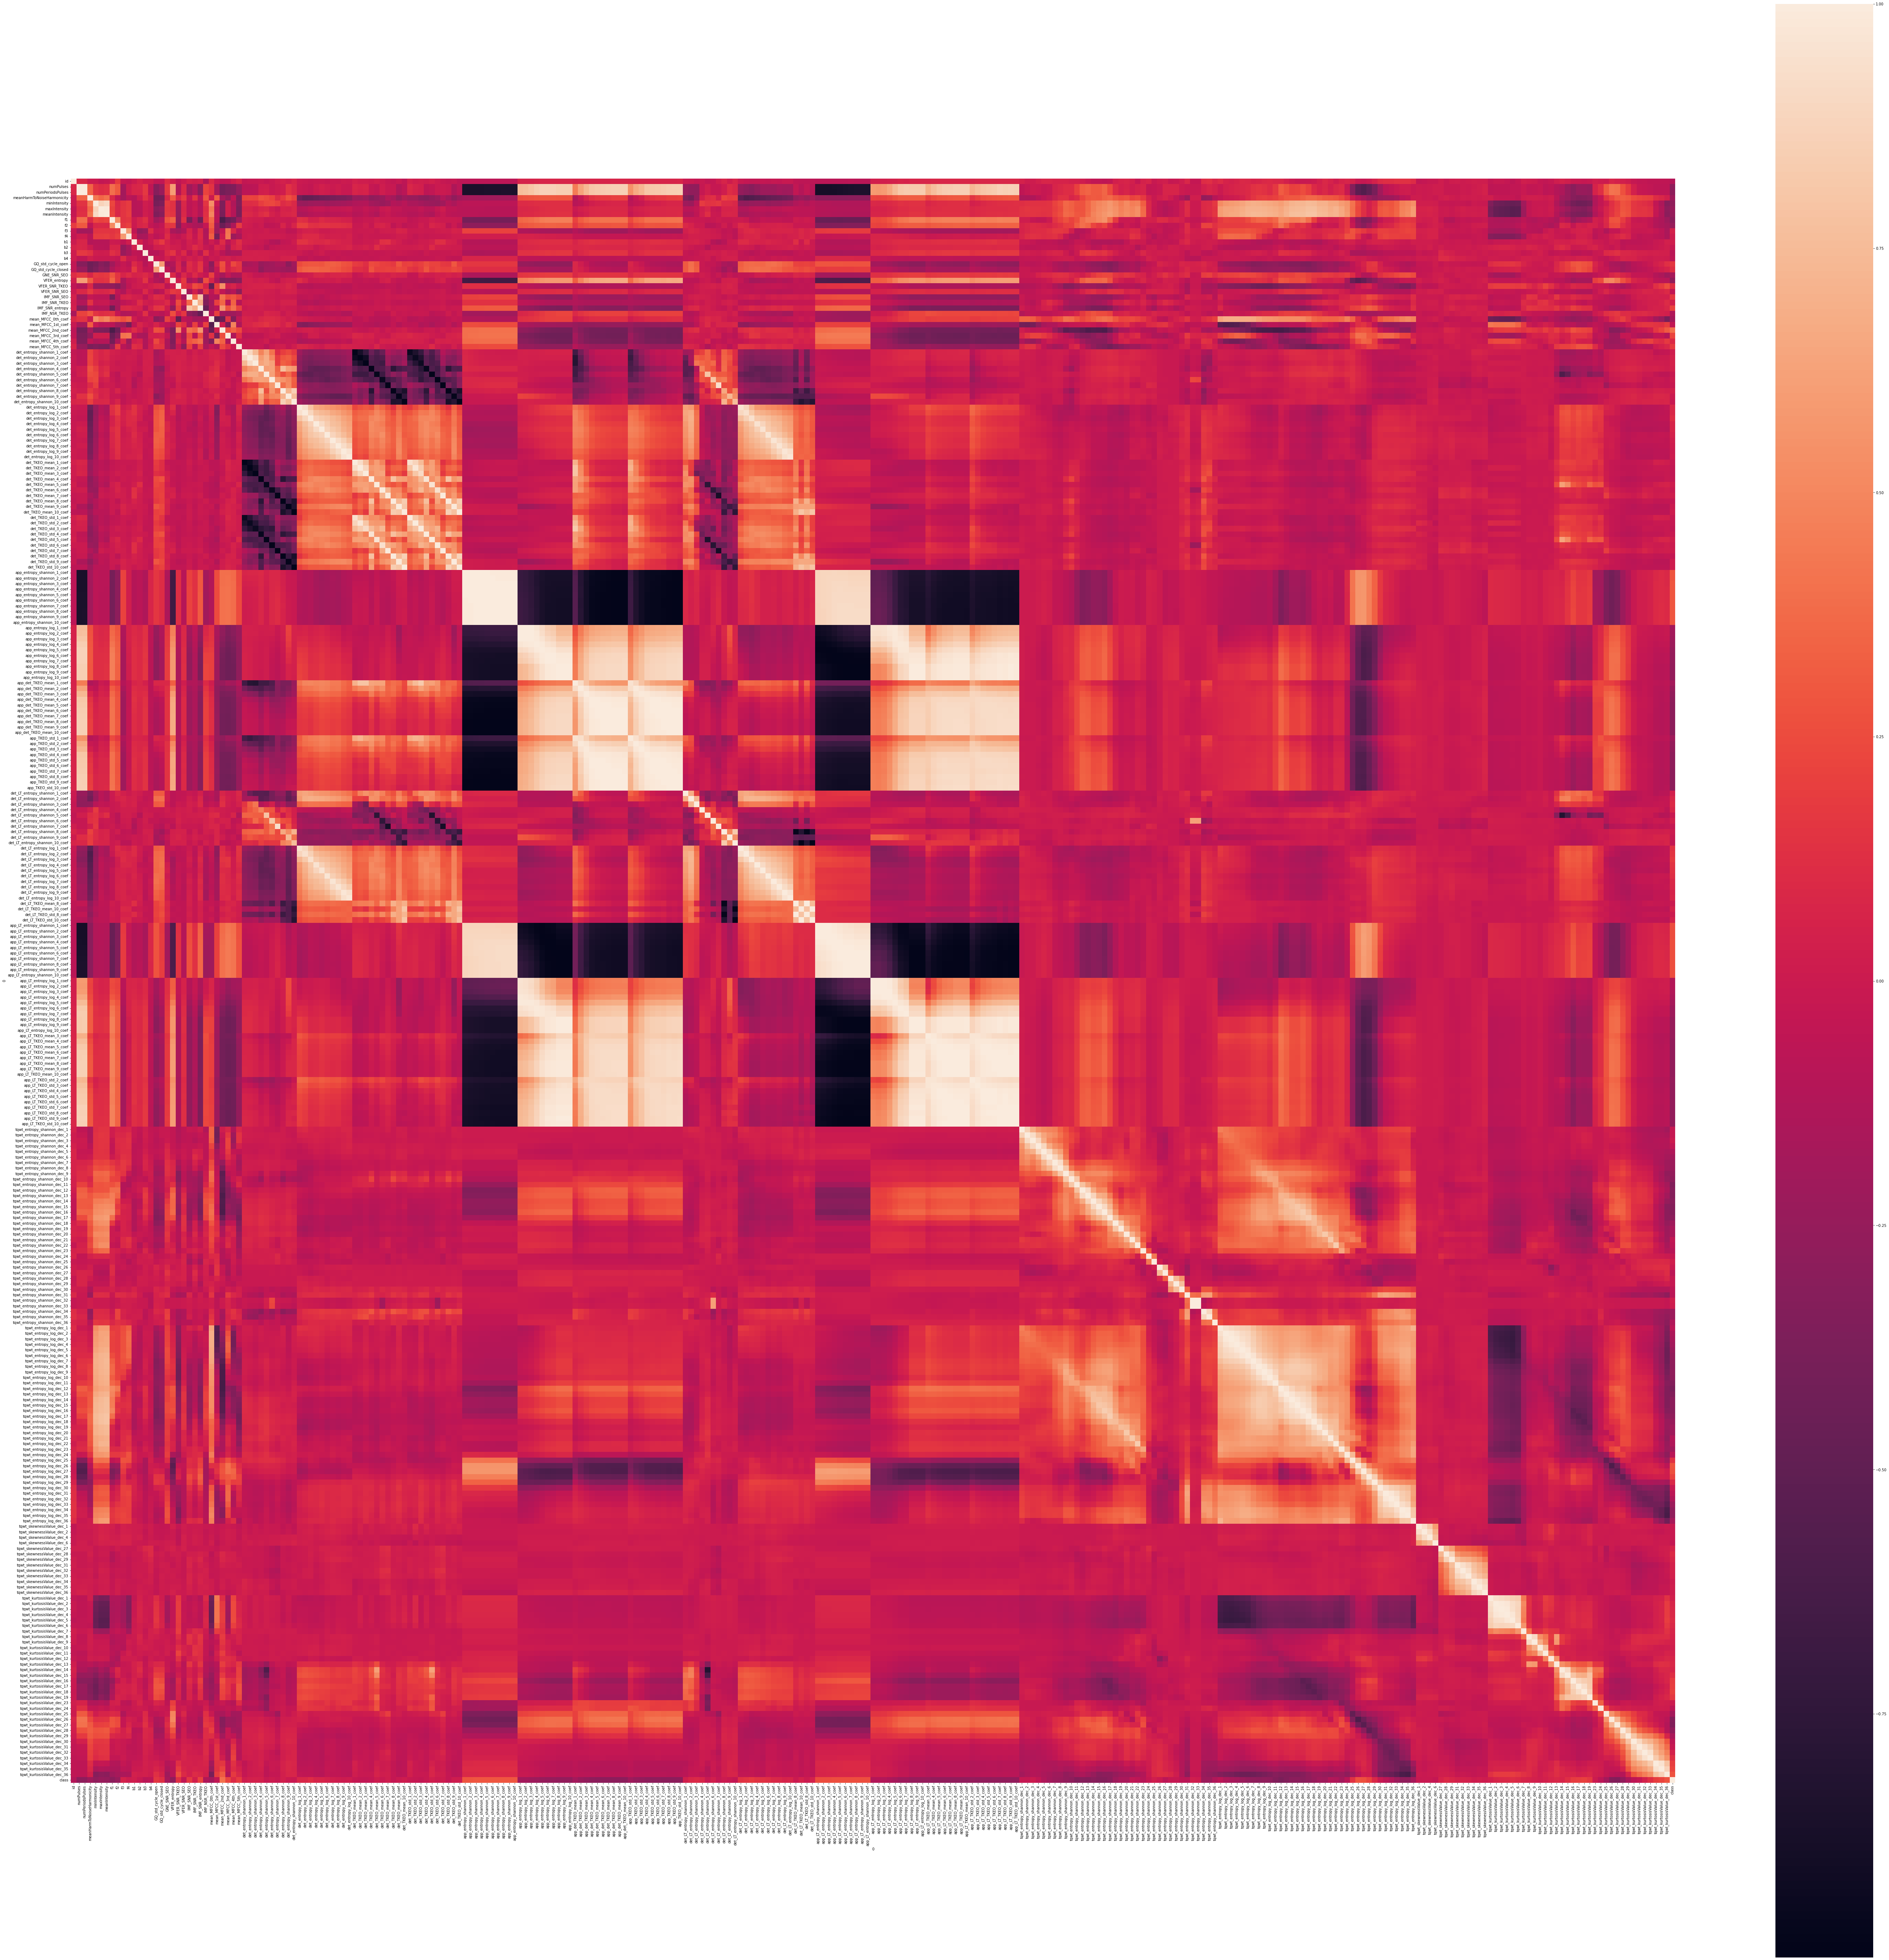

In [ ]:
plt.figure(figsize = (100,100))
sns.heatmap(data = new_corr, square = True)
plt.show()

In [22]:
def correlation(dataset,threshold):
    cor_list = set()
    cor_matrix = dataset.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if cor_matrix.iloc[i,j]>threshold:
                colname = cor_matrix.columns[i]
                cor_list.add(colname)
    
    return cor_list

In [23]:
new_df = df.iloc[:,:-1]

In [24]:
cor_list = correlation(new_df,0.90)
print(cor_list)

{'tqwt_skewnessValue_dec_4', 'tqwt_entropy_log_dec_14', 'tqwt_entropy_log_dec_3', 'tqwt_kurtosisValue_dec_3', 'app_LT_TKEO_std_6_coef', 'app_TKEO_std_9_coef', 'app_entropy_log_3_coef', 'tqwt_entropy_log_dec_9', 'det_TKEO_std_7_coef', 'app_entropy_log_8_coef', 'tqwt_entropy_log_dec_8', 'det_LT_entropy_shannon_7_coef', 'tqwt_entropy_log_dec_5', 'tqwt_entropy_log_dec_33', 'det_TKEO_std_5_coef', 'tqwt_entropy_log_dec_4', 'tqwt_kurtosisValue_dec_5', 'app_entropy_log_2_coef', 'tqwt_skewnessValue_dec_2', 'det_LT_TKEO_std_10_coef', 'app_det_TKEO_mean_8_coef', 'app_LT_entropy_log_1_coef', 'det_LT_entropy_log_8_coef', 'app_LT_entropy_log_5_coef', 'det_TKEO_std_1_coef', 'app_TKEO_std_1_coef', 'tqwt_entropy_log_dec_16', 'app_TKEO_std_10_coef', 'det_TKEO_std_8_coef', 'app_LT_entropy_shannon_4_coef', 'app_LT_entropy_shannon_3_coef', 'app_entropy_log_9_coef', 'app_det_TKEO_mean_7_coef', 'det_LT_entropy_log_6_coef', 'tqwt_entropy_log_dec_15', 'app_LT_entropy_shannon_5_coef', 'app_LT_entropy_log_10_coe

In [25]:
df.drop(cor_list,axis = 1,inplace = True)

In [26]:
df.head()

0  id  numPulses  meanHarmToNoiseHarmonicity  minIntensity  maxIntensity  \
1   0        240                      18.995     69.997496     76.088046   
2   0        234                      21.497     67.415903     73.046374   
3   0        232                      17.651     62.661706     71.633549   
4   1        178                      19.865     76.306989     81.000749   
5   1        236                      19.557     76.645686     80.937258   

0          f1           f2           f3           f4          b1  ...  \
1  539.342735  1031.849040  2447.162183  3655.054806  101.092218  ...   
2  564.363615  1016.367294  2383.565201  3498.681572   58.465428  ...   
3  548.444604  1032.406341  2357.826954  3678.128717  160.387771  ...   
4  819.529588  1201.813897  3154.035654  4122.163933  238.667052  ...   
5  846.796144  1215.346469  3201.513132  4085.456839  402.216738  ...   

0  tqwt_kurtosisValue_dec_24  tqwt_kurtosisValue_dec_25  \
1                     1.8314                     2.0062   
2                     1.5783                     2.0470   
3                     1.6731                     3.2597   
4                     1.9491                     1.9120   
5                     1.8157                     1.7577   

0  tqwt_kurtosisValue_dec_26  tqwt_kurtosisValue_dec_27  \
1                     1.6058                     1.5466   
2                     1.5772                     1.5530   
3                     1.5921                     1.5399   
4                     1.8829                     6.9761   
5                     1.8821                     7.8832   

0  tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
1                     1.5620                     2.6445   
2                     1.5589                     3.6107   
3                     1.5643                     2.3308   
4                     3.7805                     3.5664   
5                     6.1727                     5.8416   

0  tqwt_kurtosisValue_dec_30  tqwt_kurtosisValue_dec_34  \
1                     3.8686                     2.6202   
2                    23.5155                     6.5245   
3                     9.4959                     2.9199   
4                     5.2558                     4.8460   
5                     6.0805                     8.2103   

0  tqwt_kurtosisValue_dec_36  class  
1                    18.9405      1  
2                    45.1780      1  
3                     4.7666      1  
4                     4.0603      1  
5                     6.1164      1  

[5 rows x 141 columns]

In [27]:
df.drop('id',axis = 1,inplace = True)

In [28]:
df.head()

0  numPulses  meanHarmToNoiseHarmonicity  minIntensity  maxIntensity  \
1        240                      18.995     69.997496     76.088046   
2        234                      21.497     67.415903     73.046374   
3        232                      17.651     62.661706     71.633549   
4        178                      19.865     76.306989     81.000749   
5        236                      19.557     76.645686     80.937258   

0          f1           f2           f3           f4          b1          b2  \
1  539.342735  1031.849040  2447.162183  3655.054806  101.092218   83.147440   
2  564.363615  1016.367294  2383.565201  3498.681572   58.465428   86.487292   
3  548.444604  1032.406341  2357.826954  3678.128717  160.387771   54.685168   
4  819.529588  1201.813897  3154.035654  4122.163933  238.667052  191.984916   
5  846.796144  1215.346469  3201.513132  4085.456839  402.216738  210.061394   

0  ...  tqwt_kurtosisValue_dec_24  tqwt_kurtosisValue_dec_25  \
1  ...                     1.8314                     2.0062   
2  ...                     1.5783                     2.0470   
3  ...                     1.6731                     3.2597   
4  ...                     1.9491                     1.9120   
5  ...                     1.8157                     1.7577   

0  tqwt_kurtosisValue_dec_26  tqwt_kurtosisValue_dec_27  \
1                     1.6058                     1.5466   
2                     1.5772                     1.5530   
3                     1.5921                     1.5399   
4                     1.8829                     6.9761   
5                     1.8821                     7.8832   

0  tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
1                     1.5620                     2.6445   
2                     1.5589                     3.6107   
3                     1.5643                     2.3308   
4                     3.7805                     3.5664   
5                     6.1727                     5.8416   

0  tqwt_kurtosisValue_dec_30  tqwt_kurtosisValue_dec_34  \
1                     3.8686                     2.6202   
2                    23.5155                     6.5245   
3                     9.4959                     2.9199   
4                     5.2558                     4.8460   
5                     6.0805                     8.2103   

0  tqwt_kurtosisValue_dec_36  class  
1                    18.9405      1  
2                    45.1780      1  
3                     4.7666      1  
4                     4.0603      1  
5                     6.1164      1  

[5 rows x 140 columns]

# Dropping outliers from the dataset

In [29]:
data = df.values
X, y = data[:, :-1], data[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
X_train.shape

(505, 139)

In [31]:
Y_train.shape

(505,)

In [32]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, Y_train = X_train[mask, :], Y_train[mask]

In [33]:
X_train.shape

(454, 139)

In [34]:
Y_train.shape

(454,)

# Scaling the train test splits

In [35]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler1.fit(X_train)
scaler2.fit(X_test)
X_train = scaler1.transform(X_train)
X_test = scaler2.transform(X_test)

# Let us fit the cleaned data into models now

### Implementing KNN model

In [36]:
def distance(x1, x2):
    dist = np.sqrt(np.sum((x1-x2)**2))
    return dist

In [37]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, x_train, y_train):
        self.x_train = X_train
        self.y_train = y_train

    def predict(self, x_test):
        predictions = [self._predict(x) for x in x_test]
        return predictions

    def _predict(self, x):
        distances = [distance(x, i) for i in self.x_train]
    
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]
    
    def score(self,y,yhat):
        error = np.sum(np.absolute(y-yhat))/len(y)
        acu = 1-error
        return acu

In [38]:
knn = KNN()
knn.fit(X_train,Y_train)

In [39]:
yhat = knn.predict(X_test)
print(yhat)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0,

In [40]:
print(knn.score(Y_test,yhat))

0.848


### Implementing Logistic Regression

In [41]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [208]:
class LogisticRegressor():

    def __init__(self, lr, n_iters = 0):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def loss_func(self,y,yhat,N):
        loss = -((np.dot(y.T,np.log(yhat)) + np.dot((1-y).T, np.log(1-yhat)))/N)
        return loss

    def fit(self, x_train, y_train):
        n_samples, n_features = x_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        if self.n_iters != 0:
            for _ in range(self.n_iters):
                linear_pred = np.dot(x_train, self.weights) + self.bias
                predictions = sigmoid(linear_pred)

                dw = (1/n_samples) * np.dot(x_train.T, (predictions - y_train))
                db = (1/n_samples) * np.sum(predictions-y_train)
                
                self.weights = self.weights - self.lr*dw
                self.bias = self.bias - self.lr*db
                
                print("loss: ", self.loss_func(y_train,predictions,n_samples))
        else:
            while True:
                linear_pred = np.dot(x_train, self.weights) + self.bias
                predictions = sigmoid(linear_pred)

                dw = (1/n_samples) * np.dot(x_train.T, (predictions - y_train))
                db = (1/n_samples) * np.sum(predictions-y_train)
                
                comparison = dw == np.zeros(n_features)
                equal_arrays = comparison.all()
                
                loss = self.loss_func(y_train,predictions,n_samples)
                
                if (equal_arrays and db == 0) or str(loss) == 'nan':
                    print("loss: ", self.loss_func(y_train,predictions,n_samples))
                    break
                    
                else:
                    self.weights = self.weights - self.lr*dw
                    self.bias = self.bias - self.lr*db
                    
                    print("loss: ", self.loss_func(y_train,predictions,n_samples))
                


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred
    
    def score(self,y,yhat):
        error = np.sum(np.absolute(y-yhat))/len(y)
        acu = 1-error
        return acu

In [209]:
lgr = LogisticRegressor(lr = 0.1)
lgr.fit(X_train,Y_train)

Streaming output truncated to the last 5000 lines.
loss:  0.1342438086344689
loss:  0.1342347533811448
loss:  0.1342257008536952
loss:  0.13421665105060798
loss:  0.13420760397037196
loss:  0.1341985596114777
loss:  0.13418951797241557
loss:  0.13418047905167965
loss:  0.13417144284776408
loss:  0.1341624093591633
loss:  0.13415337858437343
loss:  0.13414435052189116
loss:  0.1341353251702168
loss:  0.13412630252785046
loss:  0.13411728259329175
loss:  0.13410826536504344
loss:  0.13409925084161
loss:  0.1340902390214961
loss:  0.13408122990320587
loss:  0.13407222348524933
loss:  0.1340632197661328
loss:  0.13405421874436632
loss:  0.13404522041846065
loss:  0.13403622478692823
loss:  0.1340272318482817
loss:  0.13401824160103487
loss:  0.13400925404370428
loss:  0.13400026917480623
loss:  0.13399128699285914
loss:  0.13398230749638207
loss:  0.1339733306838937
loss:  0.1339643565539179
loss:  0.13395538510497496
loss:  0.13394641633559093
loss:  0.13393745024428896
loss:  0.133928486

<ipython-input-208-c170a354f0c9>:10: RuntimeWarning: divide by zero encountered in log
  loss = -((np.dot(y.T,np.log(yhat)) + np.dot((1-y).T, np.log(1-yhat)))/N)


In [210]:
yhat = lgr.predict(X_test)
print(yhat)

[1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]


In [211]:
print(lgr.score(Y_test,yhat))

0.752


In [212]:
model_lgr = LogisticRegression()
model_lgr.fit(X_train,Y_train)

LogisticRegression()

In [213]:
yhat = model_lgr.predict(X_test)
print(yhat)

[1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


In [214]:
print(model_lgr.score(X_test,Y_test))

0.796


### Implementing SVM using Sklearn

In [43]:
model_svm = svm.SVC()
model_svm.fit(X_train,Y_train)

SVC()

In [44]:
yhat = model_svm.predict(X_test)
print(yhat)

[1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [45]:
model_svm.score(X_test,Y_test)

0.84

In [48]:
X_train[0].shape

(139,)

# Implementing classifier Neural Network using tensorflow

In [201]:
model_nn = tf.keras.Sequential()
model_nn.add(tf.keras.layers.InputLayer(input_shape = (139,)))
model_nn.add(tf.keras.layers.Dense(10, activation = 'relu'))
model_nn.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

In [202]:
model_nn.compile(
    optimizer = 'adam',
    loss = tf.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [136]:
model_nn.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 10)                1400      
                                                                 
 dense_59 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [203]:
hist = model_nn.fit(X_train,Y_train,epochs = 20, batch_size = 32, validation_split = 0.33)

Epoch 1/20
10/10 [==============================] - 1s 22ms/step - loss: 0.7482 - accuracy: 0.6086 - val_loss: 0.6421 - val_accuracy: 0.6467
Epoch 2/20
10/10 [==============================] - 0s 7ms/step - loss: 0.6165 - accuracy: 0.7105 - val_loss: 0.5833 - val_accuracy: 0.7067
Epoch 3/20
10/10 [==============================] - 0s 6ms/step - loss: 0.5582 - accuracy: 0.7237 - val_loss: 0.5463 - val_accuracy: 0.7467
Epoch 4/20
10/10 [==============================] - 0s 6ms/step - loss: 0.5077 - accuracy: 0.7697 - val_loss: 0.5242 - val_accuracy: 0.7800
Epoch 5/20
10/10 [==============================] - 0s 7ms/step - loss: 0.4722 - accuracy: 0.8158 - val_loss: 0.5061 - val_accuracy: 0.7933
Epoch 6/20
10/10 [==============================] - 0s 8ms/step - loss: 0.4420 - accuracy: 0.8355 - val_loss: 0.4937 - val_accuracy: 0.7933
Epoch 7/20
10/10 [==============================] - 0s 6ms/step - loss: 0.4153 - accuracy: 0.8553 - val_loss: 0.4812 - val_accuracy: 0.8067
Epoch 8/20
10/10 [=

In [204]:
yhat = model_nn.predict(X_test)
yhat = [0 if i<0.5 else 1 for i in yhat]
print(yhat)

8/8 [==============================] - 0s 2ms/step
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]


In [129]:
def score(y,yhat):
  error = np.sum(np.absolute(y-yhat))/len(y)
  acurracy = 1-error
  return  acurracy

In [205]:
score(Y_test,yhat)

0.796

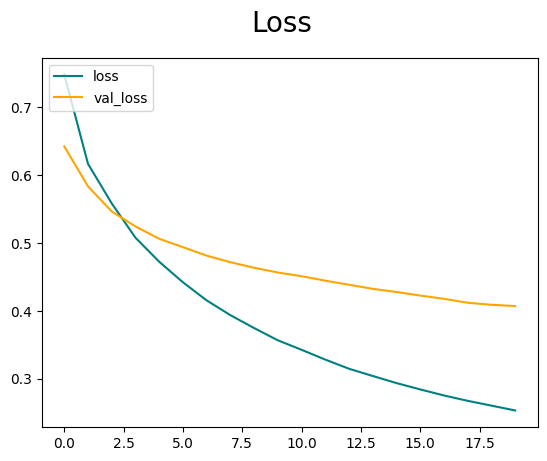

In [206]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

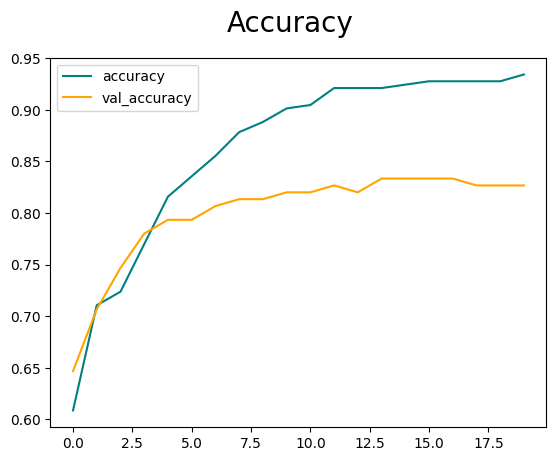

In [207]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# CONCLUSION: We get the best accuracy from KNN and Support Vector Classifier models and hence we conclude that thes models may be used for best results